# Data mining A.A. 21-22
## Autori : Folino Filippo Andrea 201250, Sullazzo Teodoro 235194


# Introduzione

## Analisi del contesto

CS:G0 è uno sparatutto in prima persona. Si tratta di un videogame strategico sviluppato da Valve Corporation e Hidden Path Entertainment, annunciato il primo settembre 2011 e rilasciato il 21 agosto 2012. <br>
Il gioco dispone di diverse modalità, la più importante delle quali è la cosiddetta "competitiva". La partita è alla meglio di 30 round, con possibilità di supplementari nel caso alla fine si giungesse ad un 15:15. I giocatori sono divisi in 2 squadre da 5 componenti l'una, i terroristi T, e gli anti terroristi CT. La principale modalità è la "bomb defusal", i.e. i terroristi hanno l'obiettivo di piazzare la bomba in uno dei due siti all'interno della mappa (entro 2 minuti dall'inizio del round), gli antiterroristi devono disinnescarla prima che questa esploda (il timer della bomba è di 40 secondi). Entrambe le parti, tuttavia, vincono in caso di eliminazione della squadra avversaria, a meno che la bomba non sia già stata piazzata.<br>
Ad ogni turno le squadre vengono ricompensate con una certa somma di denaro, che può poi essere spesa per l'acquisto di armi all'inizio del round. Anche le uccisioni permettono di guadagnare, e ogni arma ha una certa ricompensa che solitamente è inversamente proporzionale alla qualità dell'arma.<br>
In una partita di CS:GO a determinare il vincitore non è la sola capacità del giocatore, ma l'abilità nel gestire l'economia, la coesione del team ecc... Un semplice sparatutto può presentare una tale quantità di variabili da considerare, complessità da dover gestire da poter essere paragonabile ad una partita di scacchi. La scelta di sacrificare un giocatore può non essere fine a sè stessa, ad esempio, ma può rientrare in una strategia più ampia. <br>
La platea a cui CS:GO fa riferimento è sempre più ampia, non solo in termini del numero di persone che ci giocano o che semplicemente guardano le partite, ma anche per ciò che concerne i ricavi. Nel 2020 CS:GO ha segnato il raggiungimento di un miliardo di ricavi, senza contare il mercato che prolifera attorno ad esso, o la miriade di sponsor che si possono ritrovare nelle partite professioniste. <br>
Questa storia non si conclude con le sole pubblicità, sponsor, eventi; all'interno del medesimo gioco vengono offerti servizi di analisi e visualizzazione dei dati delle partite, ed esistono anche siti esterni che offrono strumenti più elaborati, naturalmente, il tutto viene offerto dietro pagamento.





In [ ]:
import os
from IPython.display import Image
Image(url='http://media.steampowered.com/apps/csgo/blog/images/fb_image.png?v=6')

## Obiettivi

Il presente lavoro di progetto si pone perciò in questo contesto. Il nostro obiettivo è quello di riuscire ad utilizzare gli strumenti messi in campo dal "data mining" per poter estrarre delle informazioni utili a partire da dati relativi a delle partite di CS:GO, in particolare, il task principe si configura nella possibilità di predirre l'esito di un round a partire da uno snapshot di quest'ultimo.
Tale sfida rientra quindi nel contesto della classificazione binaria: si parte da un dataset con tuple classificate, lo scopo è quello di riuscire a creare un modello che catturando i pattern delle tuple sia in grado di predire il valore della classe target.

## Stato dell'arte

Come per un qualsiasi sport (che esso sia fisico o digitale, i.e. e-sport) la presenza di partite, soprattutto giocate a livello professionistico conduce allo sviluppo di sistemi di betting e quindi, di predizione del vincitore.


## Risultati obiettivo
L'obiettivo di questo progetto, vista la natura didattica di quest'ultimo, si configura principalmente nell'uso delle tecnologie offerte da Python per i task di data mining; per poter osservare nella pratica quanto visto durante le lezioni teoriche. Sebbene le performance non siano lo scopo principale, sarà comunque parte integrante di questo lavoro la ricerca dei migliori approcci per poter ottenere quante più informazioni dai dati a nostra diposizione. 

<hr>

# Indice

&emsp;1 [Data visualization](#1.) <br>
&emsp;    1.1 [Introduzione al dataset](#1.1) <br>
&emsp;    1.2 [I dati](#1.2) <br> 
&emsp;    &emsp; 1.2.1 [Chiarimenti](#1.2.1) <br>
&emsp;    1.3 [Importazione del dataset](#1.3) <br>
&emsp;    1.4 [Arricchimento](#1.4) <br>
&emsp;    1.5 [Informazioni base](#1.5) <br>
&emsp;    1.6 [Visualizzazione delle distribuzioni](#1.6) <br>
&emsp;    1.7 [L'equipaggiamento](#1.7) <br>
&emsp;    1.8 [Le armi](#1.8) <br>
&emsp;    1.9 [Scatter plot](#1.9) <br>
&emsp;    1.10 [Le mappe](#1.10) <br>
&emsp;    1.11 [Correlazioni tra gli attributi](#1.11) <br>
&emsp;    1.12 [Rumore e outliers](#1.12) <br>
&emsp;    1.13 [Ancora sulla correlazione](#1.13) <br>
&emsp;    1.14 [Features importance](#1.14) <br>
&emsp;    1.15 [Sintesi](#1.15)  <br>
&emsp;<br>
&emsp;2 [Pre-processing](#2.) <br>
&emsp;    2.1 [Null values](#2.1) <br>
&emsp;    2.2 [Attributi categorici](#2.2) <br>
&emsp;    2.3 [Outliers](#2.3) <br>
&emsp;    2.4 [Attributi correlati](#2.4) <br>
&emsp;    2.5 [Attributi non importanti](#2.5) <br>
&emsp;    2.6 [Sintesi](#2.6)<br>
&emsp;
&emsp;<br>
&emsp;3 [Modelli di classificazione](#3.) <br>
&emsp;    3.1 [Random forest](#3.1) <br>
&emsp;    3.2 [K-neighbors](#3.2) <br>
&emsp;    3.3 [SGD](#3.3) <br>
&emsp;    3.4 [Naive bayes](#3.4) <br>
&emsp;    3.5 [Decision tree](#3.5) <br>
&emsp;    3.6 [Ensemble](#3.6) <br>
&emsp;    &emsp;3.6.1 [Parametri generali](#3.6.1) <br>
&emsp;    &emsp;3.6.2 [Parametri del booster](#3.6.2) <br>
&emsp;    &emsp;3.6.3 [Parametri del learning](#3.6.3) <br>
&emsp;    &emsp;3.6.4 [Tuning](#3.6.4)<br>
&emsp;<br>
&emsp;4 [Prestazioni dei classificatori](#4.)<br>
&emsp;<br>
&emsp;5 [Rete neurale](#5.) <br>
&emsp;    5.1 [Introduzione](#5.1) <br>
&emsp;    5.2 [Primo tentativo](#5.2) <br>
&emsp;    5.3 [Tuning della ANN](#5.3) <br>
&emsp;
&emsp;<br>
&emsp;6 [Conclusioni](#6.)<br>
<hr>

# 1. Data visualization <a name="1."></a>

## 1.1 Introduzione al dataset <a name="1.1"></a>
Il dataset utilizzato proviene dal seguente link kaggle: <br>

https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification

<br>
Consiste di snapshot prelevati da round svolti in tornei professionisti, svoltisi tra il 2019 e 2020. I dati non fanno riferimento alle fasi di riscaldamento e riavvio, queste tuple sono state filtrate. Gli snapshot sono stati prelevati dalle partite ad intervalli regolari. Come espresso dalla fonte, le tuple sono state preprocessate per permettere una migliore leggibilità.
Eventuali informazioni personali, come ad esempio, nome, cognome ecc... dei giocatori non sono state inserite.

## 1.2 I dati <a name="1.2"></a>
Come già detto i dati sono relativi a degli snapshot dei round di alcune partite, per tale motivo è possibile trovare i seguenti campi 

- time_left : il tempo rimanente nel round

- ct_score : il punteggio corrente per gli anti-terroristi

- t_score : il punteggio corrente per i terroristi

- map : la mappa nella quale il ruond è giocato

- bomb_planted : un booleano che indica se la bomba è stata già piazzata o meno

- ct_healt : il valore totale della vita per la squadra degli anti-terroristi

- t_health :  il valore totale della vita per la squadra dei terroristi

- ct_armor : il valore totale dell'armatura per gli anti-terroristi

- ct_armor : il valore totale dell'armatura per i terroristi

-  ct_money : la somma totale di denaro per gli anti-terroristi

-  ct_money : la somma totale di denaro per i terroristi

- ct_helmets : il numero totale di elmetti per i CT

- t_helmets : il numero totale di elmetti per i T

- ct_defuse_kits : il numero totale di kit per il disinnesco per i CT

- ct_players_alive : il numero totale di giocatori CT ancora vivi

- t_players_alive : il numero totale di giocatori T ancora vivi

Dopodiché, sono elencati una serie di attributi, uno per ogni arma (replicato per i terroristi e per gli anti-terroristi) in cui viene riportato il numero di giocatori della squadra che hanno al momento quell'arma

Come ultima feature è riportato l'attributo target, i.e. round_winner (0 per CT, 1 per T).

### 1.2.1 Chiarimenti <a name="1.2.1"></a>

Per una migliore comprensione del dataset è d'obbligo ricordare che: 
- il kit di disinnesco permette di ridurre il tempo per disattivare la bomba, si passa da 10 a 5 secondi.
- l'elemetto, insieme all'armatura consente al giocatore di resistere di più ai colpi, in particolare, l'elmetto riduce sensibilmente eventuali colpi alla testa.

## 1.3 Importazione del dataset <a name="1.3"></a>

In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
import warnings
import re
from pandas.plotting import scatter_matrix
from pandas.api.types import is_numeric_dtype


import numpy as np
import pandas as ps

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)
target_feature='round_winner'
warnings.filterwarnings('ignore')
Encoder_df = LabelEncoder() 

ps.set_option('display.max_rows', None) 

Come prima cosa si provvede ad importare le librerie che serviranno durante lo svolgimento del progetto.
Vengono inoltre definite alcune funzioni, come ad esempio quella per la rimozione degli attributi la cui correlazione è troppo elevata (remove_collinear_features) e per effettuare alcune visualizzazioni.

In [2]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [3]:
def plot_distributions(features):
    for i in features:
        if ds[i].value_counts().shape[0]>20:
    
            plt.figure(figsize=(12,8))
            sns.distplot(ds[i][ds[target_feature]=='CT'],hist=True,color='g', label='CT',hist_kws={'edgecolor':'black'})
            _=sns.distplot(ds[i][ds[target_feature]=='T'],hist=True,color='r',label='T',hist_kws={'edgecolor':'black'})
            plt.legend()
            plt.show()              
        else:
            plt.figure(figsize=(14, 6))
            sns.countplot(x=i, hue=target_feature, data=ds, palette='coolwarm')
            plt.legend(loc='upper right')
            plt.yscale('log')
            plt.xticks(rotation=45)
            plt.show()

def plot_based_on(x,y,data,title):
    plt.figure(figsize=(15,7))
    p = sns.barplot(x = x, y = y, data = data)
    p = plt.xticks(rotation=90)
    plt.title(title, size=20)

Si procede poi con l'importazione del dataset

In [4]:
file_name = "csgo_round_snapshots.csv"
ds = ps.read_csv(file_name)

ds.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0       0.0      0.0    4000.0  ...                  0.0   
1     400.0    300.0     600.0  ...                  0.0   
2     294.0    200.0     750.0  ...                  0.0   
3     294.0    200.0     750.0  ...                  0.0   
4     192.0      0.0   18350.0  ...                  0.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                      0.0                     0.0   
1                      0.0                     2.0   
2                      0.0                     2.0   
3                      0.0                     0.0   
4                      0.0                     0.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
0                      0.0                     0.0            CT  
1                      0.0                     0.0            CT  
2                      0.0                     0.0            CT  
3                      0.0                     0.0            CT  
4                      0.0                     0.0            CT  

[5 rows x 97 columns]

## 1.4 Arricchimento <a name="1.4"></a>

Per poter effettuare una visualizzazione completa dei dati sono stati introdotti alcune variabii che permettono di estrarre le armi, e suddividerle per categoria. In CS:GO è infatti possibile individuare le seguente classi:

1. Fucili
2. SMG: submachine guns, ovvero, fucili più leggeri
3. Fucili di precisione
4. Fucili pesanti
5. Fucili a pompa
6. Pistole

Inoltre, per ogni arma è stato associato un costo, che corrisponde ai fondi necessari per acquistarla all'interno del gioco (quest'ultima informazione è stata importata dall'esterno).

In [5]:

weapons=['t_weapon_galilar','t_weapon_famas','t_weapon_ak47','t_weapon_m4a4','t_weapon_m4a1s','t_weapon_sg553',
    't_weapon_aug','t_weapon_g3sg1','t_weapon_scar20','t_weapon_ssg08','t_weapon_awp',
    
    't_weapon_glock','t_weapon_usps','t_weapon_p2000','t_weapon_p250','t_weapon_cz75auto','t_weapon_fiveseven',
    't_weapon_tec9','t_weapon_elite','t_weapon_deagle','t_weapon_r8revolver',

    't_weapon_mac10','t_weapon_mp9','t_weapon_bizon','t_weapon_mp7','t_weapon_ump45','t_weapon_p90','t_weapon_mp5sd',
    
    't_weapon_sawedoff','t_weapon_mag7','t_weapon_nova','t_weapon_xm1014','t_weapon_m249','t_weapon_negev',

    't_grenade_decoygrenade','t_grenade_flashbang','t_grenade_smokegrenade','t_grenade_hegrenade','t_grenade_molotovgrenade',
    't_grenade_incendiarygrenade',


    'ct_weapon_galilar','ct_weapon_famas','ct_weapon_ak47','ct_weapon_m4a4','ct_weapon_m4a1s','ct_weapon_sg553',
    'ct_weapon_aug','ct_weapon_g3sg1','ct_weapon_scar20','ct_weapon_ssg08','ct_weapon_awp',
    
    'ct_weapon_glock','ct_weapon_usps','ct_weapon_p2000','ct_weapon_p250','ct_weapon_cz75auto','ct_weapon_fiveseven',
    'ct_weapon_tec9','ct_weapon_elite','ct_weapon_deagle','ct_weapon_r8revolver',

    'ct_weapon_mac10','ct_weapon_mp9','ct_weapon_bizon','ct_weapon_mp7','ct_weapon_ump45','ct_weapon_p90','ct_weapon_mp5sd',
    
    'ct_weapon_sawedoff','ct_weapon_mag7','ct_weapon_nova','ct_weapon_xm1014','ct_weapon_m249','ct_weapon_negev',

    'ct_grenade_decoygrenade','ct_grenade_flashbang','ct_grenade_smokegrenade','ct_grenade_hegrenade','ct_grenade_molotovgrenade',
    'ct_grenade_incendiarygrenade',

    'ct_defuse_kits']


weapon_cost_t=ps.Series(
    [
    
    2000,2050,2700,3100,2900,3000,3300,5000,5000,1700,4750,
    
    200,200,200,300,500,500,500,400,700,600,
    
    1050,1250,1400,1500,1200,2350,1500,
    
    1100,1300,1050,2000,5200,1700,
    
    50,200,300,300,400,600,
    

    
    ]

    ,index=[
    
    't_weapon_galilar','t_weapon_famas','t_weapon_ak47','t_weapon_m4a4','t_weapon_m4a1s','t_weapon_sg553',
    't_weapon_aug','t_weapon_g3sg1','t_weapon_scar20','t_weapon_ssg08','t_weapon_awp',
    
    't_weapon_glock','t_weapon_usps','t_weapon_p2000','t_weapon_p250','t_weapon_cz75auto','t_weapon_fiveseven',
    't_weapon_tec9','t_weapon_elite','t_weapon_deagle','t_weapon_r8revolver',

    't_weapon_mac10','t_weapon_mp9','t_weapon_bizon','t_weapon_mp7','t_weapon_ump45','t_weapon_p90','t_weapon_mp5sd',
    
    't_weapon_sawedoff','t_weapon_mag7','t_weapon_nova','t_weapon_xm1014','t_weapon_m249','t_weapon_negev',

    't_grenade_decoygrenade','t_grenade_flashbang','t_grenade_smokegrenade','t_grenade_hegrenade','t_grenade_molotovgrenade',
    't_grenade_incendiarygrenade',


    ]
)


weapon_cost_ct=ps.Series(
    [
   
    
    2000,2050,2700,3100,2900,3000,3300,5000,5000,1700,4750,
    
    200,200,200,300,500,500,500,400,700,600,
    
    1050,1250,1400,1500,1200,2350,1500,
    
    1100,1300,1050,2000,5200,1700,
    
    50,200,300,300,400,600,

    400
    
    ]

    ,index=[
    
    'ct_weapon_galilar','ct_weapon_famas','ct_weapon_ak47','ct_weapon_m4a4','ct_weapon_m4a1s','ct_weapon_sg553',
    'ct_weapon_aug','ct_weapon_g3sg1','ct_weapon_scar20','ct_weapon_ssg08','ct_weapon_awp',
    
    'ct_weapon_glock','ct_weapon_usps','ct_weapon_p2000','ct_weapon_p250','ct_weapon_cz75auto','ct_weapon_fiveseven',
    'ct_weapon_tec9','ct_weapon_elite','ct_weapon_deagle','ct_weapon_r8revolver',

    'ct_weapon_mac10','ct_weapon_mp9','ct_weapon_bizon','ct_weapon_mp7','ct_weapon_ump45','ct_weapon_p90','ct_weapon_mp5sd',
    
    'ct_weapon_sawedoff','ct_weapon_mag7','ct_weapon_nova','ct_weapon_xm1014','ct_weapon_m249','ct_weapon_negev',

    'ct_grenade_decoygrenade','ct_grenade_flashbang','ct_grenade_smokegrenade','ct_grenade_hegrenade','ct_grenade_molotovgrenade',
    'ct_grenade_incendiarygrenade',

    'ct_defuse_kits'
    ]
)


ct_weapon=[]
ct_utilities=[]
t_utilities=[]
t_weapon=[]
rexex='^t'
for w in weapons:
       if(w=='ct_weapon_usps' or w=='ct_weapon_p2000' or w=='t_weapon_glock' or w =='ct_defuse_kits'):
              continue
       if re.search(rexex,w):
              if w.__contains__('grenade'):
                     t_utilities.append(w)
              else:
                     t_weapon.append(w)
       else:
              if w.__contains__('grenade'):
                     ct_utilities.append(w)
              else:
                     ct_weapon.append(w)


machine_guns_shotguns=[ 'ct_weapon_mag7', 't_weapon_mag7','ct_weapon_nova', 't_weapon_nova','ct_weapon_sawedoff', 't_weapon_sawedoff'
       ,'ct_weapon_xm1014','t_weapon_xm1014','ct_weapon_m249', 't_weapon_m249','ct_weapon_negev', 't_weapon_negev']

pistols=['ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite','ct_weapon_glock','ct_weapon_r8revolver','t_weapon_r8revolver',
       'ct_weapon_deagle', 't_weapon_deagle','ct_weapon_fiveseven', 't_weapon_fiveseven',
       't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250',
       't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9']

smg=['ct_weapon_bizon', 't_weapon_bizon','ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mp5sd', 't_weapon_mp5sd','ct_weapon_mp7', 't_weapon_mp7', 
       'ct_weapon_mp9', 't_weapon_mp9','ct_weapon_p90', 't_weapon_p90',
       'ct_weapon_ump45', 't_weapon_ump45']

sniper_rifles=['ct_weapon_awp', 't_weapon_awp','ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_scar20', 't_weapon_scar20',
              'ct_weapon_ssg08', 't_weapon_ssg08']

rifles=['ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_famas', 't_weapon_famas','ct_weapon_galilar',
       't_weapon_galilar','ct_weapon_m4a1s', 't_weapon_m4a1s','ct_weapon_m4a4', 't_weapon_m4a4',
       'ct_weapon_sg553','t_weapon_sg553'
       ]
machine_guns_shotguns_ct=['ct_weapon_mag7','ct_weapon_nova', 'ct_weapon_sawedoff',
       'ct_weapon_xm1014','ct_weapon_m249', 'ct_weapon_negev', ]
machine_guns_shotguns_t=['t_weapon_mag7','t_weapon_nova', 't_weapon_sawedoff',
       't_weapon_xm1014','t_weapon_m249', 't_weapon_negev', ]

pistols_ct=['ct_weapon_cz75auto',  'ct_weapon_elite',
      'ct_weapon_glock','ct_weapon_r8revolver',
       'ct_weapon_deagle','ct_weapon_fiveseven','ct_weapon_p250', 'ct_weapon_tec9' ]
       
pistols_t=['t_weapon_cz75auto',  't_weapon_elite','t_weapon_r8revolver','t_weapon_p2000',
       't_weapon_deagle','t_weapon_fiveseven','t_weapon_p250', 't_weapon_tec9','t_weapon_usps']

smg_ct=['ct_weapon_bizon', 'ct_weapon_mac10', 
       'ct_weapon_mp5sd', 'ct_weapon_mp7', 
       'ct_weapon_mp9', 'ct_weapon_p90', 
       'ct_weapon_ump45', ]
smg_t=['t_weapon_bizon', 't_weapon_mac10', 
       't_weapon_mp5sd', 't_weapon_mp7', 
       't_weapon_mp9', 't_weapon_p90', 
       't_weapon_ump45', ]

sniper_rifles_ct=['ct_weapon_awp','ct_weapon_g3sg1',  'ct_weapon_scar20', 
              'ct_weapon_ssg08']
sniper_rifles_t=['t_weapon_awp','t_weapon_g3sg1',  't_weapon_scar20', 
              't_weapon_ssg08']

rifles_ct=['ct_weapon_ak47',  'ct_weapon_aug', 
       'ct_weapon_famas', 'ct_weapon_galilar',
       'ct_weapon_m4a1s', 'ct_weapon_m4a4', 
       'ct_weapon_sg553'
       ]
rifles_t=['t_weapon_ak47',  't_weapon_aug', 
       't_weapon_famas', 't_weapon_galilar',
       't_weapon_m4a1s', 't_weapon_m4a4', 
       't_weapon_sg553'
       ]
primary_ct=[*rifles_ct,*sniper_rifles_ct,*smg_ct,*machine_guns_shotguns_ct]
secondary_ct=[*pistols_ct,'ct_weapon_usps','ct_weapon_p2000']

primary_t=[*rifles_t,*sniper_rifles_t,*smg_t,*machine_guns_shotguns_t]
secondary_t=[*pistols_t,'t_weapon_glock']


weapon_classes=[rifles,sniper_rifles,smg,machine_guns_shotguns,pistols]
weapon_classes_ct=[rifles_ct,sniper_rifles_ct,smg,machine_guns_shotguns_ct,pistols_ct]
weapon_classes_t=[rifles_t,sniper_rifles_t,smg,machine_guns_shotguns_t,pistols_t]

Si è deciso di effettuare dell'arricchimento dei dati già a nostra disposizione. Avendo accesso al prezzo si è calcolato, per ogni round, il costo totale dell'equipaggiamento per le due squadre. L'assunzione che qui facciamo è che la squadra meglio equipaggiata avrà più probabilità di vincere il round.

In [6]:
def equipment_cost_t(row : ps.Series):
    return row[weapons].multiply(weapon_cost_t,fill_value=0).values.sum()
def equipment_cost_ct(row:ps.Series):
    return row[weapons].multiply(weapon_cost_ct,fill_value=0).values.sum()

E' possibile quindi andare a introdurre delle nuove feature come il costo dell'equipaggiamento delle due squadre e la differenza di tali valori nonché il valore medio dell'equipaggiamento per membro del team.
Si è deciso in più di arricchire il dataset con la differenza tra lo score dei CT e dei T.

<a name="qui"></a>

In [7]:
ds['ct_equipment_cost']=ds.apply(lambda row : equipment_cost_ct(row),axis=1)
ds['t_equipment_cost']=ds.apply(lambda row : equipment_cost_t(row),axis=1)
ds['equipment_difference']=ds['ct_equipment_cost']-ds['t_equipment_cost']
ds['ct_equipment_per_player']=ds['ct_equipment_cost']/ds['ct_players_alive']
ds['t_equipment_per_player']=ds['t_equipment_cost']/ds['t_players_alive']
ds['ct_equipment_per_player'].fillna(0,inplace=True)
ds['t_equipment_per_player'].fillna(0,inplace=True)
ds['score_difference']=ds['ct_score']-ds['t_score']
ds['money_difference']=ds['ct_money']-ds['t_money']

## 1.5 Informazioni base <a name="1.5"></a>

Il dataset aggiornato è quindi il seguente

In [ ]:
ds.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  ct_grenade_decoygrenade  \
0       0.0      0.0    4000.0  ...                      0.0   
1     400.0    300.0     600.0  ...                      0.0   
2     294.0    200.0     750.0  ...                      0.0   
3     294.0    200.0     750.0  ...                      0.0   
4     192.0      0.0   18350.0  ...                      0.0   

   t_grenade_decoygrenade  round_winner  ct_equipment_cost  t_equipment_cost  \
0                     0.0            CT             1000.0            1000.0   
1                     0.0            CT             1400.0            1600.0   
2                     0.0            CT             1200.0            1400.0   
3                     0.0            CT             1200.0             800.0   
4                     0.0            CT             1400.0            1000.0   

   equipment_difference  ct_equipment_per_player  t_equipment_per_player  \
0                   0.0                    200.0                   200.0   
1                -200.0                    280.0                   320.0   
2                -200.0                    300.0                   350.0   
3                 400.0                    300.0                   200.0   
4                 400.0                    280.0                   200.0   

   score_difference  money_difference  
0               0.0               0.0  
1               0.0             -50.0  
2               0.0             250.0  
3               0.0             250.0  
4               1.0            7600.0  

[5 rows x 104 columns]

Il dataset presenta 122410 tuple e 104 attributi.

In [ ]:
ds.shape

(122410, 104)

In particolar modo la maggior parte delle features sono di tipo numerico, float64, vi sono 2 object (le stringhe che indicano la mappa e il vincitore del round)

In [ ]:
ds.dtypes

time_left                       float64
ct_score                        float64
t_score                         float64
map                              object
bomb_planted                       bool
ct_health                       float64
t_health                        float64
ct_armor                        float64
t_armor                         float64
ct_money                        float64
t_money                         float64
ct_helmets                      float64
t_helmets                       float64
ct_defuse_kits                  float64
ct_players_alive                float64
t_players_alive                 float64
ct_weapon_ak47                  float64
t_weapon_ak47                   float64
ct_weapon_aug                   float64
t_weapon_aug                    float64
ct_weapon_awp                   float64
t_weapon_awp                    float64
ct_weapon_bizon                 float64
t_weapon_bizon                  float64
ct_weapon_cz75auto              float64


### 1.6 Visualizzazione delle distribuzioni <a name="1.6"></a>
Possiamo quindi procedere alla visualizzazione delle distribuzioni di alcuni attributi, in relazione al valore della target feature. 
Gli attributi in questione riguardano:
- Se la bomba è stata piazzata
- Il numero di granate esplosive dei T
- La mappa
- Lo score dei CT
- Il tempo rimanente
- La quantità di denaro a disposizione dei CT e dei T
- L'armatura totale dei T e CT
- Il costo totale dell'equipaggiamento T e CT
- La differenza di equipaggiamento tra le due squadre
- La differenza nel punteggio

Vi sono varie ipotesi che dobbiamo andare a confermare durante la nostra ricerca, in particolar modo, crediamo esista un qualche legame tra il fatto che la bomba sia stata piazzata e la percentuale di vittoria tra le due squadre, nel caso in cui i T riescono a prendere il controllo del sito della bomba, riusciranno con maggiore probabilità a vincere il round.<br>
Il numero di granate esplosive potrebbe anche essere un indice di come i T stiano gestendo la loro economia, i.e., un elevato numero di granate implicherebbe una maggiore disponibilità di denaro, e perciò, una maggiore probabilità di vittoria.<br>
Per quanto concerne le mappe, invece, è possibile che esse non siano totalmente bilanciate, ovvero, esistono mappe che favoriscono l'una o l'altra squadra; vorremmo quindi indagare questo aspetto più nel dettaglio per verificare se tali ipotesi sono confermate.<br>
A favorire l'una o l'altra parte potrebbe anche essere il punteggio attuale, se infatti lo score di una squadra è molto più alto dell'altra, allora, tale tendenza potrebbe riconfermarsi nel round attuale.<br>
Simile discorso è replicabile per ciò che riguarda la qualità dell'equipaggiamento.<br>
Un ulteriore aspetto da analizzare è invece l'impatto che l'armatura può avere sullo svolgimento di una partita, è evidente che ciò possa aiutare, ma in che misura?

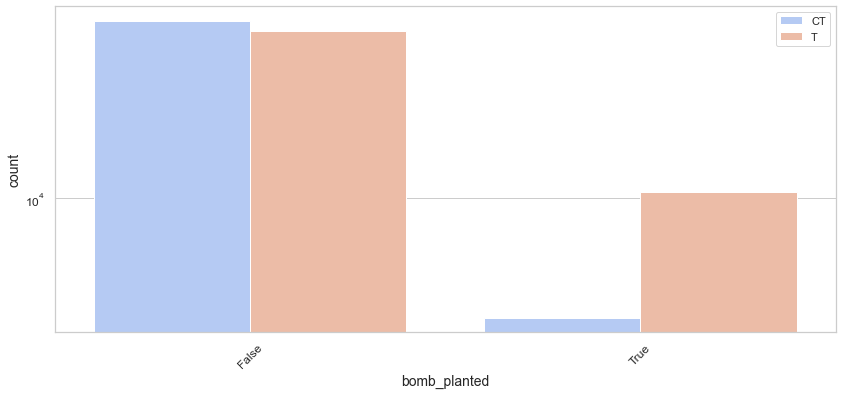

In [ ]:
important=['bomb_planted']
plot_distributions(important)

- la nostra ipotesi sul piazzamento della bomba era corretto, se quest'ultima è stata attivata, la probabilità di vittoria dei CT diminuisce drasticamente; se invece non è stata ancora piazzata la situazione rimane bilanciata, con una leggera tendenza verso i CT

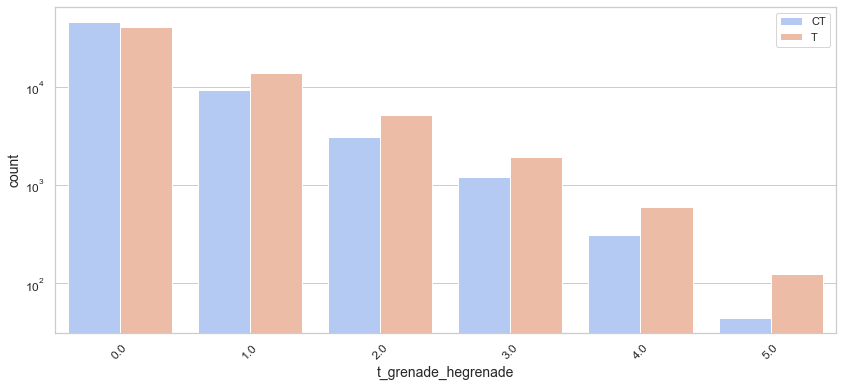

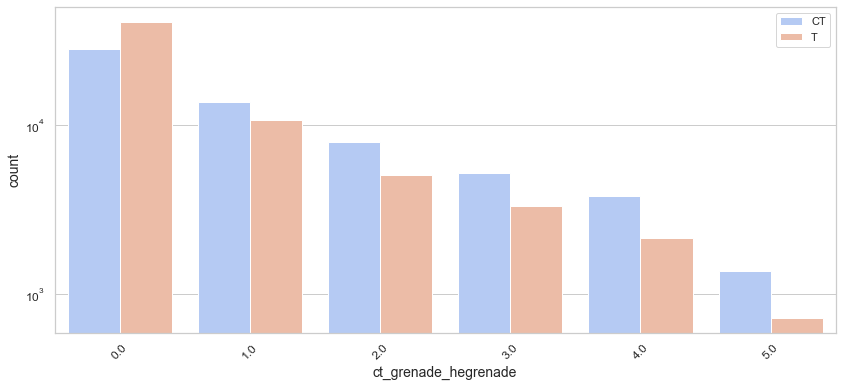

In [ ]:
plot_distributions(['t_grenade_hegrenade','ct_grenade_hegrenade'])

- vi sono meno tuple con un elevato numero di granate per i T, tuttavia, all'aumentare, la loro probabilità di vincere aumenta, ciò si collega anche all'impatto del costo dell'equipaggiamento, che, dai grafici pare influire positivamente sulle chance di vittoria delle squadre, come da noi supposto

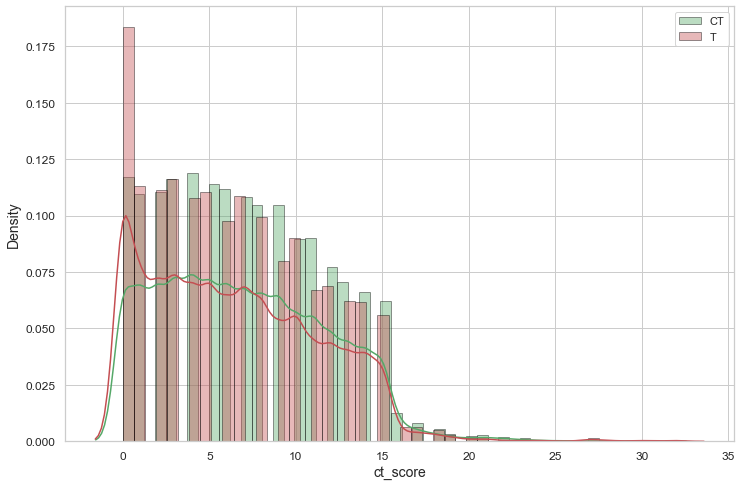

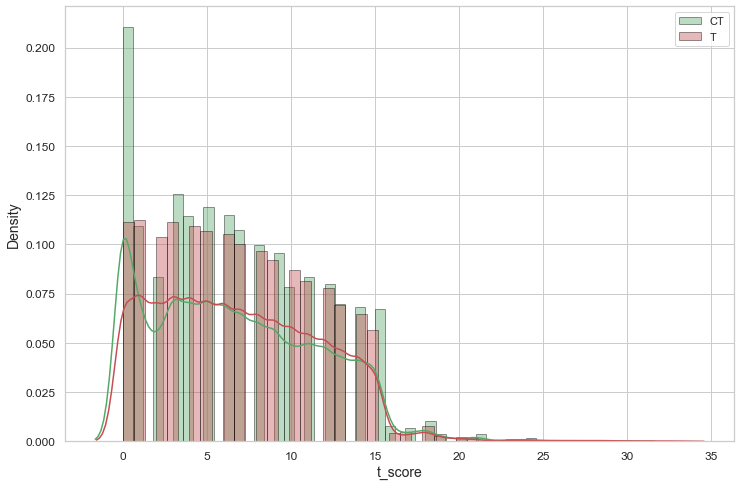

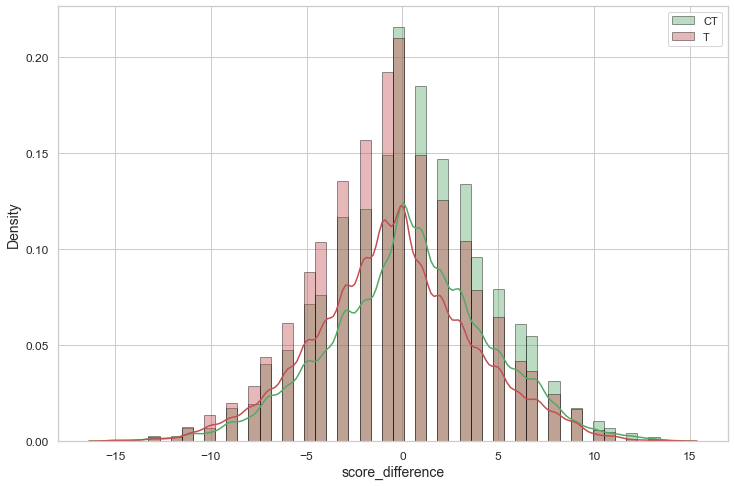

In [ ]:
plot_distributions(['ct_score','t_score','score_difference'])

- meno determinante, ma comunque evidente è l'importanza dello score attuale delle squadre, la tendenza delle partite precedenti solitamente si ripete nelle successive

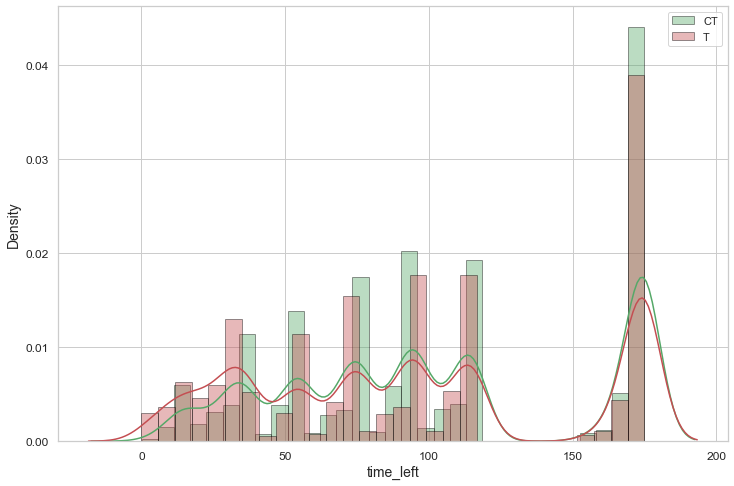

In [ ]:
plot_distributions(['time_left'])

- meno tempo rimane più le probabilità di vincita dei terroristi aumentano, mentre in generale, quando rimane molto tempo i CT tendono a vincere di più

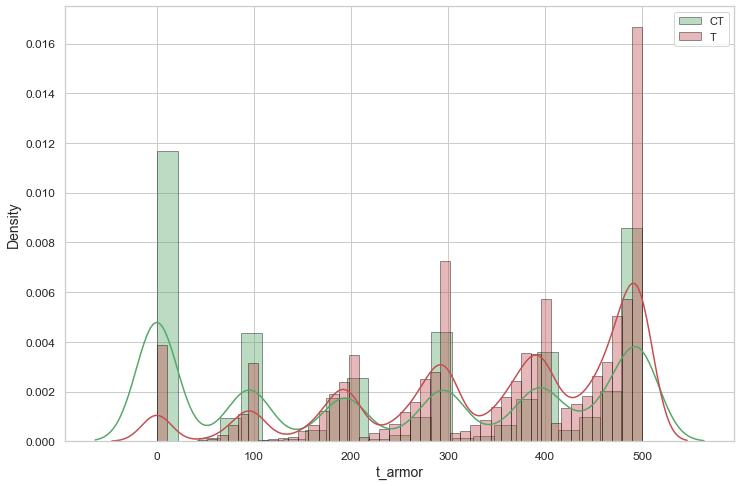

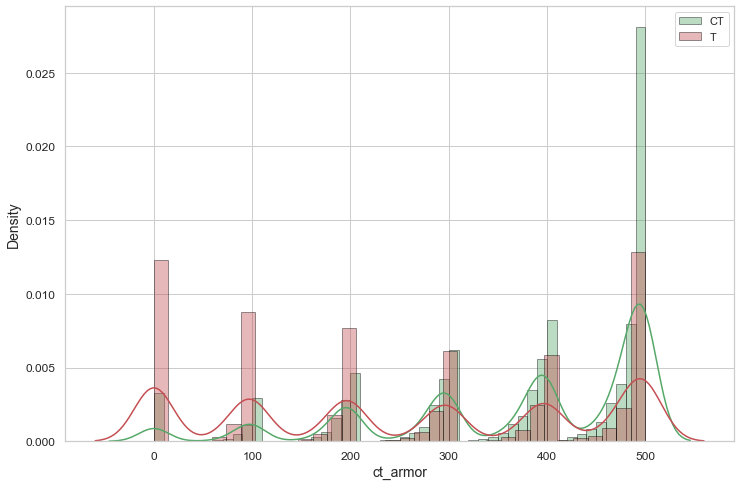

In [ ]:
plot_distributions(['t_armor','ct_armor'])

- sorprendentemente importante risulta invece l'armatura, che porta a probabilità di vittoria più nette, soprattutto per valori elevati

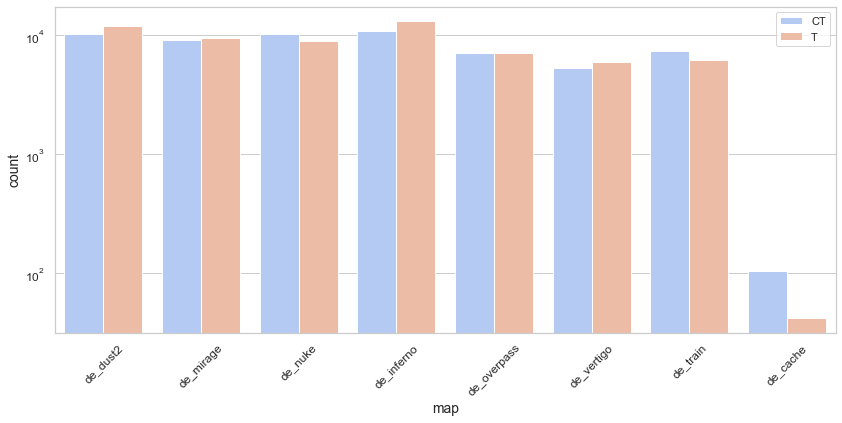

In [ ]:
plot_distributions(['map'])

- come supposto nella sezione precedente, alcune mappe risultano sbilanciate verso l'una o l'altra squadra

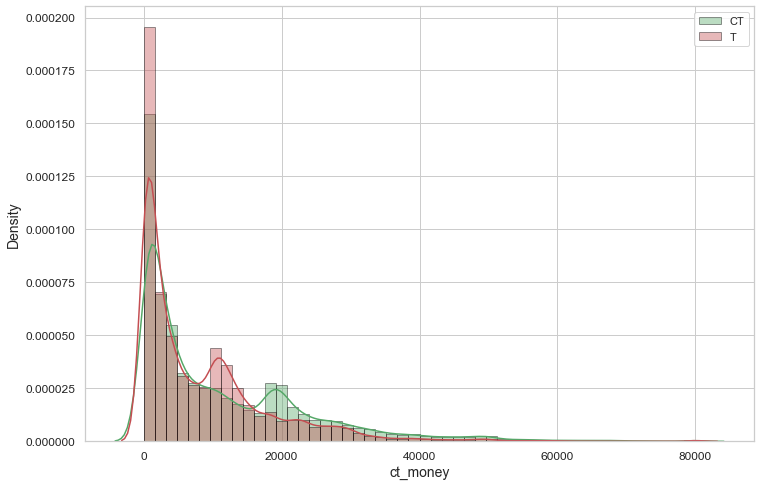

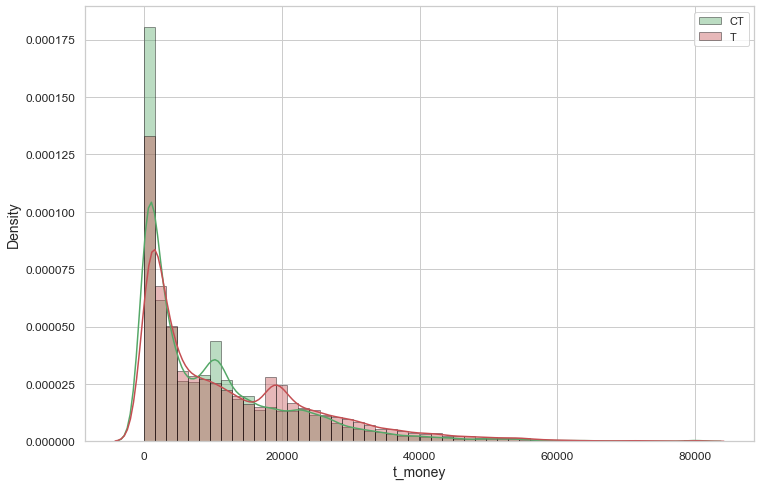

In [ ]:
plot_distributions(['ct_money', 't_money'])

- Importante alla definizione del vincitore sembrano essere anche le informazioni sull'economia della partita, come i fondi disponibili, o il valore totale dellequipaggiamento; in particolare, quest'ultimo sembra avere più rilevanza per il ruound attuale. E' possibile assumere che i soldi in possesso della squadra siano determinanti per il prosieguo della partita più che per la situazione presente, d'altro canto è possibile assumere che una situazione monetaria stabile sia l'indice di una serie di vittorie, tale tendenza potrebbe anche presentarsi nel tempo presente, oltre che influenzare la storia futura della partita.

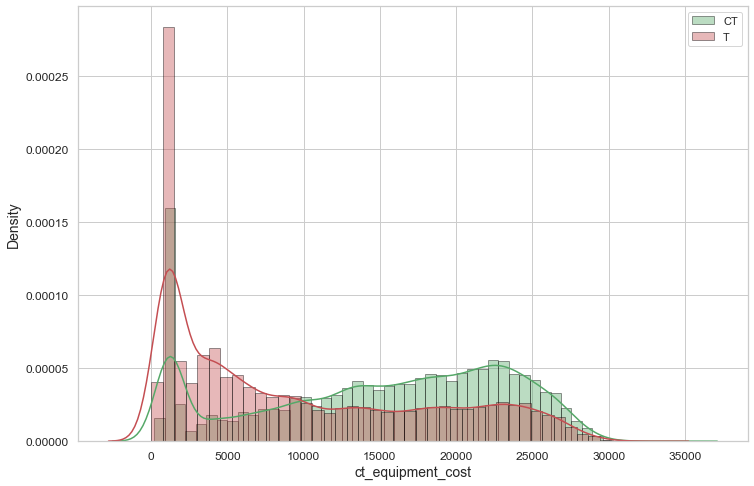

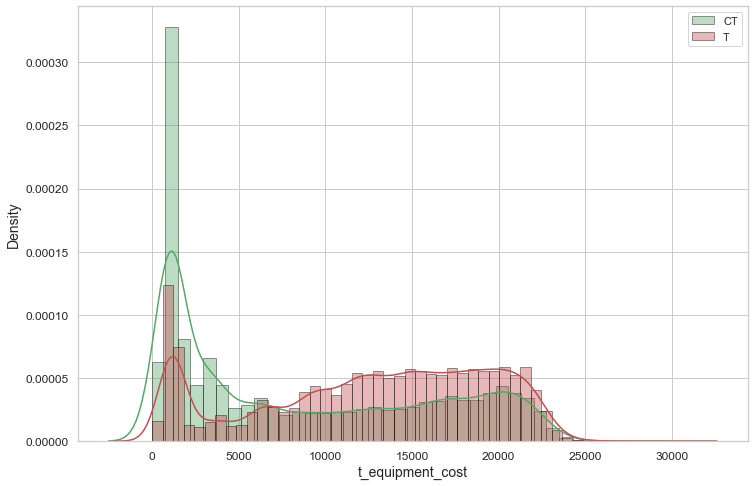

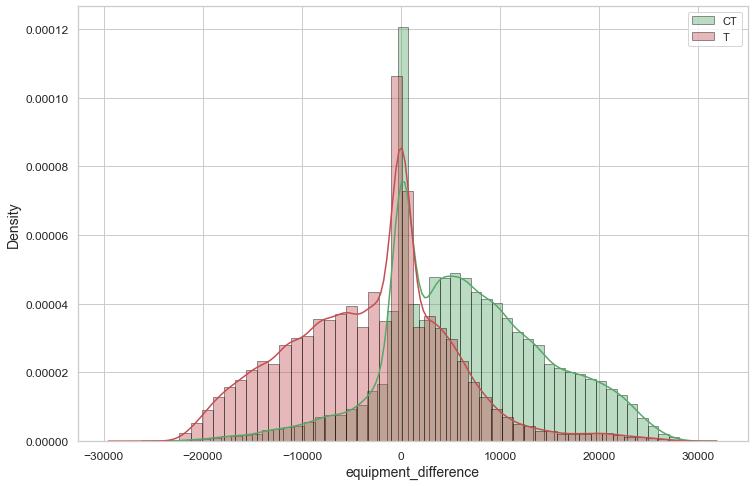

In [ ]:
plot_distributions(['ct_equipment_cost','t_equipment_cost','equipment_difference'])

- Per una rappresentazione "pesata" dell'equipaggiamento, si è deciso di graficare anche il valore medio dell'equipaggiamento per membro del team. Anche in questo caso si nota la medesima tendenza

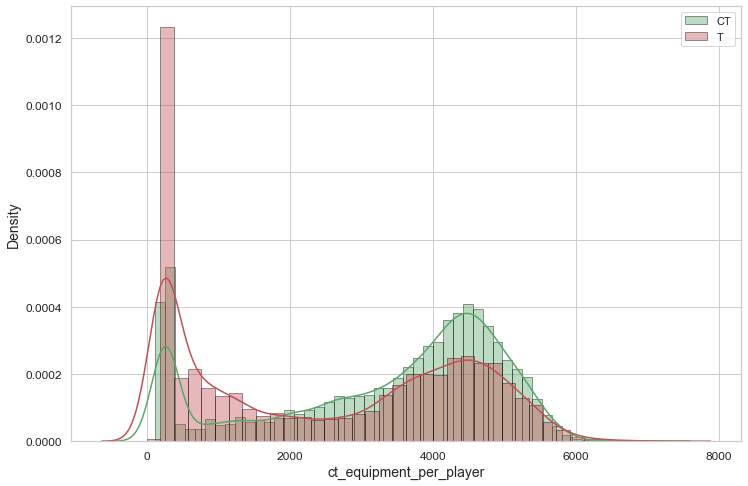

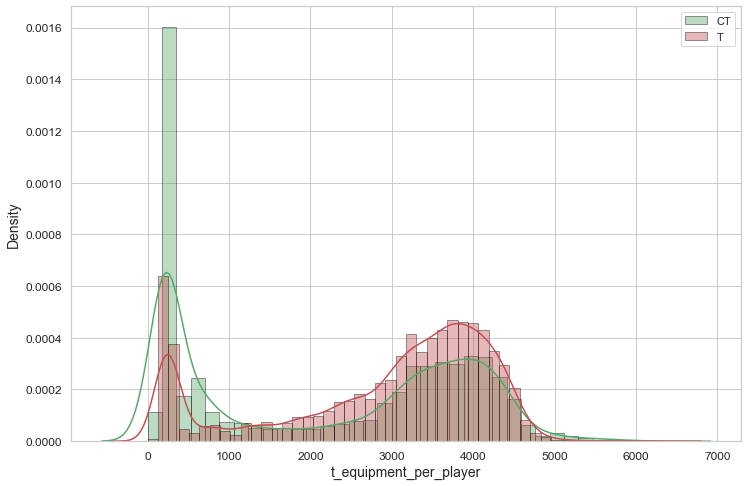

In [ ]:
plot_distributions(['ct_equipment_per_player','t_equipment_per_player'])

Le informazioni emerse da questi grafici possono essere ulteriormente indagate. 

## 1.7 L'equipaggiamento  <a name="1.7"></a>

Verifichiamo innanzitutto chi spende di più per il proprio equipaggiamento

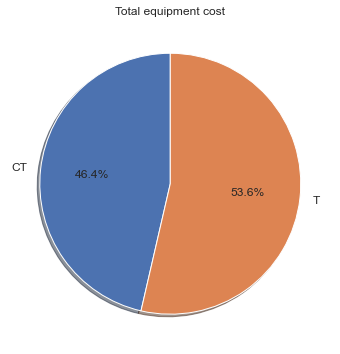

In [ ]:
plt.figure(figsize=(6,6))
total_equip_ct=ds['ct_equipment_cost'].sum()
total_equip_t=ds['t_equipment_cost'].sum()
values=[total_equip_t,total_equip_ct]
labels=['CT','T']
y=np.array(values)
plt.pie(y, labels = labels,autopct='%1.1f%%',explode=[0,0],shadow=True, startangle=90)
plt.title('Total equipment cost')
plt.show() 

Dal pie chart sovrastante è evidente che, in totale, i T tendono ad avere equipaggiamenti più costosi
Vediamo quindi come tale denaro viene distribuito.

Text(0.5, 1.0, 'Equipment distribution')

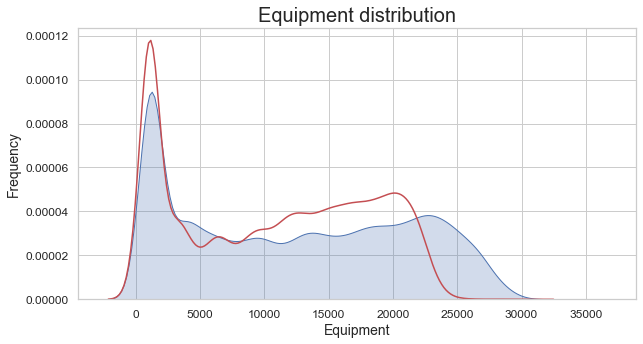

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(ds['ct_equipment_cost'], color="b", shade = True,label='CT')
_=sns.kdeplot(ds['t_equipment_cost'],color="r",shade=False,label='T')
plt.xlabel("Equipment")
plt.ylabel("Frequency")
plt.title('Equipment distribution',size = 20)

Si può notare che i T tendono ad avere equipaggiamenti mediamente meno costosi, ma con una costanza maggiore. I CT riescono ad ottenere equipaggiamenti il cui costo totale rasenta i 30.000$ ma con una frequenza più bassa.

E' possibile ipotizzare che, in corrispondenza dei picchi di acquisto dei CT questi si trovino in una fase della partita in cui la loro economia è ben costruita, i.e., stanno vincendo da molti round.
Possiamo verificare questo focalizzandoci, ad esempio, sul range di valori tra 20.000$ e 35.000$ e verificando quale sia la media di score tra le due squadre.

In [ ]:
ds_sub=ds[(ds['ct_equipment_cost']>=20000) & (ds['ct_equipment_cost']<=35000)]

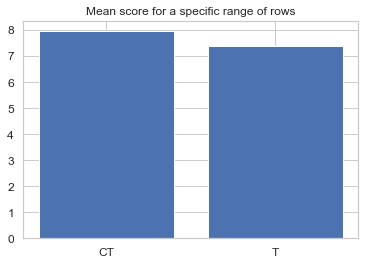

In [ ]:

plt.bar(['CT', 'T'], [ds_sub['ct_score'].mean(), ds_sub['t_score'].mean()])
plt.title('Mean score for a specific range of rows')
plt.show()

Evidentemente, per quel range, i CT hanno una media di punteggio maggiore. In generale infatti la media dei punteggi risulta essere abbastanza equilibrata, come dimostra il seguente grafico.

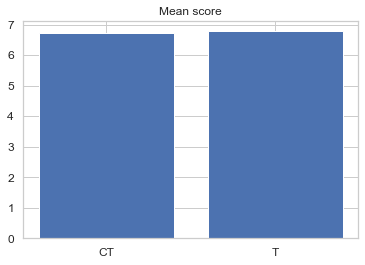

In [ ]:
plt.bar(['CT', 'T'], [ds['ct_score'].mean(), ds['t_score'].mean()])
plt.title('Mean score')
plt.show()

Abbiamo quindi verificato come le squadre usino i loro soldi, ma come si comportano nel "risparmio" di tali fondi, ovvero, tra un round e l'altro, di quanto denaro dispone ogni squadra?

Text(0.5, 1.0, 'Money distribution')

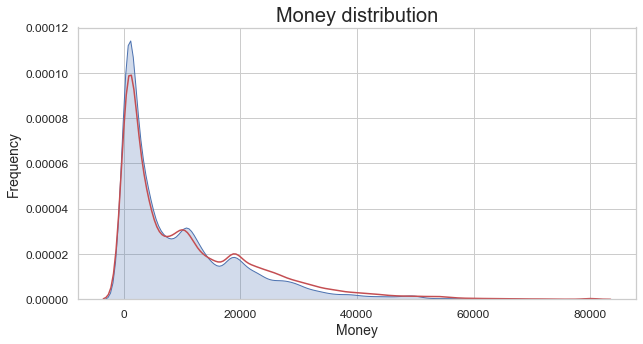

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(ds['ct_money'], color="b", shade = True,label='CT')
_=sns.kdeplot(ds['t_money'],color='r',shade=False,label='T')
plt.xlabel("Money")
plt.ylabel("Frequency")
plt.title('Money distribution',size = 20)

Dal grafico si evince che i T tendono a spendere di meno dei CT, o comunque, hanno una maggiore disponibilità di denaro, che si traduce in equipaggiamenti mediamente più costosi, e più fondi risparmati. Come possiamo spiegare uno scenario del genere? <br>
E' possibile che, dovendo i T svolgere ruolo attivo nello svolgimento di un round, costretti quindi ad attaccare le posizioni dei CT, per evitare che i difensori abbiano, oltre al vantaggio della posizione difensiva anche quello economico, il gioco tenda a rifornire i T con una maggiore quantità di denaro.

Le tuple del dataset presentano inoltre una forte frequenza per snapshot effettuati a inizio partita, il che potrebbe spiegarsi nel fatto che in alcuni casi, i ruond possono terminare anzitempo, per l'eliminazione totale della squadra avversaria.

Text(0.5, 1.0, 'Time distribution')

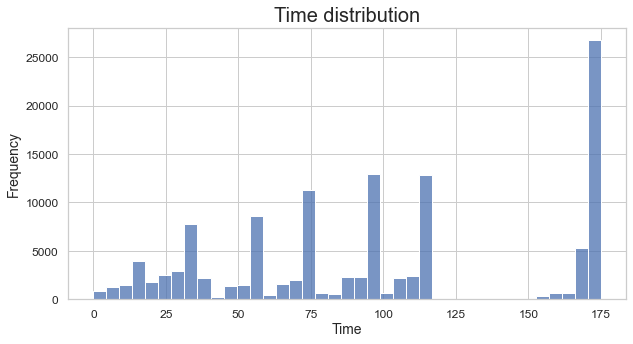

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(ds['time_left'], color="b")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title('Time distribution',size = 20)

## 1.8 Le armi <a name="1.8"></a>

Dopo aver trattato del lato economico, passiamo ora all'uso delle armi

In [ ]:
def plot_weapon(weapons,title):
    plt.figure(figsize=(20,10))
    tmp=ds[weapons].sum().sort_values(ascending=False)
    tmp2=ps.DataFrame(tmp,columns=['value'])
    tmp2['weapon']=tmp2.index
    tmp2=tmp2[tmp2['value']>1500]
    p = sns.barplot(x = tmp2['weapon'], y = tmp2['value'])
    p = plt.xticks(rotation=90)
    plt.title("Weapon usage "+title, size=20)

def plot_weapon_based_map(weapons,map,title):
    plt.figure(figsize=(20,10))
    tmp=ds[ds['map']==map][weapons].sum().sort_values(ascending=False)
    tmp2=ps.DataFrame(tmp,columns=['value'])
    tmp2['weapon']=tmp2.index
    tmp2=tmp2[tmp2['value']>1500]
    p = sns.barplot(x = tmp2['weapon'], y = tmp2['value'])
    p = plt.xticks(rotation=90)
    plt.title("Weapon usage "+title, size=20)

In primo luogo, verifichiamo quali siano le armi più utilizzate per CT e T

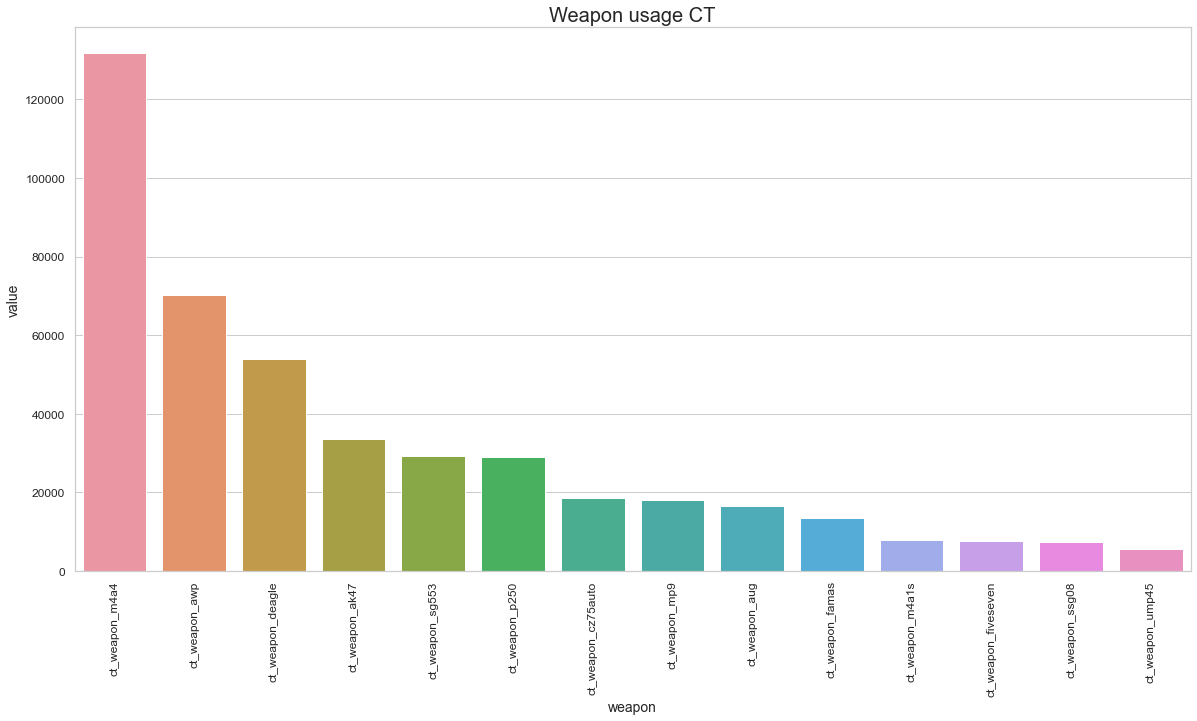

In [ ]:
plot_weapon(ct_weapon,'CT')

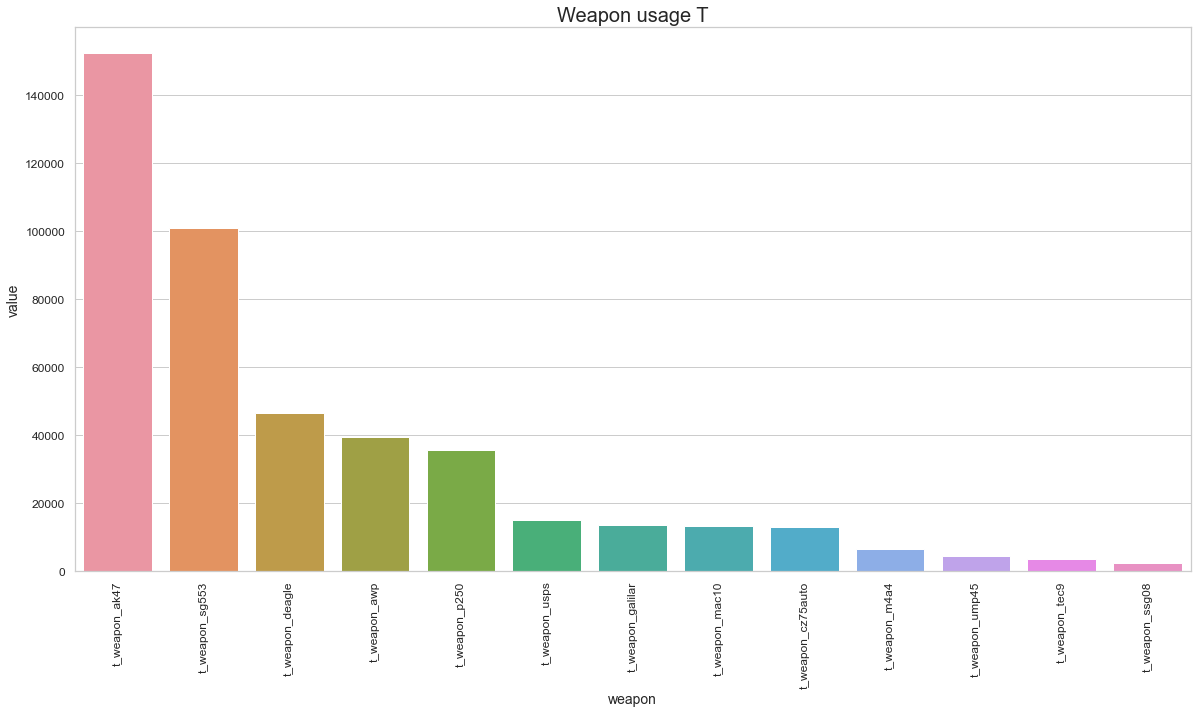

In [ ]:
plot_weapon(t_weapon,'T')

Entrambe le squadre tendono a prediligere la classe dei "rifles", con un particolare interesse poi per fucili di precisione come l'awp e pistole come la desert eagle, le quali, in effetti, sono considerate tra le armi con un rateo costi benefici migliore.

Per quanto riguarda l'uso delle utilities (granate) si può mettere in evidenza un largo utilizzo delle flashbang (utilizzate con maggiore frequenza probabilmente per la loro versatilità e costo relativo abbastanza basso) e delle granate fumogene (che insieme a quelle incendiarie rappresentano uno degli strumenti strategici più importanti per le squadre)

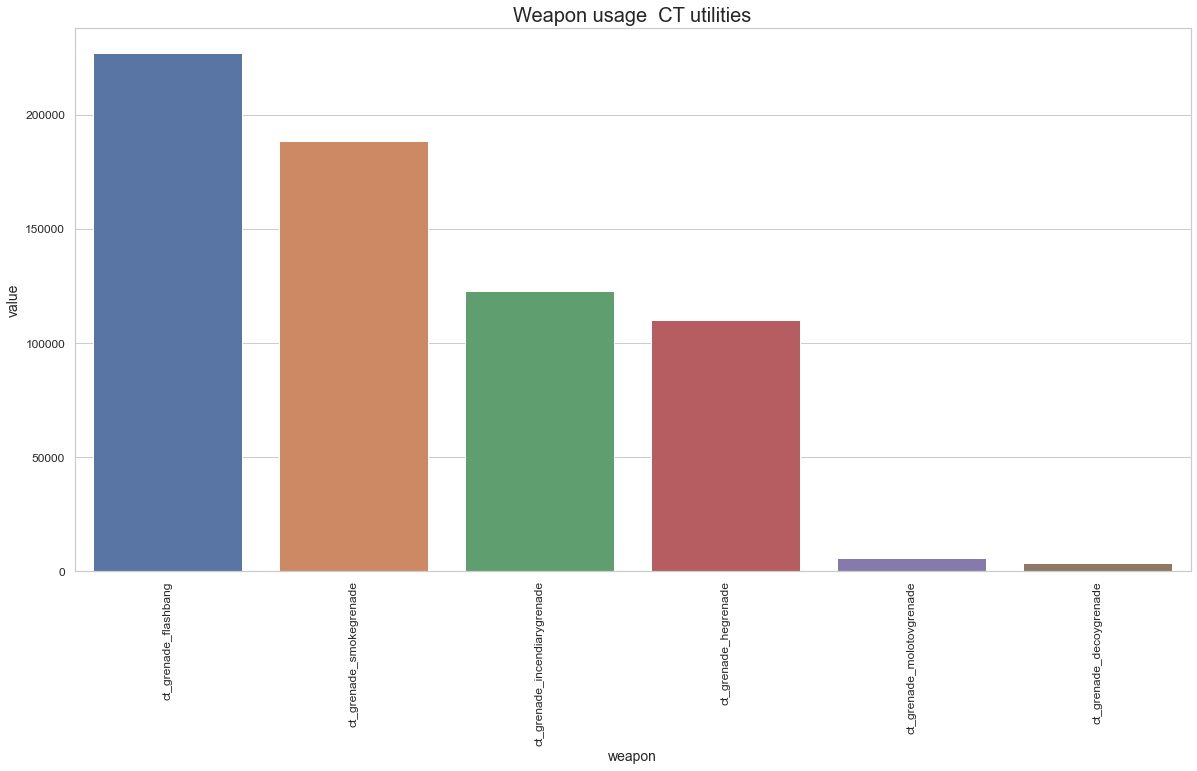

In [ ]:
plot_weapon(ct_utilities,' CT utilities')

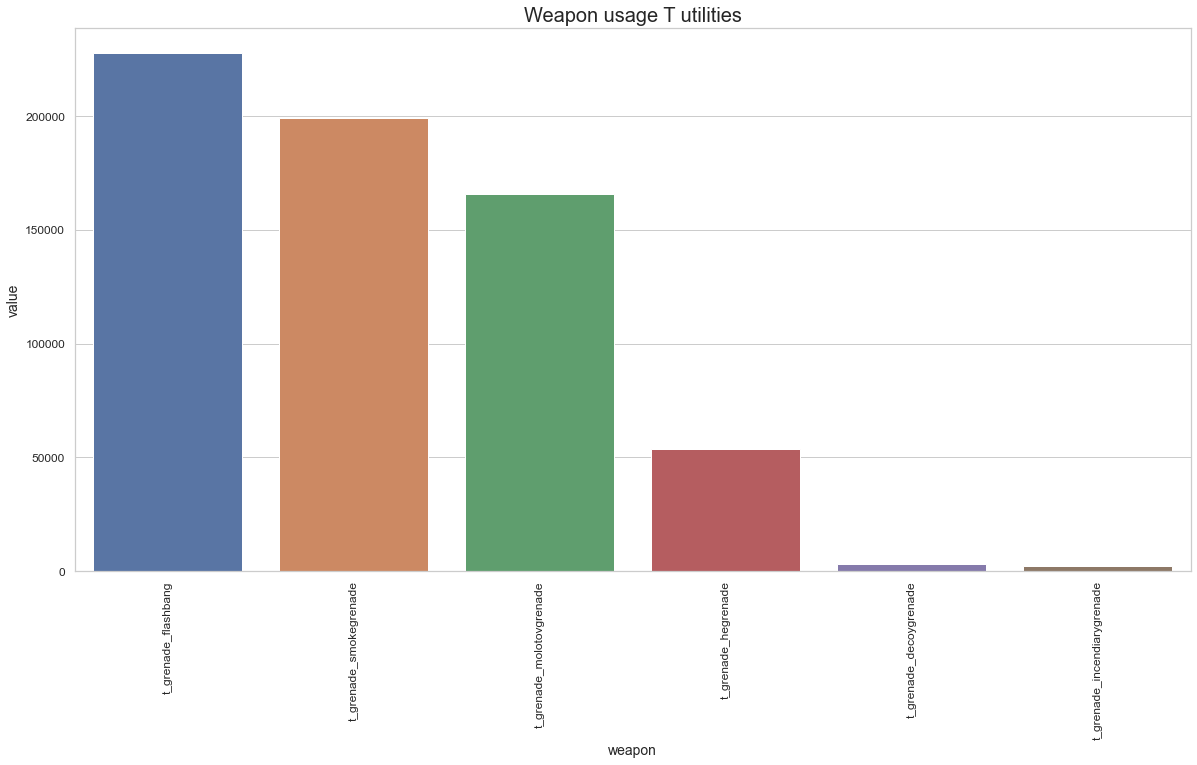

In [ ]:
plot_weapon(t_utilities,'T utilities')

Possiamo fare la seguente ipotesi, sebbene per i T, l'awp (fucile di precisione) sia in generale la quarta arma preferita, è possibile che in base al contesto questa relazione possa cambiare. Consideriamo quindi una mappa con spazi più aperti, che fornisce ai T una posizione di vantaggio già dall'inizio della partita (sniper rifles) come "dust 2". Possiamo supporre che questo aspetto strategico possa avere poi delle conseguenze sull'uso delle armi.

In [ ]:
Image(url='https://static.wikia.nocookie.net/cswikia/images/4/40/De_dust2_radar.png/revision/latest?cb=20201206162746')

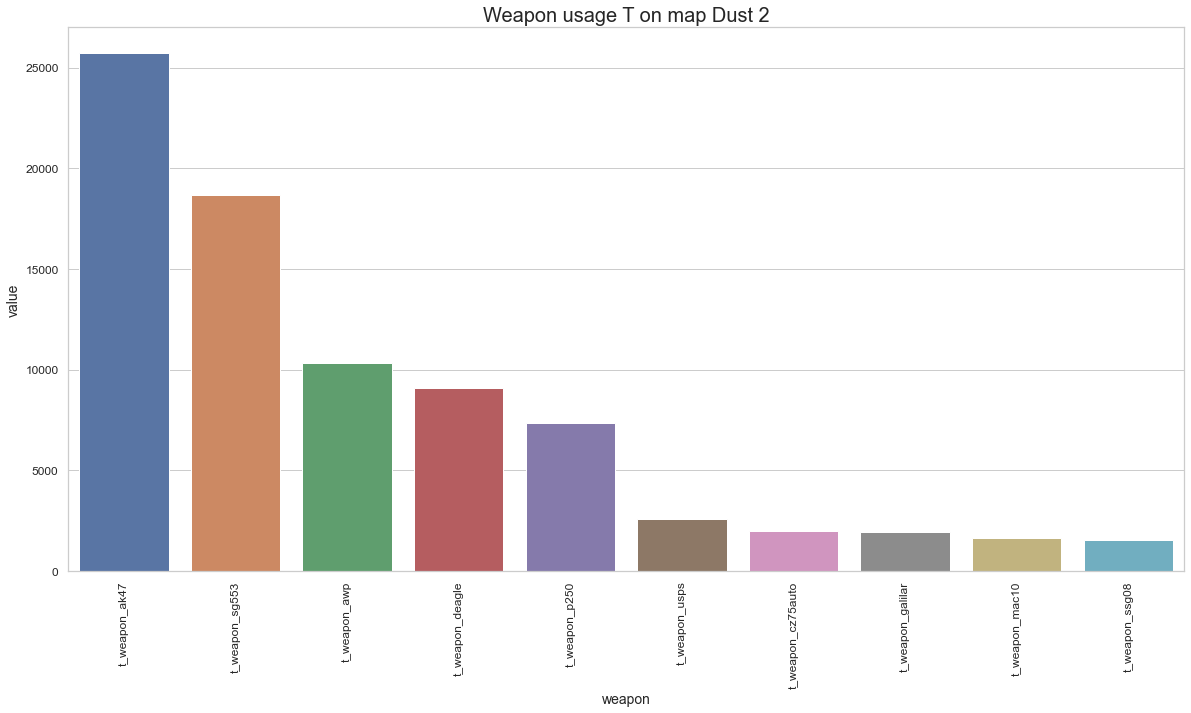

In [ ]:
plot_weapon_based_map(t_weapon,'de_dust2','T on map Dust 2')

In effetti, possiamo verificare che in questo contesto particolare, l'awp passa dalla quarta alla terza posizione.
Questa situazione si verifica in altre mappe? Prendiamo in esame "nuke".

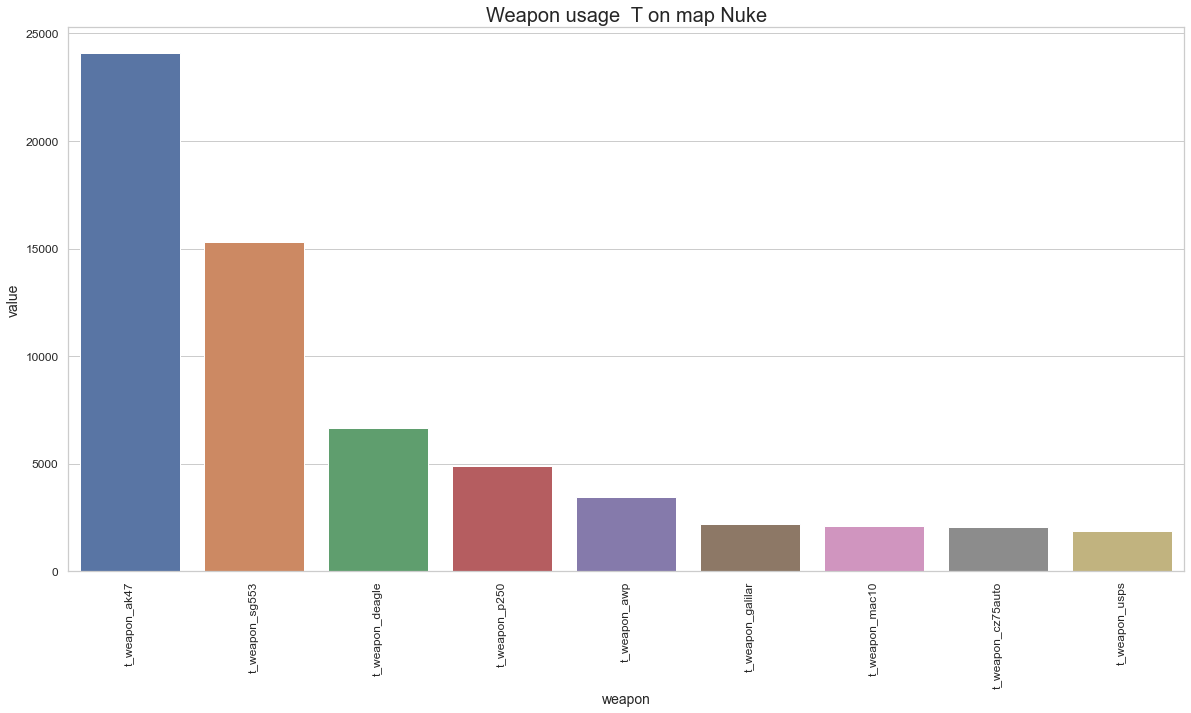

In [ ]:
plot_weapon_based_map(t_weapon,'de_nuke',' T on map Nuke')

In questo caso invece, l'awp si sposta in quinta posizione, ciò potrebbe essere dovuto alla forte posizione, soprattutto per eventuali cecchini, che la mappa offre ai CT. Ciò rende questa mappa di minore utilità per un awp terrorista.

Per quanto riguarda l'uso generale delle utilities, notiamo un quasi perfetto equilibrio. Le granate servono in egual misura ai CT per difendersi e ai T per attaccare e conquistare il sito della bomba.

[657433. 651364.]


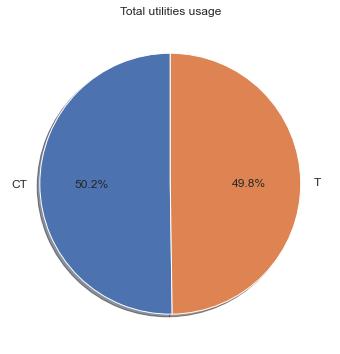

In [ ]:
plt.figure(figsize=(6,6))
total_utilities_ct=ds[ct_utilities].sum()
total_utilities_t=ds[t_utilities].sum()
values=[total_utilities_ct.values.sum(),total_utilities_t.values.sum()]
labels=['CT','T']
y=np.array(values)
print(y)
plt.pie(y, labels = labels,autopct='%1.1f%%',explode=[0,0],shadow=True, startangle=90)
plt.title('Total utilities usage')
plt.show() 


Anche nella quantità totale di armi non si nota nulla di particolare; l'equilibrio è quasi totale.

[449434. 451666.]


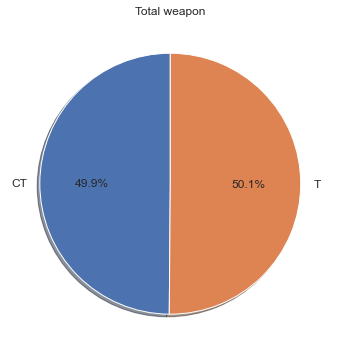

In [ ]:
plt.figure(figsize=(6,6))
total_weapon_ct=ds[ct_weapon].sum()
total_weapon_t=ds[t_weapon].sum()
values=[total_weapon_ct.values.sum(),total_weapon_t.values.sum()]
labels=['CT','T']
y=np.array(values)
print(y)
plt.pie(y, labels = labels,autopct='%1.1f%%',explode=[0,0],shadow=True, startangle=90)
plt.title('Total weapon')
plt.show() 

Ritornando invece alla questione economica, i T presentano una maggiore quantità di denaro in loro possesso, come avevamo già ipotizzato.

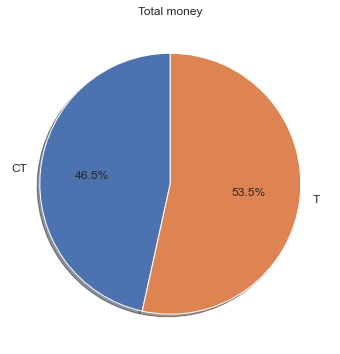

In [ ]:
plt.figure(figsize=(6,6))
total_money_ct=ds['ct_money'].sum()

total_money_t=ds['t_money'].sum()
values=[total_money_ct,total_money_t]
labels=['CT','T']
y=np.array(values)
plt.pie(y, labels = labels,autopct='%1.1f%%',explode=[0,0],shadow=True, startangle=90)
plt.title('Total money')
plt.show() 

Vediamo ora come variano le preferenze di acquisto tra le due squadre, ovvero, quali sono le categorie più popolari e quali le differeze tra T e CT?

Text(0.5, 1.0, 'Weapons distribution T')

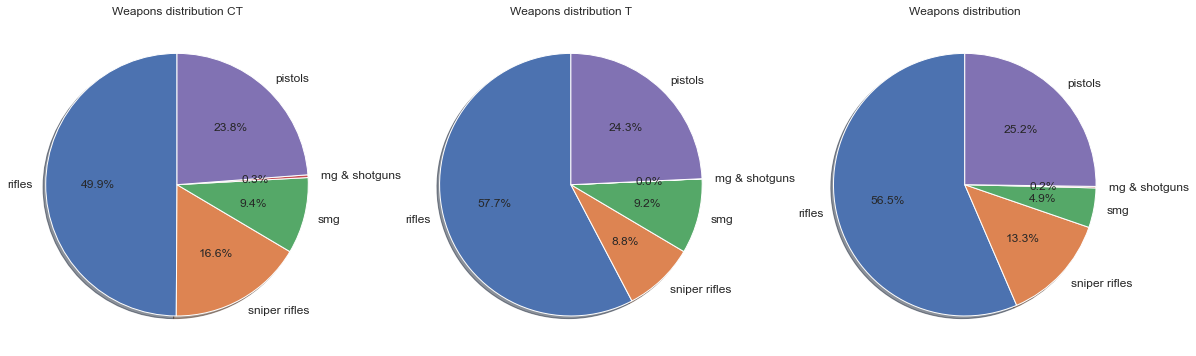

<Figure size 720x720 with 0 Axes>

In [ ]:
fig, (ax1,ax2,ax0) = plt.subplots(1,3,figsize=(20,20)) 
plt.figure(figsize=(10,10))
values=[]
labels=['rifles','sniper rifles','smg','mg & shotguns','pistols']
for x in weapon_classes:
    values.append(ds[x].sum().values.sum())

explode=np.zeros(5)
y=np.array(values)

ax0.pie(y, labels = labels,autopct='%1.1f%%',explode=explode,shadow=True, startangle=90)
ax0.set_title('Weapons distribution')


values=[]
#labels=['rifles','sniper rifles','smg','machine guns & shotguns','pistols']
for x in weapon_classes_ct:
    values.append(ds[x].sum().values.sum())

explode=np.zeros(5)
y=np.array(values)


ax1.set_title('Weapons distribution CT')
ax1.pie(y, labels = labels,autopct='%1.1f%%',explode=explode,shadow=True, startangle=90)



#plt.figure(figsize=(10,10))
values=[]
#labels=['rifles','sniper rifles','smg','machine guns & shotguns','pistols']
for x in weapon_classes_t:
    values.append(ds[x].sum().values.sum())

explode=np.zeros(5)
y=np.array(values)

ax2.pie(y, labels = labels,autopct='%1.1f%%',explode=explode,shadow=True, startangle=90)
ax2.set_title('Weapons distribution T')


Considerando la distribuzione totale, si nota un elevato numero di rifles, con le pistole in seconda posizione, i fucili di precisione a seguire, le smg, e infine le machine guns e i fucili a pompa. Tale distribuzione si mantiene pressoché invariata tra T e CT, sebbene si possa notare qualche differenza. In particolare, i CT tendono ad acquistare più fucili di precisione rispetto ai T. Tale fenomeno è da ricondursi al ruolo svolto dai CT (i difensori, che quindi, avendo posizioni difensive possono permettersi armi molto più statiche come i fucili di precisione) e dai T (gli attaccanti, che quindi devono prediligere armi più dinamiche)

Ci chiediamo adesso come influenzi la presenza del kit di disinnesco in quei casi in cui la bomba è stata piazzata, l'assunzione che possiamo effettuare è che ovviamente, in tali situazioni, la probabilità di successo dei CT sia molto più alta.

In [ ]:
print(ds[(ds['bomb_planted']==True) & (ds['ct_defuse_kits']>0)].shape[0]/ds[(ds['bomb_planted']==True) ].shape[0])


0.5700087693656826


Solo nel 57% dei casi in cui la bomba è stata piazzata vi è almeno un kit per il disinnesco

<Figure size 432x432 with 0 Axes>

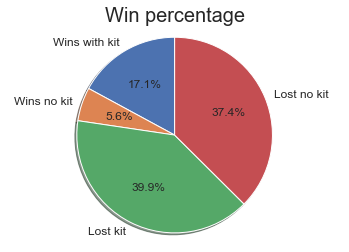

In [ ]:
wins_kit=ds[(ds['bomb_planted']==True) & (ds['ct_defuse_kits']>0) & (ds[target_feature]=='CT')].shape[0]
wins_no_kit=ds[(ds['bomb_planted']==True) & (ds['ct_defuse_kits']==0) & (ds[target_feature]=='CT')].shape[0]
lost_kit=ds[(ds['bomb_planted']==True) & (ds[target_feature]=='T') & (ds['ct_defuse_kits']>0)].shape[0]
lost_no_kit=ds[(ds['bomb_planted']==True) & (ds[target_feature]=='T') & (ds['ct_defuse_kits']==0) ].shape[0]

plt.figure(figsize=(6,6))
labels = 'Wins with kit','Wins no kit','Lost kit','Lost no kit'
sizes = [wins_kit,wins_no_kit,lost_kit,lost_no_kit]
explode = (0, 0,0,0)  

fig1, ax1 = plt.subplots()
p = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Win percentage", size=20)
plt.show()

In [ ]:
wins_kit/(wins_kit+wins_no_kit)

0.7548387096774194

In [ ]:
(wins_kit+wins_no_kit)/(wins_no_kit+wins_kit+lost_kit+lost_no_kit)

0.22654194679918152

Notiamo quindi che la presenza dei kit per il disinnesco aiuta i CT a vincere, difatti, sul totale delle vittorie (considerando il caso in cui la bomba è stata piazzata, la probabilità di vittoria sulle vittorie totali è del 75%).<br>
L'uso dei kit è quindi reltivamente importante per garantire la vittoria dei CT, sebbene tale peso non sia così forte come magari supposto, difatti, solo nello 0.22% delle volte in cui la bomba viene piazzata si verifica la vittoria degli anti-terroristi.

<br>
Infine, provvediamo a graficare la distribuzione sull'uso dei kit di disinnesco


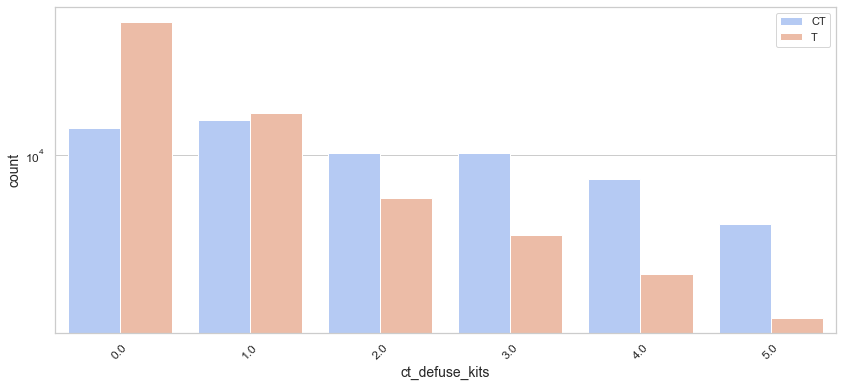

In [ ]:
plot_distributions(['ct_defuse_kits'])

## 1.9 Scatter plot <a name="1.9"></a>

Sono mostrati, di seguito, dei grafici che mettono assieme alcuni attributi per verificare la presenza di possibili relazioni tra essi.

Parte dell'armatura di un giocatore è determinata dall'elmetto, i giocatori hanno infatti la possibilità di acquistare kevlar più elmetto; tali due attributi potrebbero avere una forte correlazione. 

<Figure size 1440x720 with 0 Axes>

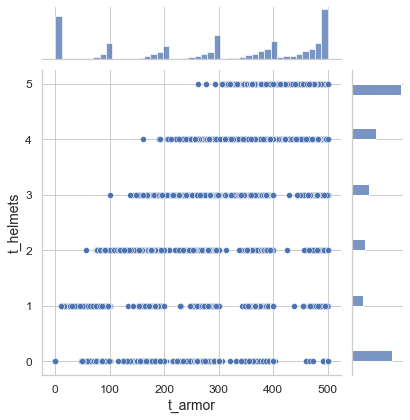

In [ ]:
plt.figure(figsize=(20,10))
p = sns.jointplot(y = 't_helmets', x = 't_armor', data = ds)
p = plt.xticks(rotation=90)

Difatti, se il valore del t_harmor è troppo basso, non vi saranno molti elemetti disponibili in squadra

Simile discorso può essere fatto considerando il valore totale della vita e il numero di giocatori attualmente vivi; in più possiamo vedere come questi attributi sono legati alla percentuale di vittoria delle due squadre

<Figure size 1440x720 with 0 Axes>

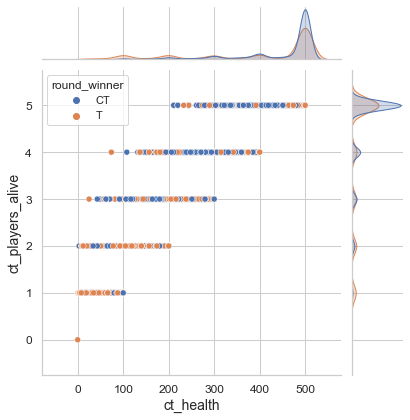

In [ ]:
plt.figure(figsize=(20,10))
p = sns.jointplot(x = 'ct_health', y = 'ct_players_alive', data = ds,hue=target_feature)
p = plt.xticks(rotation=90)

La correlazione è evidente, più giocatori sono in vita, maggiore sarà la vita totale del team, in particolare, più tali attributi sono alti, più la probabilità di vittoria dei CT è alta. Discorso analogo potrebbe essere fatto considerando i T

Per quanto concerne invece il punteggio dei T e CT messi a confronto, è evidente dal grafico sottostante che la maggior parte dei round viene giocata con punteggi equilibrati e con valori compresi tra 0 e 15, i valori superiori corrispondono ad eventuali tempi supplementari. Non si nota nulla di particolare per quanto concerne la correlazione tra le features. Difatti, i tempi supplementari vengono giocati alla meglio di 6, che possono essere reiterati finché una delle due squadre non ha il sopravento sull'altra. <br>
Possiamo spiegare così la forma del grafico sottostante una volta che la soglia dei 15 round per squadra viene superata, affinché si possa continuare nei tempi supplementari lo score trai due team non può differire di molto.

<Figure size 1440x720 with 0 Axes>

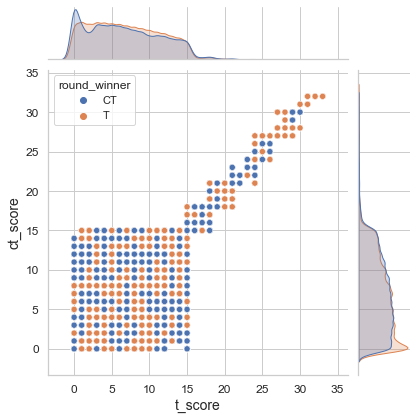

In [ ]:
plt.figure(figsize=(20,10))
p = sns.jointplot(x = 't_score', y = 'ct_score', data = ds,hue=target_feature)
p = plt.xticks(rotation=90)

Vogliamo ora porre la nostra indagine sul rapporto tra l'armatura totale dei ct e l'equipaggiamento totale. E' evidente che per ottenere valori di ct_armor elevati servono anche valori elevati di ct_equipment_cost. Inoltre, a riconferma sull'importanza del valore totale dell'armatura, più ci concentriamo su valori bassi, più la percentuale di vittorie è in favore dei T, mentre più aumenta più si assiste ad un cambiamento in favore dei CT.

<Figure size 1440x720 with 0 Axes>

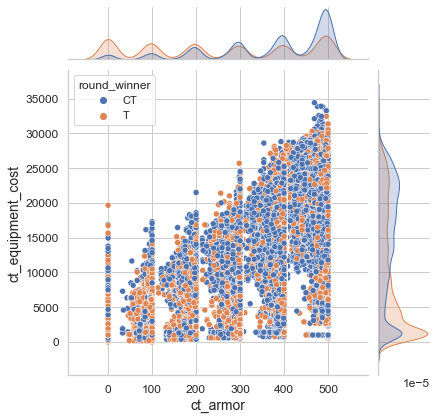

In [ ]:
plt.figure(figsize=(20,10))
p = sns.jointplot(x = 'ct_armor', y = 'ct_equipment_cost', data = ds,hue=target_feature)
p = plt.xticks(rotation=90)


Concentriamoci ora sul rapporto tra il costo dell'equipaggiamento e il numero di ak47, l'arma più popolare tra i T. E' evidente una certa correlazione tra i due attributi, inoltre, maggiore è il numero di ak, maggiore è la concentrazione di vittore dei terroristi.

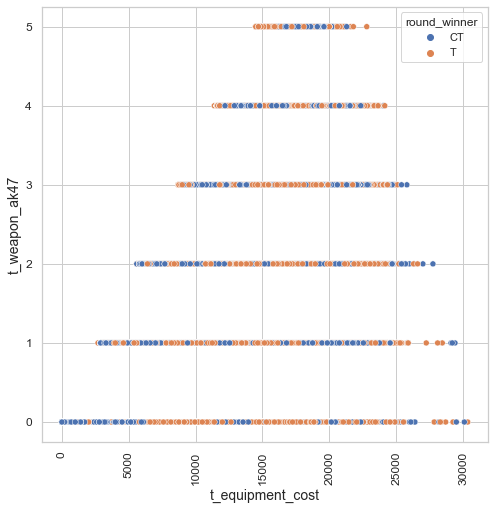

In [ ]:
plt.figure(figsize=(8,8))
p = sns.scatterplot(x = 't_equipment_cost', y = 't_weapon_ak47', data = ds,hue=target_feature)
p = plt.xticks(rotation=90)


Considerando invece la relazione tra la differenza di punteggio e quella di equipaggiamento è evidente che la seconda sia più importante della prima, difatti, nel caso in cui questa è in favore dei T, la loro percentuale di vittoria è decisamente più alta. Simile discorso non può essere fatto per la differenza di score.

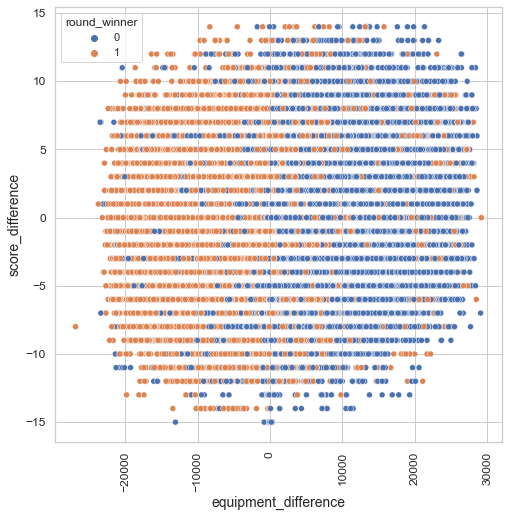

In [ ]:
plt.figure(figsize=(8,8))
p = sns.scatterplot(y = 'score_difference', x = 'equipment_difference', data = ds,hue=target_feature)
p = plt.xticks(rotation=90)

## 1.10 Le mappe <a name="1.10"></a>

Passiamo ora all'analisi relativa alle mappe. Vediamo innanzitutto come si presenta la distribuzione

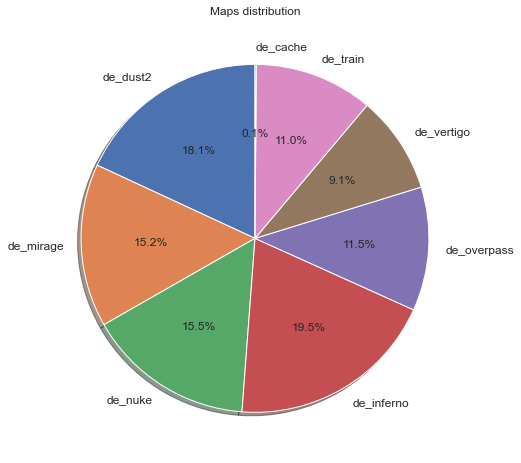

In [ ]:
plt.figure(figsize=(8,8))
values=[]
labels=ds['map'].unique()
for x in labels:
    values.append((ds[ds['map']==x].shape[0]))
y=np.array(values)
explode=np.zeros(labels.shape[0])

plt.pie(y, labels = labels,autopct='%1.1f%%',explode=explode,shadow=True, startangle=90)
plt.title('Maps distribution')
plt.show() 

La mappa più giocata è "inferno" mentre la meno giocata è "cache".


Infine, viene visualizzata la percentuale totale di vittoria tra T e CT

<Figure size 432x432 with 0 Axes>

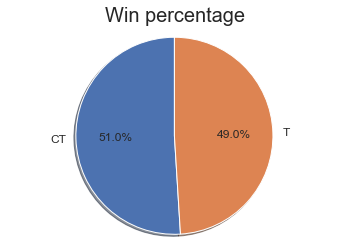

In [ ]:
plt.figure(figsize=(6,6))
labels = 'CT','T'
sizes = ds[target_feature].value_counts()
explode = (0, 0)  

fig1, ax1 = plt.subplots()
p = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Win percentage", size=20)
plt.show()

I valori della target class sono quasi totalmente bilanciati, si nota soltanto un piccolo sbilanciamento verso i CT, che hanno una percentuale di vittoria del 51%

Diamo ora uno sguardo più generale alla correlazione trai vari attributi, grafichiamo la matrice di correlazione.


## 1.11 Correlazione tra gli attributi <a name="1.11"></a>

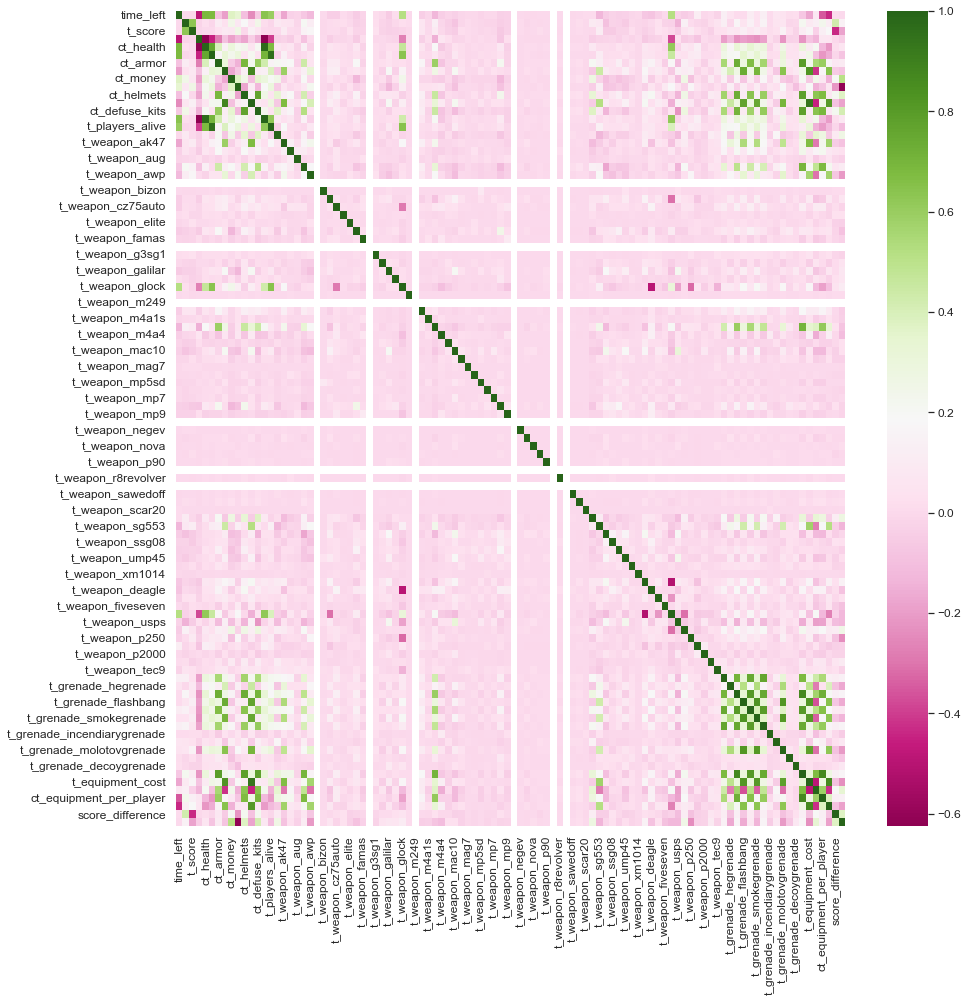

In [ ]:
plt.figure(figsize=(15,15))
corr_matrix=ds.corr()
_=sns.heatmap(corr_matrix,cmap='PiYG')

La matrice non presenta troppo spesso zone di forte correlazione, esistono naturalmente attributi critici, che verranno trattati nella fase di pre-processing.<br>
Per una prima analisi, può essere visualizzata la scatter matrix relativa alla differenza nell'equipaggiamento, il valore di vita dei giocatori e il tempo rimanente.

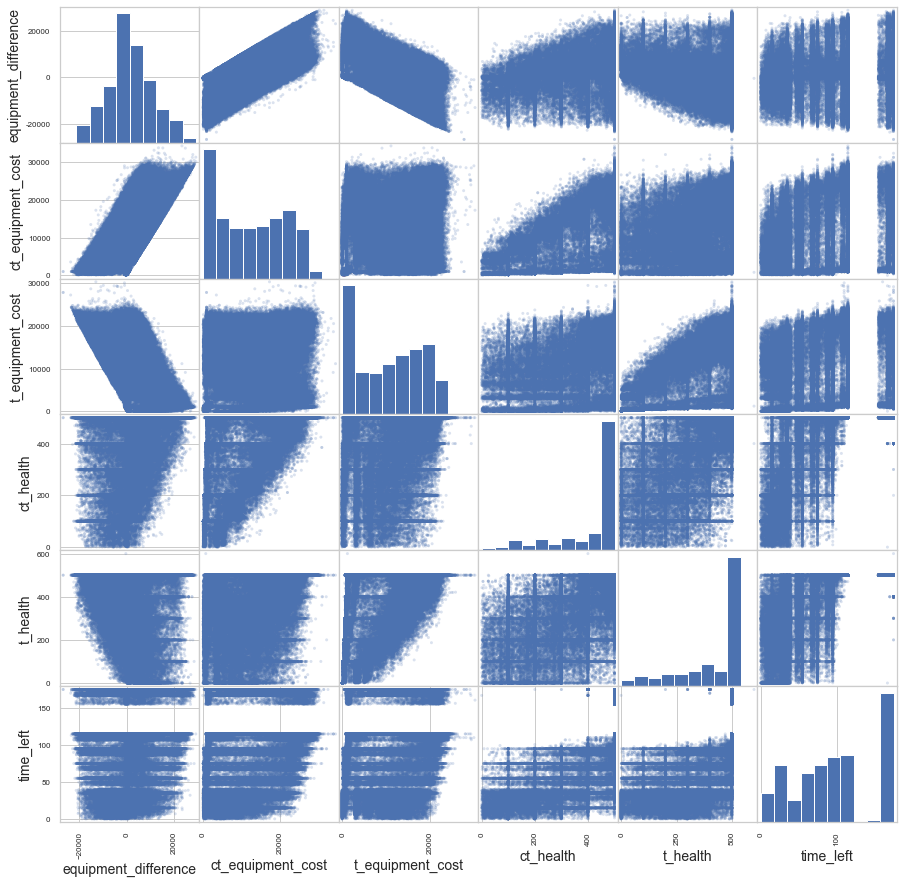

In [ ]:
scatter_matrix(ds[['equipment_difference' , 'ct_equipment_cost','t_equipment_cost',
                    'ct_health','t_health' ,'time_left'
                    
                    ]], figsize=(15,15),alpha=0.2)
                    
plt.show()


Qui possiamo vedere con maggiore chiarezza la correlazione tra la differenza di equipaggiamento e costo

Possiamo anche visualizzare eventuali correlazioni tra il costo degli equipaggiamenti e l'armatura delle squadre

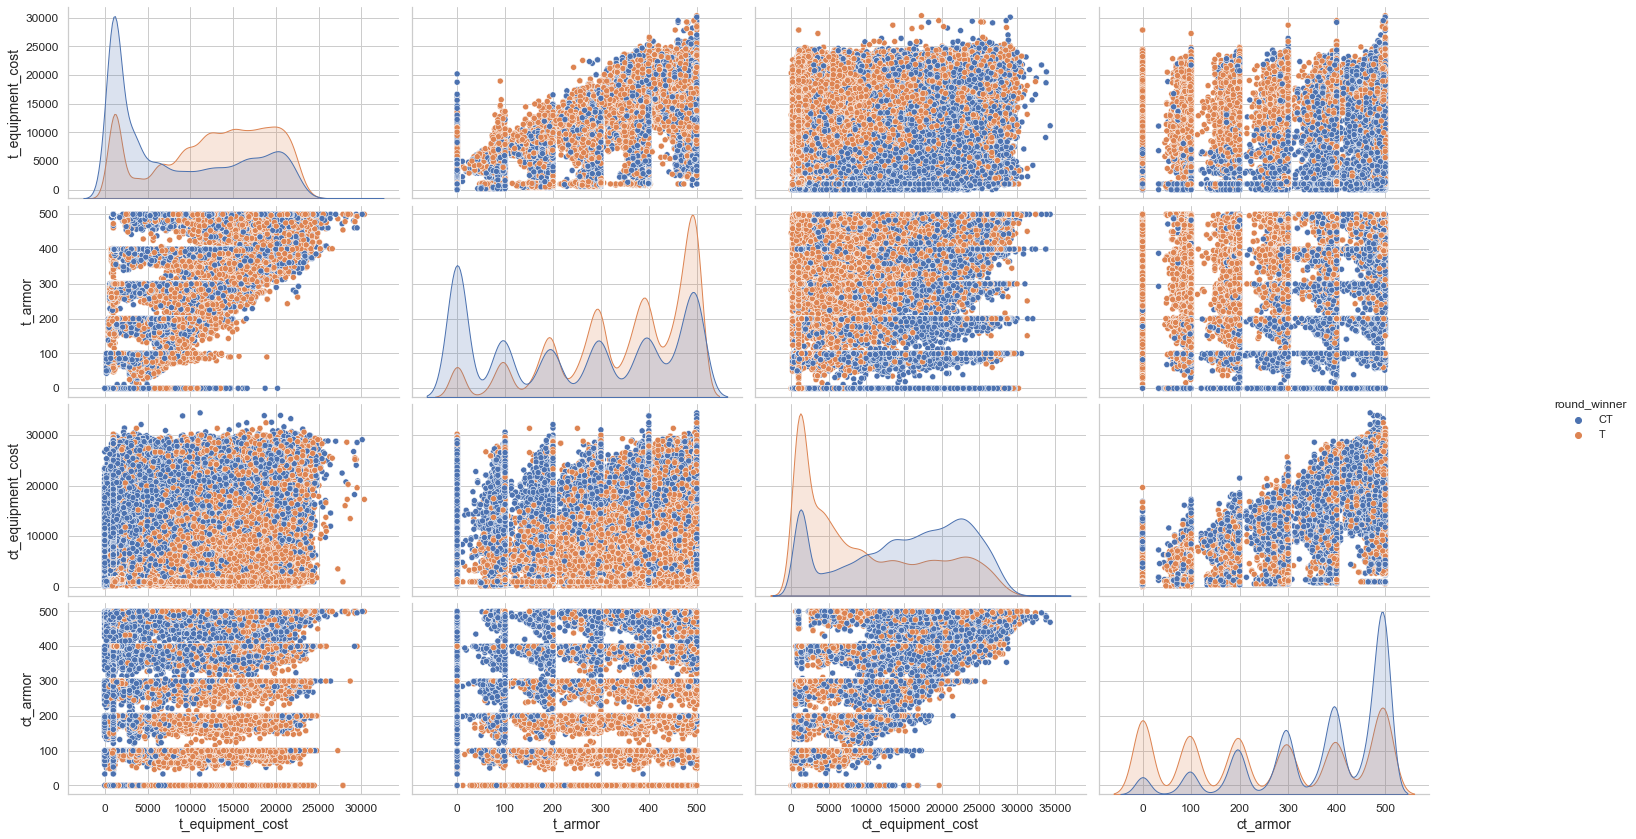

In [ ]:
pp=sns.pairplot(ds,x_vars=['t_equipment_cost', 't_armor',
                            'ct_equipment_cost', 'ct_armor'],
                y_vars=['t_equipment_cost', 't_armor',
                            'ct_equipment_cost', 'ct_armor'],
                hue=target_feature,
                diag_kind='kde',
                diag_kws={'alpha':0.2})

pp.fig.set_size_inches(24,12)

E' evidente che alcuni attributi presentino delle correlazioni, tale aspetto verrà trattato e risolto nella sezione successiva.

## 1.12 Rumore e outliers <a name="1.12"></a>

Dall'analisi dei dati è inoltre emersa la presenta di un outliers in corrispondenza del numero di giocatori in vita (il range di riferimento è infatti [0,5]), non conosciamo la natura di tale evento, potrebbe trattarsi di un semplice errore, o qualcosa di utile per le nostre analisi, per sicurezza, tale tupla verrà eliminata durante la fase di trasformazione.

In [8]:
print(len(ds[ds['t_players_alive']>5]))
print(len(ds[ds['ct_players_alive']>5]))

1
0


Vi è una sola tupla che presenti tali caratteristiche

Andiamo alla ricerca di ulteriori outlier, verificando le condizioni al limite.
Verifichiamo quante siano le vittorie dei T, quando nessuno del team è più in vita e la bomba non è stata piazzata (caso non possibile)

In [9]:
ds[(ds['t_players_alive']==0) & (ds['round_winner']=='T') & (ds['bomb_planted']==False)]

time_left  ct_score  t_score         map  bomb_planted  ct_health  \
29725      167.0       1.0      6.0  de_inferno         False        0.0   

       t_health  ct_armor  t_armor  ct_money  ...  ct_grenade_decoygrenade  \
29725       0.0       0.0      0.0       0.0  ...                      0.0   

       t_grenade_decoygrenade  round_winner  ct_equipment_cost  \
29725                     0.0             T                0.0   

       t_equipment_cost  equipment_difference  ct_equipment_per_player  \
29725               0.0                   0.0                      0.0   

       t_equipment_per_player  score_difference  money_difference  
29725                     0.0              -5.0               0.0  

[1 rows x 104 columns]

Anche questa tupla dovrà essere filtrata in fase di trasformazione, in quanto non è possibile che la squadra dei T vinca quando la bomba non è stata piazzata e i il team è stato eliminato

Verifichiamo ora, se esistono tuple con CT vincitori ma nessun giocatore del team in vita.

In [10]:
ds[(ds['ct_players_alive']==0) & (ds['round_winner']=='CT')]

Empty DataFrame
Columns: [time_left, ct_score, t_score, map, bomb_planted, ct_health, t_health, ct_armor, t_armor, ct_money, t_money, ct_helmets, t_helmets, ct_defuse_kits, ct_players_alive, t_players_alive, ct_weapon_ak47, t_weapon_ak47, ct_weapon_aug, t_weapon_aug, ct_weapon_awp, t_weapon_awp, ct_weapon_bizon, t_weapon_bizon, ct_weapon_cz75auto, t_weapon_cz75auto, ct_weapon_elite, t_weapon_elite, ct_weapon_famas, t_weapon_famas, ct_weapon_g3sg1, t_weapon_g3sg1, ct_weapon_galilar, t_weapon_galilar, ct_weapon_glock, t_weapon_glock, ct_weapon_m249, t_weapon_m249, ct_weapon_m4a1s, t_weapon_m4a1s, ct_weapon_m4a4, t_weapon_m4a4, ct_weapon_mac10, t_weapon_mac10, ct_weapon_mag7, t_weapon_mag7, ct_weapon_mp5sd, t_weapon_mp5sd, ct_weapon_mp7, t_weapon_mp7, ct_weapon_mp9, t_weapon_mp9, ct_weapon_negev, t_weapon_negev, ct_weapon_nova, t_weapon_nova, ct_weapon_p90, t_weapon_p90, ct_weapon_r8revolver, t_weapon_r8revolver, ct_weapon_sawedoff, t_weapon_sawedoff, ct_weapon_scar20, t_weapon_scar20, ct_weapon_sg553, t_weapon_sg553, ct_weapon_ssg08, t_weapon_ssg08, ct_weapon_ump45, t_weapon_ump45, ct_weapon_xm1014, t_weapon_xm1014, ct_weapon_deagle, t_weapon_deagle, ct_weapon_fiveseven, t_weapon_fiveseven, ct_weapon_usps, t_weapon_usps, ct_weapon_p250, t_weapon_p250, ct_weapon_p2000, t_weapon_p2000, ct_weapon_tec9, t_weapon_tec9, ct_grenade_hegrenade, t_grenade_hegrenade, ct_grenade_flashbang, t_grenade_flashbang, ct_grenade_smokegrenade, t_grenade_smokegrenade, ct_grenade_incendiarygrenade, t_grenade_incendiarygrenade, ct_grenade_molotovgrenade, t_grenade_molotovgrenade, ct_grenade_decoygrenade, t_grenade_decoygrenade, round_winner, ct_equipment_cost, t_equipment_cost, equipment_difference, ...]
Index: []

[0 rows x 104 columns]

Per quanto concerne invece il lato CT non notiamo alcuna tupla sospetta

Diamo uno sguardo ad alcuni dati statistici provenienti dal dataframe

In [ ]:
ds.describe()

time_left       ct_score        t_score      ct_health  \
count  122410.000000  122410.000000  122410.000000  122410.000000   
mean       97.886922       6.709239       6.780435     412.106568   
std        54.465238       4.790362       4.823543     132.293290   
min         0.010000       0.000000       0.000000       0.000000   
25%        54.920000       3.000000       3.000000     350.000000   
50%        94.910000       6.000000       6.000000     500.000000   
75%       166.917500      10.000000      10.000000     500.000000   
max       175.000000      32.000000      33.000000     500.000000   

            t_health       ct_armor        t_armor       ct_money  \
count  122410.000000  122410.000000  122410.000000  122410.000000   
mean      402.714500     314.142121     298.444670    9789.023773   
std       139.919033     171.029736     174.576545   11215.042286   
min         0.000000       0.000000       0.000000       0.000000   
25%       322.000000     194.000000     174.000000    1300.000000   
50%       500.000000     377.000000     334.000000    5500.000000   
75%       500.000000     486.000000     468.000000   14600.000000   
max       600.000000     500.000000     500.000000   80000.000000   

             t_money     ct_helmets  ...  t_grenade_molotovgrenade  \
count  122410.000000  122410.000000  ...             122410.000000   
mean    11241.036680       2.053901  ...                  1.352095   
std     12162.806759       1.841470  ...                  1.663246   
min         0.000000       0.000000  ...                  0.000000   
25%      1550.000000       0.000000  ...                  0.000000   
50%      7150.000000       2.000000  ...                  1.000000   
75%     18000.000000       4.000000  ...                  2.000000   
max     80000.000000       5.000000  ...                  5.000000   

       ct_grenade_decoygrenade  t_grenade_decoygrenade  ct_equipment_cost  \
count            122410.000000           122410.000000      122410.000000   
mean                  0.027694                0.025750       12311.216812   
std                   0.169531                0.164162        8765.859741   
min                   0.000000                0.000000           0.000000   
25%                   0.000000                0.000000        3600.000000   
50%                   0.000000                0.000000       12200.000000   
75%                   0.000000                0.000000       20250.000000   
max                   3.000000                2.000000       34400.000000   

       t_equipment_cost  equipment_difference  ct_equipment_per_player  \
count     122410.000000         122410.000000            122410.000000   
mean       10656.114697           1655.102116              2943.413596   
std         7423.491910           9482.794785              1830.565204   
min            0.000000         -26850.000000                 0.000000   
25%         2800.000000          -4000.000000               940.000000   
50%        11250.000000            700.000000              3516.666667   
75%        17350.000000           7400.000000              4500.000000   
max        30350.000000          29200.000000              7250.000000   

       t_equipment_per_player  score_difference  money_difference  
count           122410.000000     122410.000000     122410.000000  
mean              2551.048171         -0.071195      -1452.012907  
std               1572.822956          4.153461      13104.484044  
min                  0.000000        -15.000000     -65950.000000  
25%                700.000000         -3.000000      -7600.000000  
50%               3150.000000          0.000000       -400.000000  
75%               3850.000000          3.000000       4400.000000  
max               6350.000000         14.000000      72000.000000  

[8 rows x 101 columns]

Oltre agli outlier relativi al numero di giocatori in vita, vi sono altre features sospette riguardanti il numero di armi.

In [11]:
ds[ds['t_weapon_cz75auto']>5]['t_weapon_cz75auto']

98707    6.0
Name: t_weapon_cz75auto, dtype: float64

In [12]:
len(ds[ds['t_weapon_glock']>5])

14

In [13]:
len(ds[ds['ct_weapon_usps']>5])

15

E' presente una tupla in cui l'arma cz75auto è posseduta da 6 giocatori per i T, 14 tuple dove invece vi sono più di 5 giocatori che possiedono una glock e altre 15 in cui più di 15 CT hanno una usps. Si tratta in tutti i casi di pistole, tuttavia, è impossibile che una qualsiasi arma sia presente per più di 5 volte in uno snapshot (per team) essendo la squadra composta da al più 5 giocatori e potendo, ogni giocatore, portare al più un'arma primaria e una pistola. Anche queste tuple dovranno essere filtrate.

Verifichiamo in generale quali sono i casi in cui il numero di armi supera quello di giocatori in vita, sarà quindi necessario suddividere la visualizzazione tra le armi primarie e quelle secondarie.


In [14]:
def check_weapons_outliers(columns,players):
    tmp=[ds[columns].sum(axis=1),ds[players]]
    headers=['weapons_sum',players]
    tmp_ds=ps.concat(tmp,axis=1,keys=headers)
    print(len(tmp_ds[tmp_ds['weapons_sum']>tmp_ds[players]]))


In [ ]:
check_weapons_outliers(primary_ct,'ct_players_alive')

0


In [ ]:
check_weapons_outliers(secondary_ct,'ct_players_alive')

57


In [ ]:
check_weapons_outliers(primary_t,'t_players_alive')

0


In [ ]:
check_weapons_outliers(secondary_t,'t_players_alive')

80


Abbiamo quindi individuato qualche tupla anomala, che verrà gestita nella prossima fase

## 1.13 Ancora sulla correlazione <a name="1.13"></a>

Tornando invece alla matrice di correlazione, possiamo indagare meglio quale siano gli attributi che più hanno dipendenza rispetto al campo relativo al costo dell'equipaggiamento, dal momento che già la rappresentazione grafica ci aveva permesso di fare qualche ipotesi a riguardo

In [ ]:
corr_matrix['t_equipment_cost'].sort_values(ascending=False)

t_equipment_cost                1.000000
t_helmets                       0.934230
t_equipment_per_player          0.864552
t_armor                         0.825925
t_grenade_flashbang             0.819111
t_grenade_smokegrenade          0.804667
t_grenade_molotovgrenade        0.781154
t_weapon_ak47                   0.665206
t_weapon_sg553                  0.578258
t_weapon_awp                    0.567644
t_grenade_hegrenade             0.494794
ct_weapon_m4a4                  0.351979
ct_equipment_cost               0.322906
t_players_alive                 0.309776
ct_grenade_smokegrenade         0.301454
ct_grenade_flashbang            0.294086
round_winner                    0.280764
ct_equipment_per_player         0.277681
ct_grenade_incendiarygrenade    0.269944
t_health                        0.256400
ct_grenade_hegrenade            0.242212
ct_armor                        0.229308
ct_weapon_awp                   0.209674
t_money                         0.189660
t_score         

In [ ]:
corr_matrix['ct_equipment_cost'].sort_values(ascending=False)

ct_equipment_cost               1.000000
ct_grenade_flashbang            0.868431
ct_grenade_smokegrenade         0.804697
ct_armor                        0.792333
ct_defuse_kits                  0.781452
ct_helmets                      0.780664
ct_grenade_incendiarygrenade    0.745160
ct_weapon_m4a4                  0.705434
ct_weapon_awp                   0.700686
ct_grenade_hegrenade            0.682121
equipment_difference            0.671613
ct_players_alive                0.327241
t_grenade_molotovgrenade        0.327161
t_equipment_cost                0.322906
ct_weapon_sg553                 0.319135
t_grenade_smokegrenade          0.317414
ct_weapon_ak47                  0.311690
ct_health                       0.304638
t_helmets                       0.301765
t_grenade_flashbang             0.297763
t_armor                         0.248662
t_weapon_ak47                   0.245449
ct_weapon_aug                   0.242551
ct_weapon_p250                  0.222511
ct_score        

Come mostrato dal grafico e dall'analisi sulla matrice di correlazione, esiste un legame abbastanza forte con altri attributi, circa 0.8, leggermente più evidente per i T

In [ ]:
corr_matrix[target_feature].sort_values(ascending=False)

round_winner                    1.000000
t_helmets                       0.297458
t_armor                         0.290753
t_equipment_cost                0.280764
t_weapon_ak47                   0.194147
bomb_planted                    0.187101
t_grenade_flashbang             0.166839
t_weapon_sg553                  0.163709
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps                   0.136694
t_grenade_molotovgrenade        0.116754
t_grenade_hegrenade             0.116336
t_money                         0.098362
t_health                        0.091361
t_weapon_m4a4                   0.088002
t_weapon_mac10                  0.087114
t_weapon_glock                  0.069004
t_weapon_ump45                  0.067326
t_weapon_galilar                0.062742
t_grenade_incendiarygrenade     0.050546
t_weapon_p250                   0.045456
ct_weapon_ssg08                 0.038482
t_weapon_fivesev

Inoltre, l'attributo target non ha una correlazione elevata con le altre features, il dataset è abbastanza bilanciato sotto questo punto di vista.

Possiamo graficare la distribuzione dei valori di alcuni attributi del dataframe.

<Figure size 1080x1080 with 0 Axes>

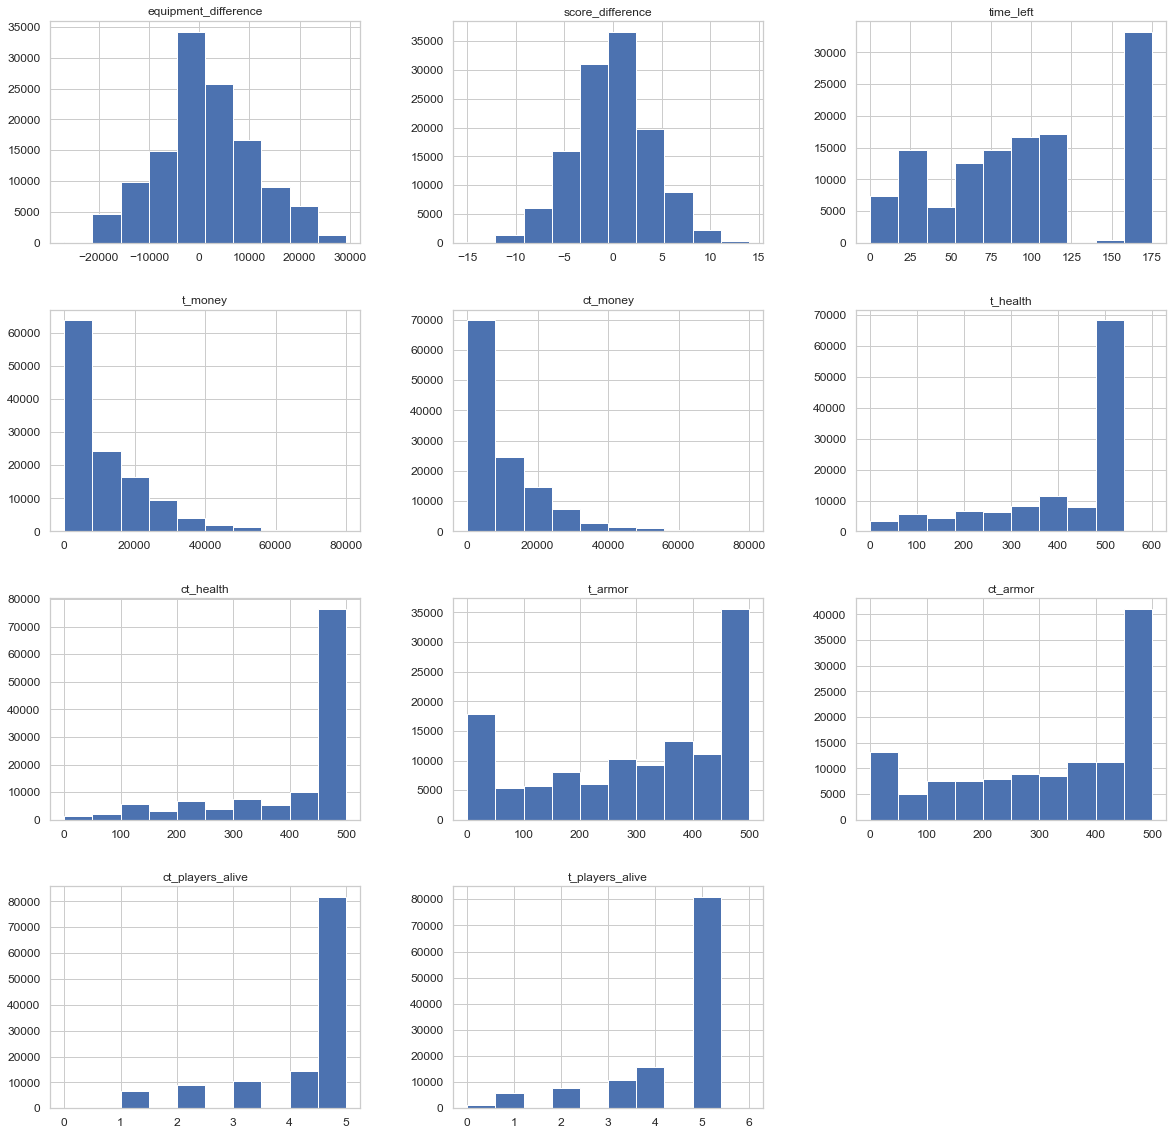

In [ ]:
plt.figure(figsize=(15,15))
ds[['equipment_difference','score_difference','round_winner','time_left','t_money','ct_money','map','t_health','ct_health',
    't_armor','ct_armor','ct_players_alive','t_players_alive']].hist(figsize=(20,20))
plt.show()

Si può notare una distribuzione simil-gaussiana per la differenza di equipaggiamento e score.

## 1.14 Features' importance <a name="1.14"></a>

Tramite un semplice random forest possiamo inoltre verificare in prima persona quali potranno essere gli attributi più importanti del dataset.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.ensemble import RandomForestClassifier
from pandas.api.types import is_numeric_dtype


ds_copy=ds.copy()

for c in ds_copy.columns:
    
    if not(is_numeric_dtype(ds_copy[c])) :
        ds_copy[c] = Encoder_df.fit_transform(ds_copy[c])

ds_x=ds_copy.drop(target_feature,axis=1)
ds_y=ds_copy[target_feature]
X_train, X_test, y_train, y_test = train_test_split(ds_x,ds_y, random_state=42,stratify=ds_y)


rnd_class = RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=42)
rnd_class.fit(X_train,y_train)
y_rnd_pred = rnd_class.predict(X_test)

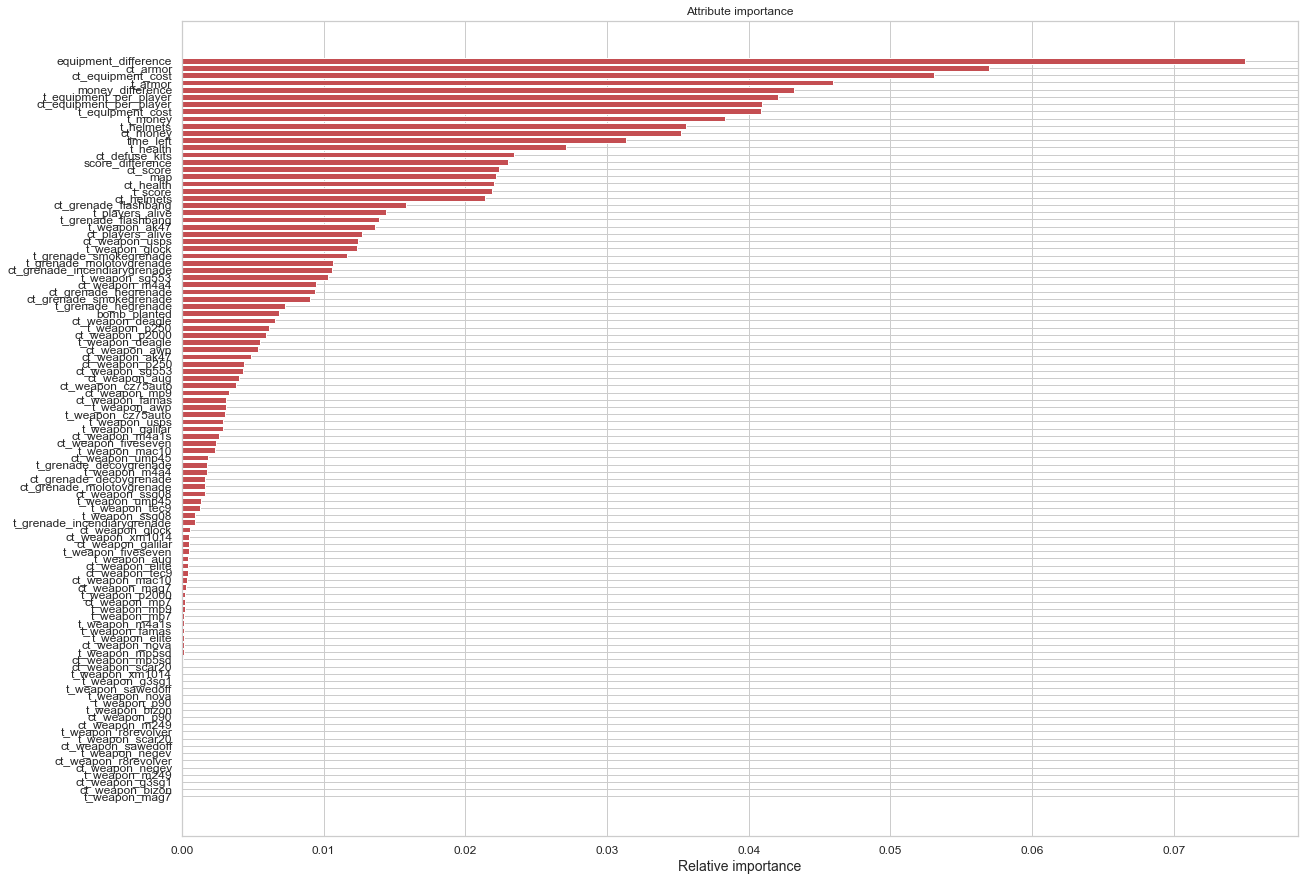

In [16]:
attributes = ds_x.columns
importances = rnd_class.feature_importances_
index = np.argsort(importances)

plt.figure(figsize=(20,15))
plt.title("Attribute importance")
p = plt.barh(range(len(index)), importances[index], color='r', align='center')
plt.yticks(range(len(index)), attributes[index])
plt.xlabel("Relative importance")
plt.show()

Tra le features più importanti evidentemente rientrano aspetti di tipo economico, come la differenza di equipaggiamento, ma anche questione strategiche come la mappa in cui si svolge il round. Anche l'uso di alcune armi pare di grande importanza, soprattutto per ciò che concerne quelle più popolari come l'ak47 o l'm4a4 

In [17]:
threshold=0.0006
valuable_features = np.extract(importances[index]>threshold,attributes[index])
valuable_features

array(['t_grenade_incendiarygrenade', 't_weapon_ssg08', 't_weapon_tec9',
       't_weapon_ump45', 'ct_weapon_ssg08', 'ct_grenade_molotovgrenade',
       'ct_grenade_decoygrenade', 't_weapon_m4a4',
       't_grenade_decoygrenade', 'ct_weapon_ump45', 't_weapon_mac10',
       'ct_weapon_fiveseven', 'ct_weapon_m4a1s', 't_weapon_galilar',
       't_weapon_usps', 't_weapon_cz75auto', 't_weapon_awp',
       'ct_weapon_famas', 'ct_weapon_mp9', 'ct_weapon_cz75auto',
       'ct_weapon_aug', 'ct_weapon_sg553', 'ct_weapon_p250',
       'ct_weapon_ak47', 'ct_weapon_awp', 't_weapon_deagle',
       'ct_weapon_p2000', 't_weapon_p250', 'ct_weapon_deagle',
       'bomb_planted', 't_grenade_hegrenade', 'ct_grenade_smokegrenade',
       'ct_grenade_hegrenade', 'ct_weapon_m4a4', 't_weapon_sg553',
       'ct_grenade_incendiarygrenade', 't_grenade_molotovgrenade',
       't_grenade_smokegrenade', 't_weapon_glock', 'ct_weapon_usps',
       'ct_players_alive', 't_weapon_ak47', 't_grenade_flashbang',
       't_

In [18]:
valuable_features=['t_grenade_incendiarygrenade', 't_weapon_ssg08', 't_weapon_tec9',
       't_weapon_ump45', 'ct_weapon_ssg08', 'ct_grenade_molotovgrenade',
       'ct_grenade_decoygrenade', 't_weapon_m4a4',
       't_grenade_decoygrenade', 'ct_weapon_ump45', 't_weapon_mac10',
       'ct_weapon_fiveseven', 'ct_weapon_m4a1s', 't_weapon_galilar',
       't_weapon_usps', 't_weapon_cz75auto', 't_weapon_awp',
       'ct_weapon_famas', 'ct_weapon_mp9', 'ct_weapon_cz75auto',
       'ct_weapon_aug', 'ct_weapon_sg553', 'ct_weapon_p250',
       'ct_weapon_ak47', 'ct_weapon_awp', 't_weapon_deagle',
       'ct_weapon_p2000', 't_weapon_p250', 'ct_weapon_deagle',
       'bomb_planted', 't_grenade_hegrenade', 'ct_grenade_smokegrenade',
       'ct_grenade_hegrenade', 'ct_weapon_m4a4', 't_weapon_sg553',
       'ct_grenade_incendiarygrenade', 't_grenade_molotovgrenade',
       't_grenade_smokegrenade', 't_weapon_glock', 'ct_weapon_usps',
       'ct_players_alive', 't_weapon_ak47', 't_grenade_flashbang',
       't_players_alive', 'ct_grenade_flashbang', 'ct_helmets', 't_score',
       'ct_health', 'map', 'ct_score', 'score_difference',
       'ct_defuse_kits', 't_health', 'time_left', 'ct_money', 't_helmets',
       't_money', 't_equipment_cost', 'ct_equipment_per_player',
       't_equipment_per_player', 'money_difference', 't_armor',
       'ct_equipment_cost', 'ct_armor', 'equipment_difference',target_feature]

## 1.15 Sintesi <a name="1.15"></a>

Dalla visualizzazione dei dati abbiamo tratto le seguenti conclusioni:
- L'economia all'interno del round è uno dei fattori principali per la predizione del vincitore, abbiamo infatti visto come la percentuale di vittoria delle squadre tenda a cambiare soprattutto quando il loro equipaggiamento è relativamente migliore di quello della squadra avversaria
- Di estrema importanza sono anche i fattori strategici come la mappa, o il possesso di determinate armi, o utilities (le granate)
- Sono state esplorati altri aspetti come: l'uso dei kit di disinnesco, il piazzamento della bomba, il tempo rimanente ecc...
- Sono stati presi in esame i comportamenti frequenti delle squadre, quali differenze sussistono e in che modo queste possano andare a influenzare l'esito del round
- E' stato dato uno sguardo, prima a volo d'aquila, poi più nel dettaglio alle distribuzioni dei dati, per metterne in evidenza dei comportamenti latenti
- E' stata mostrata la matrice di correlazione, andando poi ad indagare le relazioni tra gli attributi al fine di mettere in evidenza legami interessanti
- Sono stati individuati degli outlier, che verranno eliminati nella sezione successiva
- Si è dato uno sguardo alle analisi statistiche effettuate sul dataset
- Sebbene sia stata realizzato nella prima parte del progetto, si è integrato il dataset con i dati relativi ai costi delle armi, ottenendo da ciò ulteriori informazioni sul costo totale dell'equipaggiamento, che come visto nell'uso del random forest pare di particolare importanza


<hr>

# 2. Pre-processing <a name="2."></a>

In questa sezione di procederà alla trasformazione dei dati, in vista del momento in cui dovranno essere introdotti e allenati i classificatori. Sappiamo che parte di tali operazioni è stata già effettuata nei paragrafi precedenti; il dataset è stato infatti arricchito con alcune colonne, ottenute introducendo informazioni esterne (il costo delle armi) oppure combinando features già in nostro possesso (come la differenza di score). Inoltre, per fini di visualizzazione il campo round_winner è stato già codificato (siamo passati dalle label 'CT' e 'T' a 0 e 1 rispettivamente.



Si vanno quindi a definire delle funzioni, al fine di modularizzare questa fase (la funzione per l'eliminazione di features altamente correlate è stata già introdotta nella prima parte del progetto), è possibile infatti adattare tali procedure anche con altri dataset.

In [19]:
def remove_unimportant_features(valuable_features,df):
    to_be_removed=[]
    for c in ds1.columns:
        if(c not in valuable_features):
            to_be_removed.append(c)
    df.drop(columns=to_be_removed,axis=1,inplace=True)

def encode_categorical(ds):
    for c in ds.columns:
        if not(is_numeric_dtype(ds[c])) :
            ds[c] = Encoder_df.fit_transform(ds[c])


Si crea un backup del dataset finora utilizzato; useremo temporaneamente un dataframe sostitutivo "ds1"

In [22]:
ds1=ds.copy()
ds_backup=ds.copy()

Andiamo quindi a dare uno sguardo generale al dataset

In [23]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Columns: 104 entries, time_left to money_difference
dtypes: bool(1), float64(101), object(2)
memory usage: 96.3+ MB


## 2.1 Null values <a name="2.1"></a>

Verifichiamo quanti elementi mancanti vi sono

In [24]:
ds.isnull().sum().sort_values(ascending=False)

time_left                       0
ct_score                        0
ct_weapon_usps                  0
t_weapon_fiveseven              0
ct_weapon_fiveseven             0
t_weapon_deagle                 0
ct_weapon_deagle                0
t_weapon_xm1014                 0
ct_weapon_xm1014                0
t_weapon_ump45                  0
ct_weapon_ump45                 0
t_weapon_ssg08                  0
ct_weapon_ssg08                 0
t_weapon_sg553                  0
ct_weapon_sg553                 0
t_weapon_scar20                 0
ct_weapon_scar20                0
t_weapon_sawedoff               0
ct_weapon_sawedoff              0
t_weapon_r8revolver             0
ct_weapon_r8revolver            0
t_weapon_p90                    0
ct_weapon_p90                   0
t_weapon_nova                   0
ct_weapon_nova                  0
t_weapon_usps                   0
ct_weapon_p250                  0
t_weapon_p250                   0
ct_grenade_molotovgrenade       0
score_differen

Per comprendere meglio il loro impatto, calcoliamo la percentuale di null per ogni colonna

In [ ]:
#ps.set_option("max_columns",None)
ps.DataFrame(ds.isnull().sum()/ds.shape[0]).T

time_left  ct_score  t_score  map  bomb_planted  ct_health  t_health  \
0        0.0       0.0      0.0  0.0           0.0        0.0       0.0   

   ct_armor  t_armor  ct_money  ...  ct_grenade_decoygrenade  \
0       0.0      0.0       0.0  ...                      0.0   

   t_grenade_decoygrenade  round_winner  ct_equipment_cost  t_equipment_cost  \
0                     0.0           0.0                0.0               0.0   

   equipment_difference  ct_equipment_per_player  t_equipment_per_player  \
0                   0.0                      0.0                     0.0   

   score_difference  money_difference  
0               0.0               0.0  

[1 rows x 104 columns]

Non sembrano esserci situazioni eccessivamente gravi, si procede a sostituire i null con il valore medio.

In [25]:
ds1.fillna(ds1.mean(),inplace=True)

## 2.2 Attributi categorici <a name="2.2"></a>

Ai fini del processo di classificazione è necessario convertire gli attributi categorici in numerici 

In [26]:
encode_categorical(ds1)

## 2.3 Outliers <a name="2.3"></a>

Tratteremo adesso la gestione degli outliers. Per come descritto in precedenza, vi erano principalmente due categorie di problemi da analizzare:
- le tuple che presentavano situazioni impossibili in quanto una squadra riusciva a vincere sebbene nessuno del team fosse ancora vivo
- le tuple in cui il numero di armi non era in accordo al numero di giocatori in vita

Mostriamo qui la shape del dataframe per capire quante tuple verranno eliminate durante il processo di ripulitura

In [ ]:
ds1.shape

(122410, 104)

Filtriamo quindi le tuple il cui numero di armi è anomalo. In questo caso, l'uso di una funzione apposita è difficilmente applicabile in quanto il contesto e sin troppo specifico.

In [27]:

ds1=ds1[(ds1[primary_ct].sum(axis=1)<=ds1['ct_players_alive']) &
        (ds1[secondary_ct].sum(axis=1)<=ds1['ct_players_alive']) &
        (ds1[primary_t].sum(axis=1)<=ds1['t_players_alive']) &
        (ds1[secondary_t].sum(axis=1)<=ds1['t_players_alive'])]
ds1.shape

(122284, 104)

Sono state eliminate all'incirca 200 tuple in totale.<br>
Proseguiamo con la seconda tipologia di anomalie.

In [28]:
ds1=ds1.drop(ds1[(ds1['t_players_alive']==0) & (ds1['round_winner']==1) & (ds1['bomb_planted']==False)].index)
ds1=ds1.drop(ds1[(ds1['ct_players_alive']==0) & (ds1['round_winner']==0)].index)

ds1.shape

(122283, 104)

## 2.4 Attributi correlati <a name="2.4"></a>

In questo caso il numero era decisamente inferiore, una sola tupla. <br>

Dopo aver gestito gli outliers, riduciamo il numero di colonne del dataframe eliminando quelle la cui correlazione è troppo elevata. Abbiamo appositamente definito una funzione.

In [29]:
ds1=remove_collinear_features(ds1,0.6)

t_score | ct_score | 0.63
ct_health | time_left | 0.68
ct_health | bomb_planted | 0.62
t_health | time_left | 0.68
t_health | ct_health | 0.76
ct_helmets | ct_armor | 0.69
t_helmets | t_armor | 0.88
ct_defuse_kits | ct_armor | 0.6
ct_defuse_kits | ct_helmets | 0.77
ct_players_alive | time_left | 0.64
ct_players_alive | bomb_planted | 0.62
ct_players_alive | ct_health | 0.97
ct_players_alive | t_health | 0.7
t_players_alive | ct_health | 0.68
t_players_alive | t_health | 0.96
t_players_alive | ct_players_alive | 0.63
t_weapon_ak47 | t_helmets | 0.67
t_weapon_glock | t_health | 0.64
t_weapon_glock | t_players_alive | 0.65
ct_weapon_usps | ct_health | 0.62
ct_weapon_usps | ct_players_alive | 0.62
ct_grenade_flashbang | ct_armor | 0.73
ct_grenade_flashbang | ct_helmets | 0.73
ct_grenade_flashbang | ct_defuse_kits | 0.7
ct_grenade_flashbang | ct_grenade_hegrenade | 0.7
t_grenade_flashbang | t_armor | 0.74
t_grenade_flashbang | t_helmets | 0.77
ct_grenade_smokegrenade | ct_armor | 0.67
ct_gr

In [ ]:
ds1.shape

(122283, 81)

Sono state eliminate una ventina di colonne! <br>


## 2.5 Attributi non importanti <a name="2.5"></a>

Sulla base dell'analisi sulla feature importance realizzata nella sezione precedente, possiamo ora invece eliminare quelle colonne il cui contributo è risultato sin troppo esiguo. Anche qui, utilizzeremo una funzione apposita.

In [30]:
remove_unimportant_features(valuable_features,ds1)
ds1.shape


(122283, 43)

## 2.6 Sintesi <a name="2.6"></a>

Abbiamo quindi preparato il dataset per la fase successiva dedicata all'uso dei modelli di classificazione. I punti toccati durante questa sezione sono stati quindi:
- l'eliminazione di eventuali valori nulli presenti nei dati, sostituiti con la media degli altri elementi sulla colonna di riferimento
- l'encoding degli attributi categorici
- la gestione degli outliers, eliminati per evitare problemi nei modelli
- l'eliminazione delle features eccessivamente correlate
- l'eliminazione delle features "inutili"
- le altre azioni di feature enginnering, comprendenti l'arrichimento del dataset o la combinazione di attributi, sono, come già citato, già state eseguite nelle [sezioni precedenti](#qui0))

Per ciò che invece concerne lo scaling delle features si è preferito gestire questo aspetto nel prosieguo del progetto in modo tale da adattare tale tecnica al particolare classificatore utilizzato.



# 3. Modelli di classificazione <a name="3."></a>

In [31]:
ds_orig=ds.copy()
ds=ds1.copy()

In modo tale da agevolare la valutazione dei modelli, definiamo un metodo che vada a computare le perfomance dei suddetti, basandosi sulla cross validation. Quest'ultima è una tecnica che suddivide il dataset originale in k parti, k-1 adibiti al training, la restante per effetuare il testing; il processo è ripetuto k-volte, permettendo a ciascuna delle parti di comportarsi da testing set. Lo scopo è avere un resoconto delle performance del modello che sia il più accurato possibile, diminuendo il bias che si avrebbe con un semplice train-test split. La procedura ricoprerà un ruolo chiave nel tuning degli iperparametri, dove per iperparametro si intende un parametro del modello che non può essere stimato dall'apprendimento (come il numero di vicini in k-nearest neighbors).

In [32]:
from sklearn.model_selection import cross_val_score

def compute_performance(estimators, X, y, scoring_funs):
    '''
    Compute every score function for each estimator
    
    Parameters:
    ----------
        estimators : a list of predictors
        X : data used for computed the corss_validation_test
        y : target values
        scoring_fun : list of performances measures
    
    Returns:
    --------
        A dictionary containing the score of each estimator
    '''
    score_dict = {}
    for e in estimators:
        score_dict[e.__class__.__name__] = {}
        for f in scoring_funs: 
            scores = cross_val_score(e, X ,y, cv=5 ,scoring=f)
            score = scores.mean()
            score_std = scores.std()
            print("std of " + str(score) + " of type " + str(f) +  " is " + str(score_std))
            score_dict[e.__class__.__name__][f] = score
    
    return score_dict

In tal caso, il k è stato scelto pari a 5 per ottenere un buon compromesso tra valutazione del modello e tempo di esecuzione. Empiricamente, è stato osservato che k = 10 permette di discernere con buoni risultati la bontà di un modello, tuttavia, considerando l'alto numero di record presenti nel dataset, e i modelli (complessi) che verrano addestrati, si è optato per un valore minore. 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import*

ds_x=ds.drop(target_feature,axis=1)
ds_y=ds[target_feature]
X_train, X_test, y_train, y_test = train_test_split(ds_x,ds_y, random_state=42,stratify=ds_y)

scoring_funs = ['accuracy', 'precision', 'recall']


Le tipologie di score che sono state scelte sono le classiche utilizzate nella classificazione. Tralasciando l'accuratezza, a seconda del contesto in cui ci si trova, è lecito preferire una precision alta rispetto alla recall (e viceversa), tuttavia non è il caso nel contesto trattato in tal sede; possiamo assumere che entrambe abbiano la stessa rilevanza.

Allo scopo di presentare una panoramica generale delle tecniche di classificazione proposte nell'ambito del machine learning, le tipologie di modelli che verrano addestrati saranno il più possibile diversificati, evidenziando così punti di forza e debolezza dei suddetti. 

## 3.1 Random forest <a name="3.1"></a>

E' un algoritmo di classificazione basato su un ensemble di alberi decisionali (dove ensemble indica la combinazione di più classificatori); più precisamente, la tipologia di ensemble utilzzato è il bagging, il quale consiste nello scegliere un insieme di campione casuali da un set di dati, con rimpiazzo (i.e. gli oggetti del dataset estratti non vengono rimossi da quest'ultimo). Ciascun campione è costituito da un sottinsieme, sia di righe  che di colonne del dataset originale, con l'obiettivo di costruire degli alberi che siano il meno possibile correlati tra di loro, in modo tale da aumentare il numero di predizione corrette. In presenza di una nuova istanza da classificare, l'assegnazione di un'etichetta di classe avviene come segue : ciascun albero facente parte del random forest effettua la propria predizione; alla fine verrà presa la predizione con il maggior numero di voti tramite un meccanismo di hard voting.

In [34]:
from sklearn.ensemble import RandomForestClassifier

rnd_class = RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=42)
rnd_class.fit(X_train,y_train)
rnd_class_model_scores = compute_performance([rnd_class], X_train, y_train, scoring_funs)

std of 0.868185204015276 of type accuracy is 0.001173804363789565
std of 0.882830341576921 of type precision is 0.0030061596009319205
std of 0.8549677843378479 of type recall is 0.0023849277828769068


Le performance di base sono già ottimali; è probabile che non otterremo di meglio con l'ottimizzazione degli iperparametri. Essendo random forest un insieme di alberi decisionali, gli iperparametri saranno per la maggior parte in comune ai suddetti, con qualche sottile differenza.

In [ ]:
rnd_class._get_param_names()

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

Ad esclusione di n_estimators denotante il numero di alberi della foresta, gli iperparametri sopraillustrati verranno trattati in dettaglio in relazione al [decision tree](#3.5). Per quanto concerne gli iperparametri più significativi, sono i medesimi del decision tree, con l'aggiunta di n_estimators.

In [ ]:
most_important_params = {'max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split', 'n_estimators'}

Una precisazione riguardo il criterio per la valutazione dell'impurità dei nodi : essendo il random forest molto esigente in termini di risorse,verrà utilizzato il gini index per velocizzare la fase di learning. Precisato quest'aspetto, esaminiamo come si comportano le performance del classificatore al variare di ogni iperparametro, fissando i rimanenti.

In [ ]:
def plot_classifier_performance(param_type, param_values, classifier, X_train, y_train, scoring_fun):
    cross_val_scores = np.empty(len(param_values), dtype=float) 
    for i in range(len(param_values)):
        classifier.set_params(**dict({param_type : param_values[i]}))
        classifier.fit(X_train,y_train)
        scores = cross_val_score(classifier, X_train , y_train, cv=4 ,scoring=scoring_fun)
        cross_val_scores[i] = scores.mean()

    plt.figure(figsize=(15,7))
    plt.title(scoring_fun +  " of classifier")
    plt.plot(param_values, cross_val_scores,  color='forestgreen', linewidth = 3, marker='o', markerfacecolor='darkorange', markersize=10)
    plt.xlabel(param_type)
    plt.ylabel('Scores')

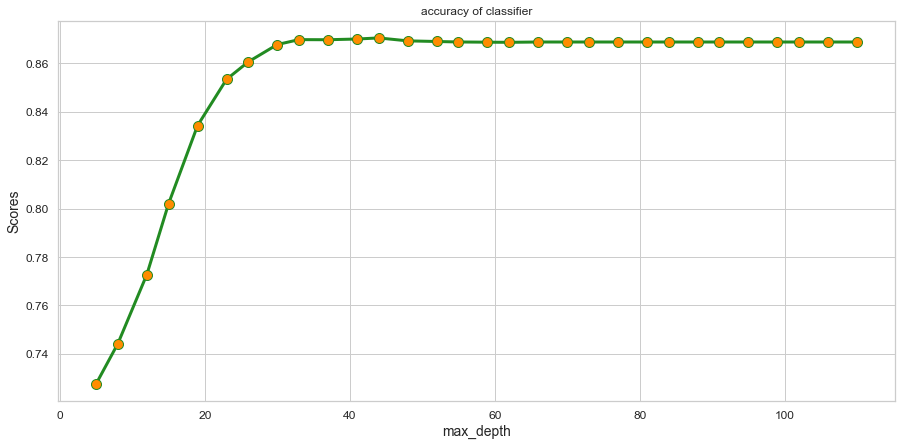

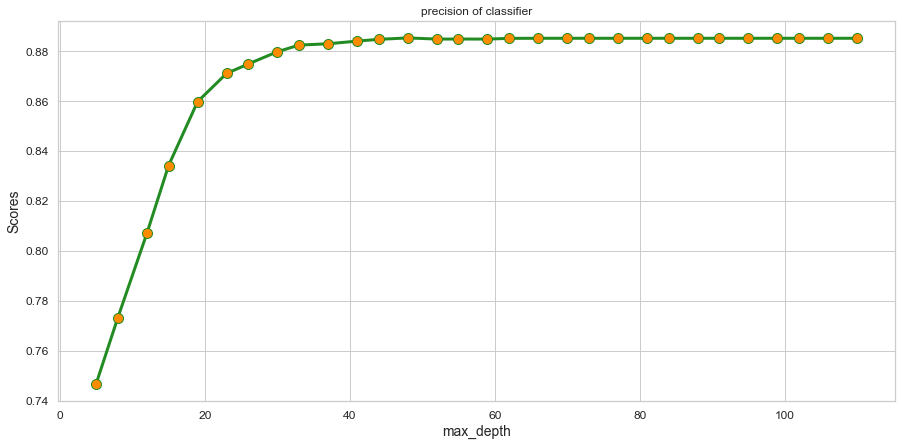

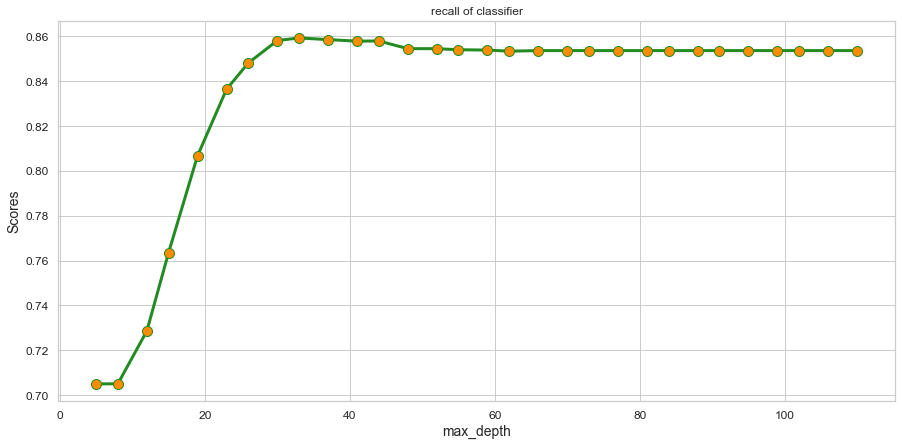

In [ ]:
max_depth_values = [int(x) for x in np.linspace(5, 110, num = 30)]

for fun in scoring_funs:
    plot_classifier_performance('max_depth', max_depth_values, RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=42), X_train, y_train, fun)

Come si envice dai grafici, gli andamenti delle diverse tipologie di score sono pressochè simili, assestandosi per valori di max_depth > 60. Notiamo inoltre che per valori inferiori a 20 del parametro, le differenze sono più accentuate. E' imperativo scegliere un valore che non renda banale il modello, e, al contempo, troppo complesso (si rischia di andare in overfitting). Un valore ottimale sembrerebbe essere max_depth = 37.

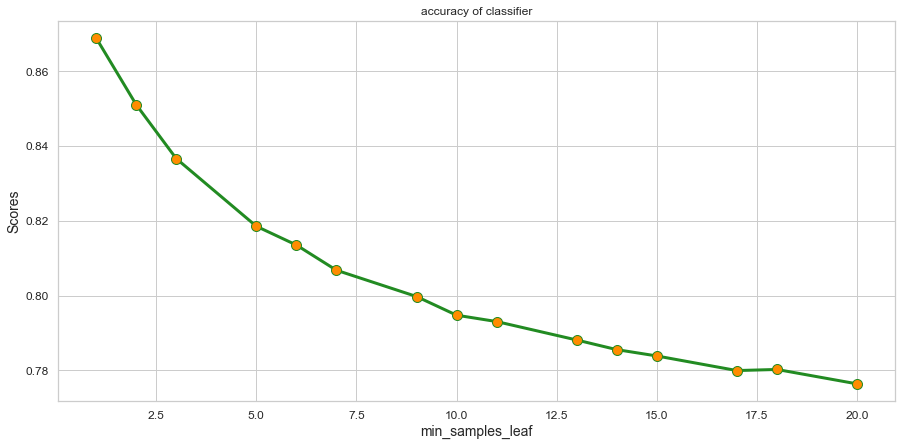

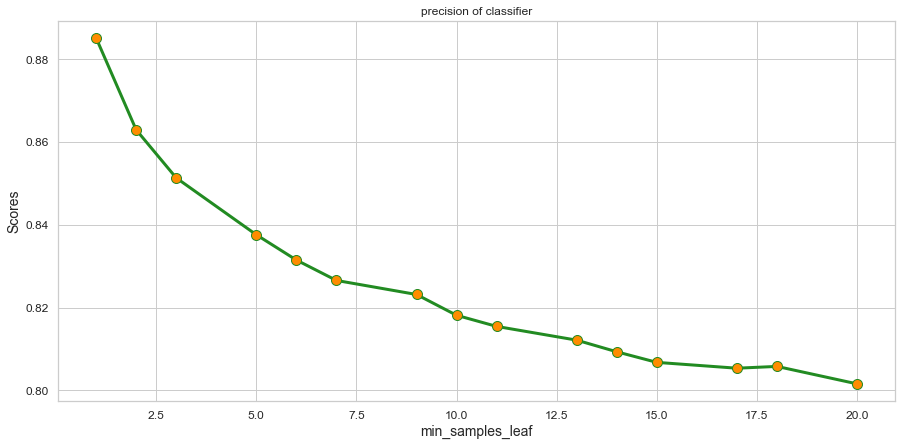

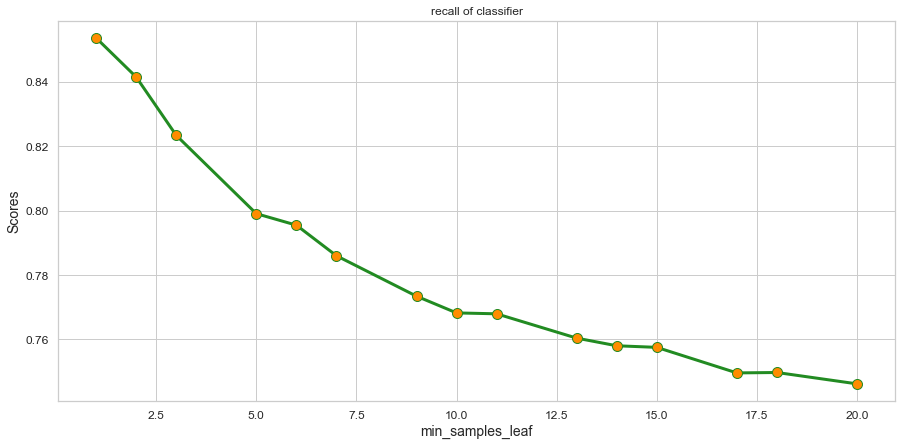

In [ ]:
min_samples_leaf_values = [int(x) for x in np.linspace(1, 20, num = 15)]
for fun in scoring_funs:
    plot_classifier_performance('min_samples_leaf', min_samples_leaf_values, RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=42), X_train, y_train, fun)

I tre grafici pongono in esame una caso molto particolare, i.e. gli score decrescono esponenzialmente; sembrerebbe essere un fenomeno di underfitting (i.e. il modello diventa troppo banale), ciò avviene poiché stiamo limitando la crescita in profondita' dell'albero. Il valore ottimo appar essere in un intorno di 1.

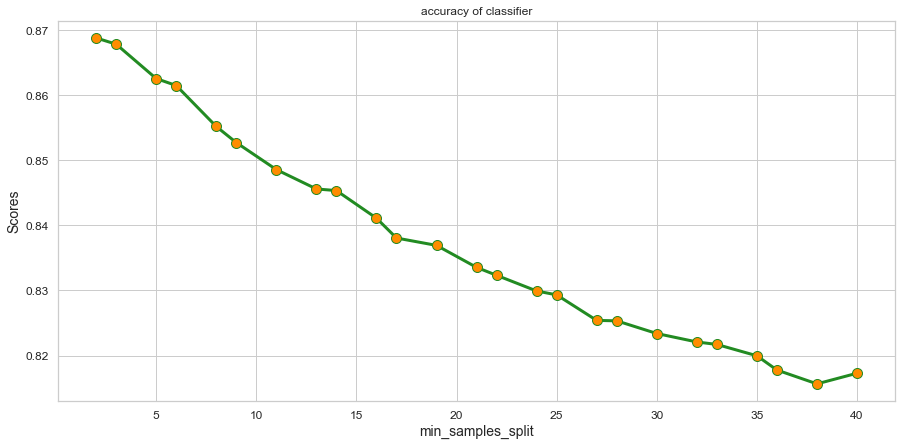

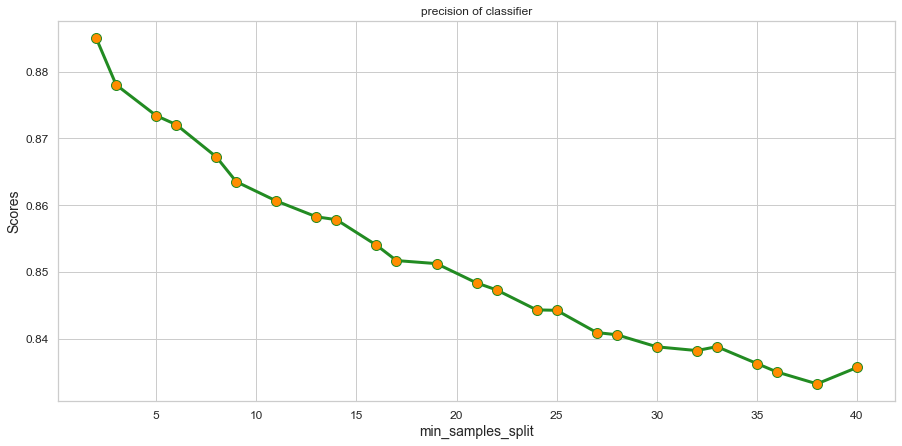

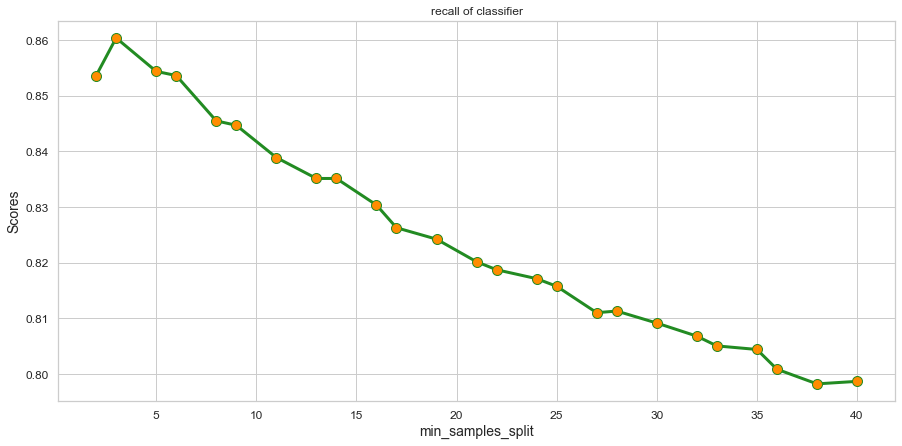

In [ ]:
min_samples_split_values = [int(x) for x in np.linspace(2, 40, num = 25)]
for fun in scoring_funs:
    plot_classifier_performance('min_samples_split', min_samples_split_values, RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=42), X_train, y_train, fun)

La situazione è analoga al caso precedente. E' molto probabile che di questo passo non vi sarà bisogno di una fase di tuning. I valori di default degli iperparametri sembrerebbero la soluzione ottimale.

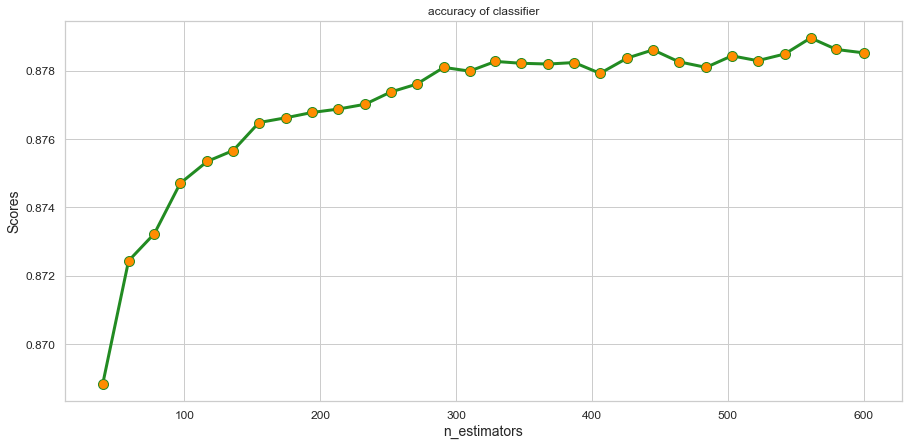

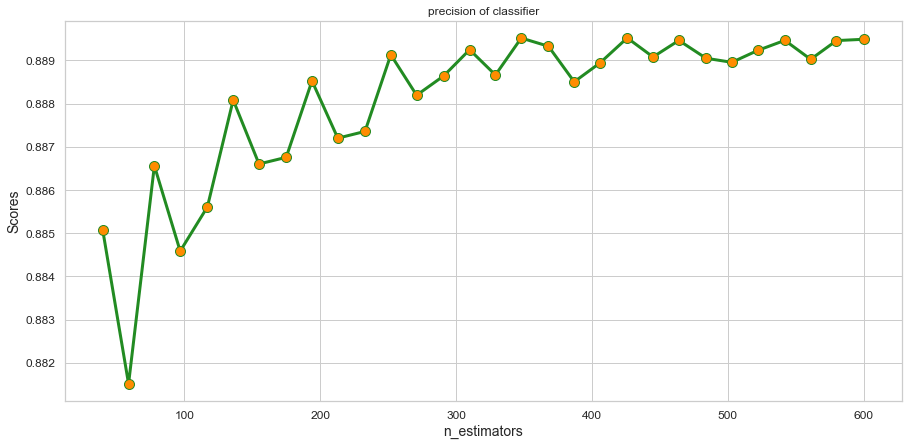

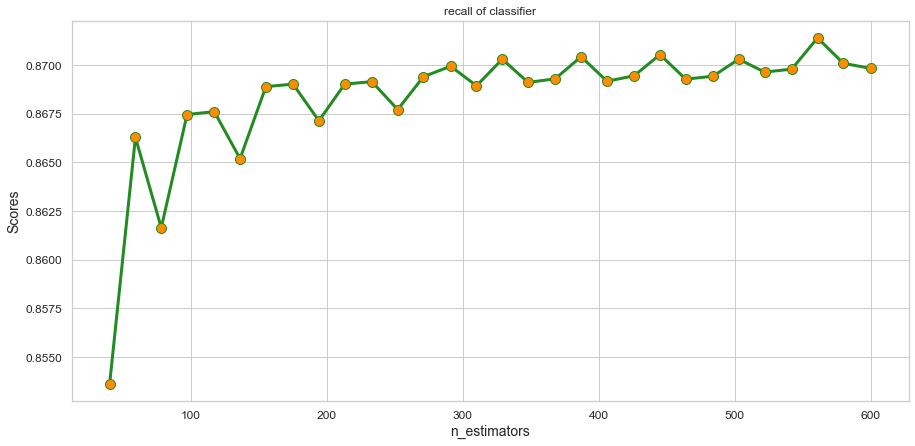

In [ ]:
n_estimators_values = [int(x) for x in np.linspace(40, 600, num = 30)]
for fun in scoring_funs:
    plot_classifier_performance('n_estimators', n_estimators_values, RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=42), X_train, y_train, fun)

La situazione è alquanto interessante. L'accuracy sembra avere un andamento abbastanza stabile. Precision e recall dimostrano un andamento "ballerino", entrambi esibenti svariati picchi. Sebbene non sia stato possibile eseguire simulazioni per valori superiori a 600, causa la limitatezza delle risorse hardware, è possibile inferire dall'andamento degli ultimi due grafici che vi sarà una sorta di convergenza. 

Considerando che le differenze prestazionali sono mantenute al minimo al crescere dell'iperparametro (ergo trascurabili), conviene scegliere un intervallo di variazione di n_estimators che permetta di velocizzare i tempi di apprendimento; l'intervallo [100, 200] sembra ragionevole. 

In [95]:
random_forest_grid = {'n_estimators': [int(x) for x in np.linspace(start = 110, stop = 200, num = 20)],
               'max_features':['sqrt', 'log2', None],
               'max_depth': [37],
               'bootstrap': [True]}
print(random_forest_grid)

{'n_estimators': [110, 114, 119, 124, 128, 133, 138, 143, 147, 152, 157, 162, 166, 171, 176, 181, 185, 190, 195, 200], 'max_features': ['sqrt', 'log2', None], 'max_depth': [37], 'bootstrap': [True]}


min_samples_split e min_samples_leaf sono stati lasciati ai valori default essendo ottimali. Per quanto concerne la scelta degli algoritmi di ricerca dei valori ottimali degli iperparametri, le strade individuate sono due :

1. GridSearchCV : costruisce una griglia di iperparametri, associando ad ogni dimensione un iperparametro. Il comportamento dell'algoritmo è come segue : per ogni possibile combinazione dei valori degli iperparametri, viene istanziato un modello, con iperparametri impostati secondo la combinazione scelta nell'iterazione, che sarà sottoposto a k-fold cross validation. Terminato lo spazio di esplorazione delle combinazioni, verrà scelta la combinazione che ha portato agli score piu' alti.
2. RandomSearchCV : a differenza dell'algoritmo precedente, il numero di combinazioni provate (selezionate randomicamente) e' ristretto a un valore arbitrario. 

Essendo il numero di combinazioni non elevato ($20 \cdot 3 \cdot 1 \cdot 1 = 60$), GridSearchCV appare essere una scelta razionale. 

In [96]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

rnd_forest_class = RandomForestClassifier(n_estimators=40, n_jobs=-1, random_state=42)
rnd_forest_grid_search = GridSearchCV(rnd_forest_class, random_forest_grid, verbose=3, cv=5)
rnd_forest_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END bootstrap=True, max_depth=37, max_features=sqrt, n_estimators=110;, score=0.875 total time=   4.2s
[CV 2/5] END bootstrap=True, max_depth=37, max_features=sqrt, n_estimators=110;, score=0.876 total time=   2.1s
[CV 3/5] END bootstrap=True, max_depth=37, max_features=sqrt, n_estimators=110;, score=0.879 total time=   2.4s
[CV 4/5] END bootstrap=True, max_depth=37, max_features=sqrt, n_estimators=110;, score=0.876 total time=   2.2s
[CV 5/5] END bootstrap=True, max_depth=37, max_features=sqrt, n_estimators=110;, score=0.873 total time=   2.1s
[CV 1/5] END bootstrap=True, max_depth=37, max_features=sqrt, n_estimators=114;, score=0.874 total time=   2.2s
[CV 2/5] END bootstrap=True, max_depth=37, max_features=sqrt, n_estimators=114;, score=0.876 total time=   2.2s
[CV 3/5] END bootstrap=True, max_depth=37, max_features=sqrt, n_estimators=114;, score=0.879 total time=   2.3s
[CV 4/5] END bootstrap=True, max_depth=37,

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=40, n_jobs=-1,
                                              random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [37],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [110, 114, 119, 124, 128, 133, 138,
                                          143, 147, 152, 157, 162, 166, 171,
                                          176, 181, 185, 190, 195, 200]},
             verbose=3)

In [ ]:
rnd_forest_grid_search.best_params_

In [35]:
rnd_forest_best_params = {'bootstrap': True,
 'max_depth': 37,
 'max_features': 'log2',
 'n_estimators': 185}

In [36]:
rnd_forest_class_optimized = RandomForestClassifier()
rnd_forest_class_optimized.set_params(**rnd_forest_best_params)
rnd_forest_class_optimized.fit(X_train, y_train)
optimized_model_scores = compute_performance([rnd_forest_class_optimized], X_train, y_train, scoring_funs)
optimized_model_scores

std of 0.8790562133376095 of type accuracy is 0.0022438730662561975
std of 0.8897185583233449 of type precision is 0.003440010361054205
std of 0.8722254251253719 of type recall is 0.003255606017052361


{'RandomForestClassifier': {'accuracy': 0.8790562133376095,
  'precision': 0.8897185583233449,
  'recall': 0.8722254251253719}}

Com'era plausibile aspettarsi, gli incrementi si dimostrani abbastanza marginali; probabilmente non è possibile ottenere di meglio in tale contesto.

## 3.2 K-neighbors <a name="3.2"></a>

K-nearest neighbors è un algoritmo di classificazione supervisionato, il cui funzionamento è basato sulle carattistiche degli oggetti vicini a quello considerato. Data un'istanza da classificare, si individuano i k oggetti più vicini ad essa (mediante il calcolo delle distanze tra gli oggetti e quella presa in esame), seguita dalla classificazione della stessa, attribuendole l'etichetta più comune tra i k vicini. Siccome dovranno essere computate delle distanze, affinchè non vi siano valori delle feature che prevalgano nel calcolo (dati i diversi intervalli di variazione di ciascuna), è fondamentale eseguire la normalizzazione. La funzione di normalizzazione utilizzata è la min-max, di espressione

                                                                        
$$ x_{normalized} = {x - x_{min} \over x_{max} - x_{min} },\; x_{normalized} ∈ [0,1] $$
                                                                                     
$ x_{min} $ : il minimo valore assunto dalla feature x <br>
$ x_{max} $: il massimo valore assunto dalla feature x 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_X_train = DataFrame(scaler.fit_transform(X_train))
normalized_X_test = DataFrame(scaler.fit_transform(X_test)) 

knn_class = KNeighborsClassifier()
knn_class.fit(normalized_X_train,y_train)

knn_model_scores = compute_performance([knn_class], normalized_X_train, y_train, scoring_funs)
knn_model_scores

std of 0.8080076694090099 of type accuracy is 0.0032572972818018854
std of 0.8159817880726539 of type precision is 0.003933014713523534
std of 0.8050125269157429 of type recall is 0.003270098784866818


{'KNeighborsClassifier': {'accuracy': 0.8080076694090099,
  'precision': 0.8159817880726539,
  'recall': 0.8050125269157429}}

Gli score di partenza sembrano già promettenti. Passiamo all'identificazione degli iperparametri 

In [ ]:
knn_class.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Descrizioni : 
    
- algorithm : è l'algoritmo utilizzato per il calcolo dei vicini (ne sono stati proposti diversi in letteratura).
- leaf_size : dimensione della foglia; viene passata a BallTree o KDTree (entrambi algoritmi utilizzati per il calcolo dei vicini). Ciò può influire sulla velocità di costruzione delle query, nonché sulla memoria richiesta per archiviare l'albero. Il valore ottimale dipende dalla natura del problema.
- metric : la metrica utilizzata per calcolare le distanze (manhattan, eculidea, minkowski etc.).
- n_neighbors : il numero di vicini.
- p : corrisponde alla potenza p nella distanza di mikowski.
- weights : funzione di peso utilizzata nella predizione. Quelle che verrano prese in considerazione saranno uniform, che assegna a ciascun oggetto del training set lo stesso peso, e distance, associante agli oggetti  un peso pari a 1/D(xi,x), dove D è una metrica, xi l'oggetto i-esimo appartente al training set, ed x l'istanza da classificare. E' quindi chiaro che agli oggetti più vicini sarà dato un peso maggiore. 

In [ ]:
knn_most_important_params = {'n_neighbors', 'weights'}

La scelta degli iperparametri è stata guidata dalle seguenti supposizioni :

1. algorithm verrà messo ad auto, lasciando decidere al sistema quale tra le diverse implementazione di knn sia necessaria (ciò per ridurre il numero di combinazioni da provare). 
2. La metrica utilizzata sarà quella di manhanttan, perchè è computazionalmente meno costosa da calcolare rispetto alla distanza euclidea e a quella di minkowksi, soprattutto in presenza di alta dimensionalità dei dati. 

Osservando gli iperparametri, senza dubbio, il numero di vicini è quello più importante, essendo alla base dell'algoritmo. Per tale motivo, è utile graficare l'andamento delle metriche di classificazione al suo variare, tuttavia, è imperativo scegliere prima il numero di valori che dovrà assumere. Poichè il dataset esaminato in questo elaborato è di dimensioni elevate, e considerando che l'algoritmo  impiegherà svariate risorse di calcolo, è ragionevole far assumere all'iperparametro una 20ina di valori differenti, al fine di avere un andamento qualitativo delle performance del modello.

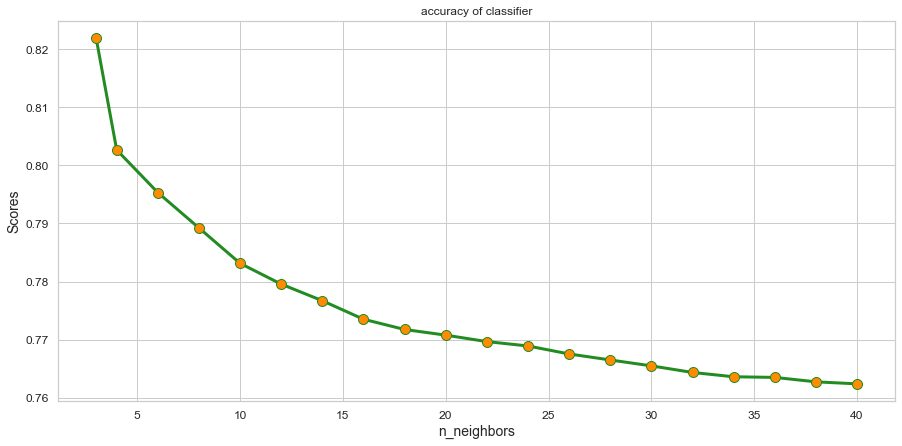

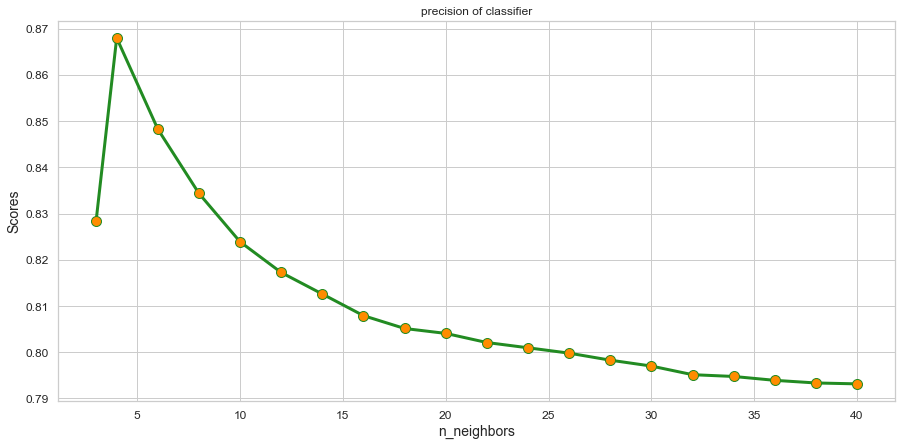

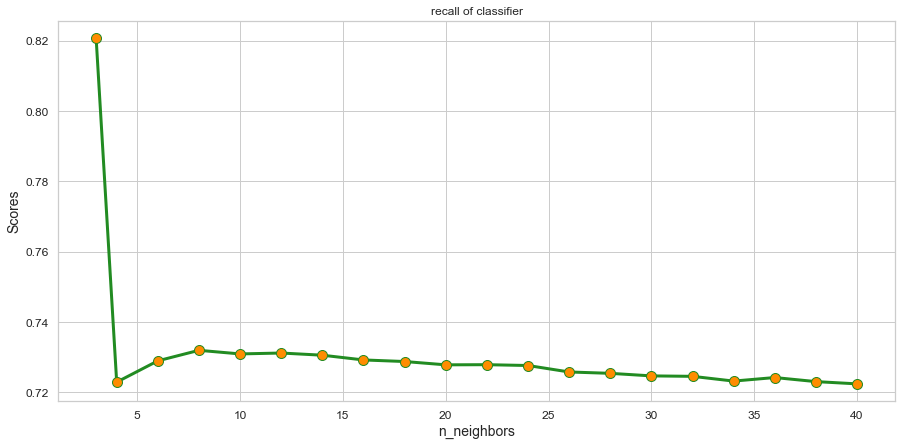

In [ ]:
n_neighbors = [int(x) for x in np.linspace(3, 40, num = 20)]
knn_class = KNeighborsClassifier()
for fun in scoring_funs:
    plot_classifier_performance('n_neighbors', n_neighbors, knn_class, normalized_X_train, y_train, fun)

A quanto pare un alto numero di vicini non fa che peggiorare le performance. Tutti e 3 i grafici sono accomunati da uno spike abbastanza evidenziato, in corrispondenza di n_neighbors = 3, che, sembrerebbe il valore ottimo (coincide inoltre con il valore di default). Avere n_neighbors così basso è una situazione migliore di quello che ci aspettavamo; abbiamo ridotto al minimo il tempo necessario per il learning, ottenendo al contempo performance ottimali.

In [ ]:
knn_grid_params = { 'n_neighbors' : [3],
               'weights' : ['uniform','distance'],
               'metric' : ['manhattan']}

knn_grid_params

{'n_neighbors': [3],
 'weights': ['uniform', 'distance'],
 'metric': ['manhattan']}

Come illustrato dai grafici precedenti, sarebbe insensato far variare n_neighbors in un range di valori, avendone già trovato il valore ottimale. La metrica è stata fissata a quella di manhattan come precedentemente discusso; resta quindi far variare la tipologia di funzione peso. Possiamo anche questa volta far uso di GridSearch, poichè il numero di combinazioni è ridotto al minimo.

In [ ]:
knn_class_optimized = KNeighborsClassifier(n_jobs=-1)
grid_search_knn = GridSearchCV(knn_class_optimized, knn_grid_params, cv = 5, verbose=3)
grid_search_knn.fit(normalized_X_train,y_train)
grid_search_knn.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END metric=manhattan, n_neighbors=3, weights=uniform;, score=0.856 total time= 1.2min
[CV 2/5] END metric=manhattan, n_neighbors=3, weights=uniform;, score=0.852 total time= 1.2min
[CV 3/5] END metric=manhattan, n_neighbors=3, weights=uniform;, score=0.855 total time= 1.3min
[CV 4/5] END metric=manhattan, n_neighbors=3, weights=uniform;, score=0.860 total time= 1.2min
[CV 5/5] END metric=manhattan, n_neighbors=3, weights=uniform;, score=0.853 total time= 1.3min
[CV 1/5] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.877 total time= 1.3min
[CV 2/5] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.877 total time= 1.2min
[CV 3/5] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.878 total time= 1.2min
[CV 4/5] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.882 total time= 1.2min
[CV 5/5] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.875 tota

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [38]:
knn_best_params = {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [39]:
knn_class_optimized = KNeighborsClassifier(n_jobs=-1)
knn_class_optimized.set_params(**knn_best_params)
knn_class_optimized.fit(normalized_X_train, y_train)
knn_optimized_model_scores = compute_performance([knn_class_optimized], normalized_X_train, y_train, scoring_funs)
knn_optimized_model_scores

std of 0.875567009592878 of type accuracy is 0.002071155888143453
std of 0.8822105179010832 of type precision is 0.0043262493771545766
std of 0.8724819060996699 of type recall is 0.0037521929169129667


{'KNeighborsClassifier': {'accuracy': 0.875567009592878,
  'precision': 0.8822105179010832,
  'recall': 0.8724819060996699}}

L'incremento di performance è di circa un 13% complessivo; sebbene gli score di partenza erano già posizionati in una fascia ottimale. 

## 3.3 SGD <a name="2.3"></a>

Se visto per la prima volta, si potrebbe pensare che questo classificatore sia un modello con una logica di fondo del tutto differente rispetto a quelli presentati in letteratura; non è tuttavia il caso. SGD non fa altro che prendere classificatori lineari (come la regressione logistica, support vector machine etc.) ed addestrarli minimizzando la funzione obiettivo tramite la discesa del gradiente stocastico. L'appellativo "stocastico" deriva dal seguente fatto : in contrapposizione al metodo di discesa del gradiente che ottimizza la loss function prendendo in considerazione l'intero dataset, SGD seleziona in modo random un'istanza del dataset (che potrebbe essere anche un outlier) in base al quale ottimizzare la loss function, risultando così in un algoritmo nettamente più veloce rispetto all'originale, ma con una velocità di convergenza inferiore.    

Antecedente al calcolo delle performance di base del classificatore, è di fondamentale importanza standardizzare l'intero dataset, essendo l'algoritmo di discesa del gradiente sensibile a feature che variano in intervalli differenti (la non standardizzazione risulterebbe in un learning rate troppo basso per alcune e troppo alto per le rimanenti). La standardizzazione esibisce la seguente espressione analitica

$$ z = {(x - u) \over s}$$

$u$ : media   dei valori della feature <br>
$s$ : varianza della feature

In [40]:
standard_scaler = StandardScaler()

scaled_X_train = DataFrame(standard_scaler.fit_transform(X_train))
scaled_X_test = DataFrame(standard_scaler.fit_transform(X_test))

In [41]:
from sklearn.calibration import CalibratedClassifierCV

sgd_class = SGDClassifier(n_jobs=-1)
sgd_class_with_proba = CalibratedClassifierCV(sgd_class)
sgd_clf = sgd_class_with_proba.fit(scaled_X_train, y_train)
clf_model_scores = compute_performance([sgd_clf], scaled_X_train, y_train, scoring_funs)

std of 0.7400122882838598 of type accuracy is 0.0039955718967190895
std of 0.7482556335081396 of type precision is 0.005507310656809974
std of 0.7342714884873378 of type recall is 0.00790427150417793


Se comparati agli score precedenti, i sopracitati si collocano nella fascia più bassa vista finora. Sebbene non siano ottimali, sono comunque sufficienti per avere una base su cui lavorare per l'eventuale miglioramento.

In [ ]:
sgd_clf.get_params()

{'base_estimator__alpha': 0.0001,
 'base_estimator__average': False,
 'base_estimator__class_weight': None,
 'base_estimator__early_stopping': False,
 'base_estimator__epsilon': 0.1,
 'base_estimator__eta0': 0.0,
 'base_estimator__fit_intercept': True,
 'base_estimator__l1_ratio': 0.15,
 'base_estimator__learning_rate': 'optimal',
 'base_estimator__loss': 'hinge',
 'base_estimator__max_iter': 1000,
 'base_estimator__n_iter_no_change': 5,
 'base_estimator__n_jobs': -1,
 'base_estimator__penalty': 'l2',
 'base_estimator__power_t': 0.5,
 'base_estimator__random_state': None,
 'base_estimator__shuffle': True,
 'base_estimator__tol': 0.001,
 'base_estimator__validation_fraction': 0.1,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': SGDClassifier(n_jobs=-1),
 'cv': None,
 'ensemble': True,
 'method': 'sigmoid',
 'n_jobs': None}

La vasta quantità di iperparametri aggiunge un non indifferente grado di difficoltà alla fase di tuning; questo perchè bisogna discernere quali siano significativi ai fini dell'aumento delle performance del modello. In seguito ad un'attenta riflessione, sono estratti i seguenti :

- loss : è la funzione obiettivo che verrà ottimizzata. Diverse funzioni corrispondo a classificatori lineari differenti.

- penalty : il termine di regolarizzazione da utilizzare.

- alpha : Costante che moltiplica il termine di regolarizzazione. Più alto è il valore, più forte sarà la regolarizzazione.

- fit_intercept : stabilisce se l'intercetta debba essere stimata o meno.

- max_iter : determina il massimo numero di epoche (cioè quante volte dovrà iterare sull'intero training set).

- learning_rate : stabilisce la dimensione del passo nell'algoritmo.

- early_stopping : Stabilisce se terminare prima l'algoritmo nel caso in cui lo score di validazione non aumenti. 

Il parametro loss verrà lasciato al valore di default, corrispondente alla funzione obiettivo utilizzata nelle SVM, così come la penalità (che è il valore standard per modelli basati su SVM).

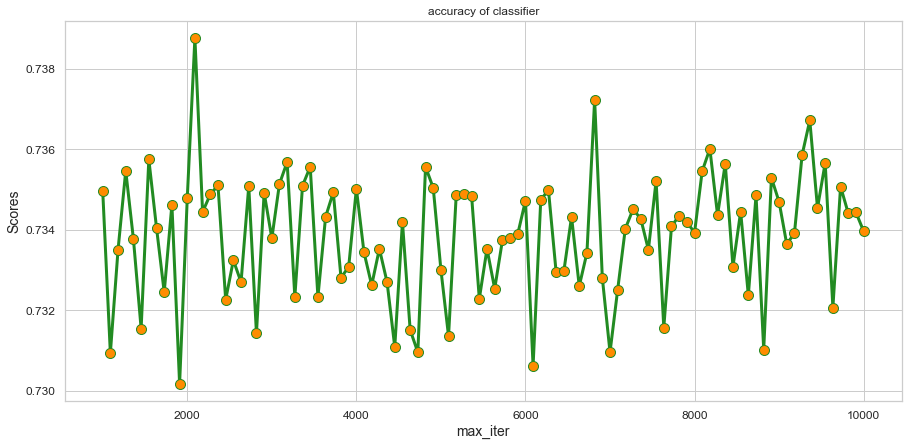

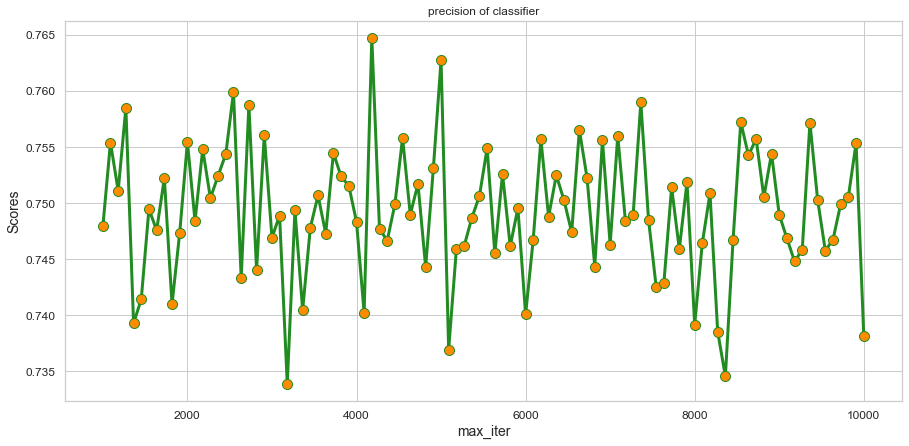

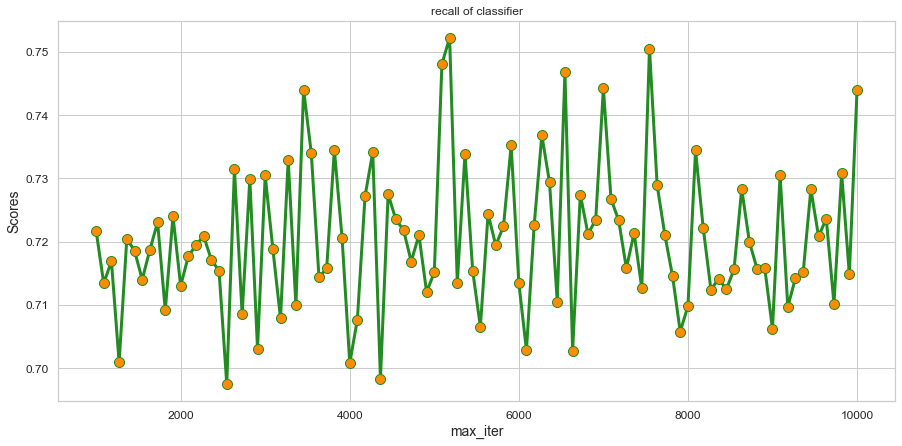

In [ ]:
max_iter_values = [int(x) for x in np.linspace(1000, 10000, num = 100)]
sgd_class = SGDClassifier(n_jobs=-1)
for fun in scoring_funs:
    plot_classifier_performance('max_iter', max_iter_values, sgd_class, scaled_X_train, y_train, fun)

L'andamento oscillatorio e' caratteristico della discesa del gradiente stocastico, infatti, poiche' l'istanza viene scelta randomicamente ad ogni iterazione, l'errore di classificazione prodotto potrebbe essere piu' alto/basso a seconda della scelta l'andamento altalenante illustrato nei grafici e' pertanto giustificato.

In [79]:
sgd_grid_params = { 'fit_intercept' : [True,False],
                'tol': [1e-3, 1e-2, 1e-1],
               'max_iter' : [int(x) for x in np.linspace(1000, 10000, num = 50)],
               'learning_rate': ['optimal'],
               'early_stopping': [True,False]}

In [80]:
sgd_class_optimized = SGDClassifier(n_jobs=-1)
grid_search_sgd = GridSearchCV(sgd_class_optimized, sgd_grid_params, cv = 5, verbose=0)
grid_search_sgd.fit(scaled_X_train,y_train)
grid_search_sgd.best_params_

{'early_stopping': False,
 'fit_intercept': False,
 'learning_rate': 'optimal',
 'max_iter': 5408,
 'tol': 0.001}

In [ ]:
sgd_best_params = {'early_stopping': False,
 'fit_intercept': True,
 'learning_rate': 'optimal',
 'max_iter': 6326,
 'tol': 0.001}

In [ ]:
sgd_class_optimized = SGDClassifier()
sgd_class_optimized.set_params(**sgd_best_params)
sgd_class_optimized.fit(scaled_X_train, y_train)
sgd_optimized_model_scores = compute_performance([sgd_class_optimized], scaled_X_train, y_train, scoring_funs)
sgd_optimized_model_scores

std of 0.7301117120551412 of type accuracy is 0.003578064807562518
std of 0.7479043176530001 of type precision is 0.012370364983610422
std of 0.7220620259991692 of type recall is 0.033486218327244896


{'SGDClassifier': {'accuracy': 0.7301117120551412,
  'precision': 0.7479043176530001,
  'recall': 0.7220620259991692}}

Le performance sono sensibilmente peggiorate se confrontate con quelle del modello di partenza. E' incerto se un'analisi su sottoinsieme più ampio degli iperparametri (rispetto a quelli scelti antecedentemente) possa portare dei miglioramenti. 

## 3.4 Naive bayes <a name="3.4"></a>

E' una tipologia di classificatore probabilistico che fa uso del teorema di Bayes, assumendo una forte indipendenza tra le features (per tale motivo assume l'appellativo di "naive"). Il teorema di Bayes afferma che la probabilità condizionale P(Y | X), cioè la probabilità che avvenga Y  a patto che X si sia già verificato è data da :

                                                                                        
$$P(Y | X) = {P(X | Y) P(Y) \over P(X) } $$                                         
dove

- P(X | Y) è la probabilità che un'istanza abbia X come vettore di feature, a patto che abbia Y come etichetta di classe.
- P(Y) è la probabilità che un'istanza abbia come etichetta di classe Y
- p(X) è la probabilità che un'istanza abbia X come vettore di feature.

Sia P(Y) che P(X) possono essere stimate a partire dal dataset. Per quanto riguarda P(X | Y), in caso di forte indipendenza tra le variabili, il calcolo si traduce nel nella seguente produttoria

$$ P(X_1,..,X_d | Y) = P(X_1 | Y) P(X_2 | Y) ... P(X_d | Y) $$ 
                                                                            
La nuova istanza sarà classificata come Y se la probabilità sopraillustrata è massima. Il problema tuttavia è capire come stimare tale valore. Se i dati fossero stati categorici avremmo potuto stimare la probabilità condizionata per ogni valore, ma dato che alcuni dei valori sono continui, bisogna procedere per altre vie, che sono le seguenti :

1. Discretizzazione degli attributi continui tramite l'introduzione di intervalli.
2. Associare all’attributo una funzione di densità e stimare i parametri della funzione dal training set. Più precisamente si assume che che i valori dell’attributo seguano una distribuzione normale. Dal training set verrano stimati media e varianza di quest'ultimo per poi calcolare $P(X_i|Y)$. 

Il primo approccio è stato realizzato supponendo che gli attributi seguano una distribuzione normale (consci di quanto appreso in fase di esplorazione sulle distribuzioni degli attributi, tale ipotesi non è molto forte)

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [43]:
gnb_class = GaussianNB()
gnb_class.fit(X_train,y_train)
gnb_class_model_scores = compute_performance([gnb_class], X_train, y_train, scoring_funs)

std of 0.7139306093893942 of type accuracy is 0.004518283952704165
std of 0.722655239832979 of type precision is 0.0054532880487088535
std of 0.7123948053245132 of type recall is 0.005048686512961746


I risultati sono decisamente inferiori rispetto a quanto ottenuto con gli altri classificatori. Proviamo a utilizzare la prima soluzione, la quale richiedeva la discretizzazione gli attributi. <br>
Un problema da valutare è che non siamo a conoscenza del numero di bin in cui suddividere gli intervalli. <br>
Come prima cosa sono stati identificati gli attributi da discretizzare ("to_discretize"), dopodiché si è andati alla ricerca del numero di bin ottimali, effettuando un'indagine random sullo spazio di ricerca (una ricerca approfondita avrebbe richiesto troppe risorse computazionali e temporali). I risultati della ricerca casuale sono stati poi modificati singolarmente sulla base dell'intorno nel quale erano definiti. <br>
La funzione utilizzata per questo procedimento è la "cut" di pandas. Sono state prese in considerazione altre soluzioni, come KBinsDiscretizer o qcut, tuttavia, cut ha mostrato, in questo contesto, le performance migliori.

In [44]:
to_discretize=['time_left', 'ct_score', 'ct_armor', 't_armor',
              'ct_money', 't_money','score_difference']
bins={'ct_armor': {'bins': 154},
 'ct_money': {'bins': 83},
 'ct_score': {'bins': 27},
 'score_difference': {'bins': 165},
 't_armor': {'bins': 154},
 't_money': {'bins': 112},
 'time_left': {'bins': 55}}

In [52]:
discretized_X_train = X_train.copy()
discretized_X_test = X_test.copy()
for c in to_discretize:
  n_bins=bins[c]['bins']
  discretized_X_train[c]=ps.cut(discretized_X_train[c],n_bins)
  discretized_X_test[c]=ps.cut(discretized_X_test[c],n_bins)

encode_categorical(discretized_X_train)
encode_categorical(discretized_X_test)

mnb_class = MultinomialNB()
mnb_class.fit(discretized_X_train,y_train)
mnb_class_model_scores = compute_performance([mnb_class], discretized_X_train, y_train, scoring_funs)

std of 0.7403938969272057 of type accuracy is 0.00341010544850502
std of 0.7426102007589231 of type precision is 0.0045086085004749496
std of 0.7512724150757611 of type recall is 0.0021329984114494675


Notiamo un deciso miglioramento rispetto al primo approccio, sebbene le prestazioni, in generale, rimangano al di sotto degli altri classificatori, a eccezione di SGD.<br><br>

Poichè il classificatore non ha iperparametri da ottimizzare, le performance rimangono le sopraillustrate. 

## 3.5 Decision tree <a name="3.5"></a>

L'albero decisionale è una tecnica di classificazione supervisionata. L'obiettivo di tale tecnica è creare un modello di addestramento che possa essere utilizzato per prevedere la classe o il valore della variabile target apprendendo semplici regole decisionali dedotte dal training set. L'albero è così strutturato :

- I nodi interni denotano degli attributi
- I nodi foglia rappresentano i possibili valori dell’attributo di classe.
- Le etichette associate agli archi denotano possibili valori degli attributi dal nodo dal quale dipartono. 

Nella comunità del machine learning, nonostante siano state proposte diverse tipologie di algoritmi di learning per la costruzione di un albero decisionale, in generale l'assegnazione di un'etichetta di classe per una nuova istanza inizia dalla radice dell'albero, confrontando il valore di un attributo dell'istanza da classificare con quello specificato nella radice. A seconda dell'esito del confronto, si seguirà un particolare ramo dell'albero, ripetendo iterativemente il processo fino ad arrivare al nodo foglia, assegnando l'etichetta di classe all'istanza. Tralasciando i diversi algoritmi di learning, questi sono accomunati dalla scelta di 3 fattori che influenzerrano le performance del classificatore :

1. Condizione di split : dipende dalla tipologia di attributo (binario,nominale,ordinale,cotninuo) e dal numero di vie (cioè il numero di rami che si diparatono dal nodo che è possibile seguire).

2. Criterio che definisce lo split migliore : dipende dalla purezza di un nodo; è quindi necessario definire delle misure per valutare le impurità dei nodi. Alcune sono il gini index e l'entropia.

3. Il criterio per interrompere lo splitting : scegliere se interrompere lo splitting fino ad arrivare a dei nodi puri (tuttavia il modello potrebbe diventare troppo complesso, e sarebbe soggetto ad overfitting, oppure fermare il processo secondo uno specifico criterio (ad esempio quando il numero di record è inferiore ad una certa soglia)).

Terminata questa breve panoramica sull'algoritmo, valutiamo le performance base del classificatore.

In [46]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_class = DecisionTreeClassifier(random_state=42)
decision_tree_class.fit(X_train,y_train)

compute_performance([decision_tree_class], X_train, y_train, scoring_funs)

std of 0.8049545981503565 of type accuracy is 0.002315952213951069
std of 0.8090685714017329 of type precision is 0.00262838088274609
std of 0.8081988396014254 of type recall is 0.0026467512212156085


{'DecisionTreeClassifier': {'accuracy': 0.8049545981503565,
  'precision': 0.8090685714017329,
  'recall': 0.8081988396014254}}

Dal momento che le misure vengono calcolate per ciascun fold, si ricorda che quelle sopraillustrate rappresentano la media relativa a tutti i fold. Detto ciò, possiamo già notare delle buone performance con i valori di base degli iperparametri. Poichè La varianza delle misure è abbastanza bassa, possiamo suppore come gli score, tra un fold e l'altro, siano abbastanza vicini tra di loro.  Procediamo ora all'individuazione degli iperparametri da ottimizzare

In [ ]:
decision_tree_class._get_param_names()

Le descrizioni sono di seguito elencate : 

- class_weight : Pesi associati alle classi.

- criterion : criterio utilizzato per valutare l'impurità di un nodo.
                                                                
- max_depth: Indica la massima profondità che gli alberi possano avere. E' un parametro di fondamentale importanza in quanto più profondi sono gli alberi e più complesso diventerà il modello, causando overfitting, rendendo il modello incapace di generalizzare. All'estremmo opposto, se l'altezza degli alberi è troppo bassa, si rischia di andare in underfitting, rendendo il modello troppo banale. 

- max_features : Numero di attributi da considerare per individuare lo split migliore.

- max_leaf_nodes : Numero massimo di nodi foglia che i sotto-alberi possano avere.

- min_impurity_decrease : Se la diminuzione dell'impurità del nodo è maggiore o uguale a questo valore, allora verrà effettuato lo splitting sul nodo.

-  min_samples_leaf : Il numero minimo di campioni affinchè un nodo sia foglia. Lo splitting di un nodo ad una qualsiasi profondità verrà considerato solo se i corrispettivi figli (destro e sinistro) avranno un numero di campioni pari a tale valore. Similmente a max_depth, il parametro è utilizzato per controllare l'overfitting degli alberi.

- min_samples_split : Numero minimo di campioni nel nodo per effettuare lo splitting. Anch'esso influisce sulla crescita in profondità dell'albero. 
    
- min_weight_fraction_leaf : La minima frazione pesata della somma totale dei pesi (di tutti i campioni di input) richiesta per trovarsi su un nodo foglia.
    
- splitter : La strategia utilizzata per la scelta dello spitting in ogni nodo.

Si è osservato empiricamente che gli iperparametri che influiscono maggiormente sulle performance sono i sotto elencati

In [ ]:
dec_tre_most_important_params = {'max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split'}

Quelli che sono stati esclusi verranno fissati a valori predefiniti. Come passo successivo rappresentiamo l'andamento delle performance del classificatore al variare di ciascuno degli iparametri sopra illustrati, fissando i rimanenti (lasciandoli a default).

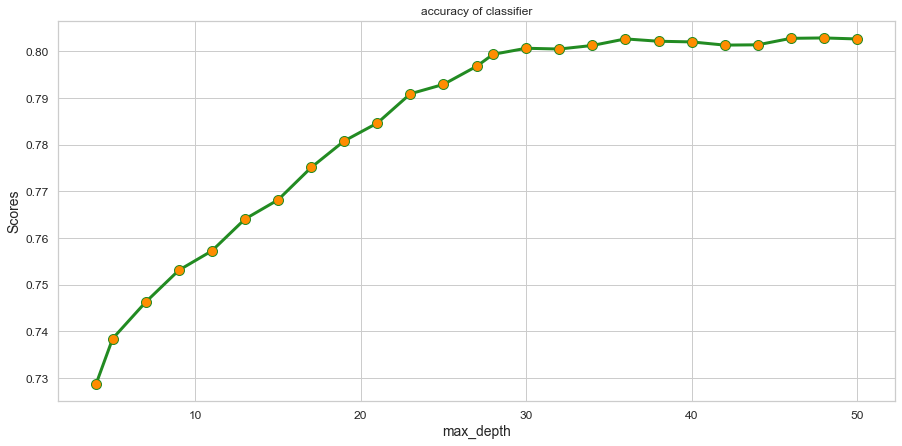

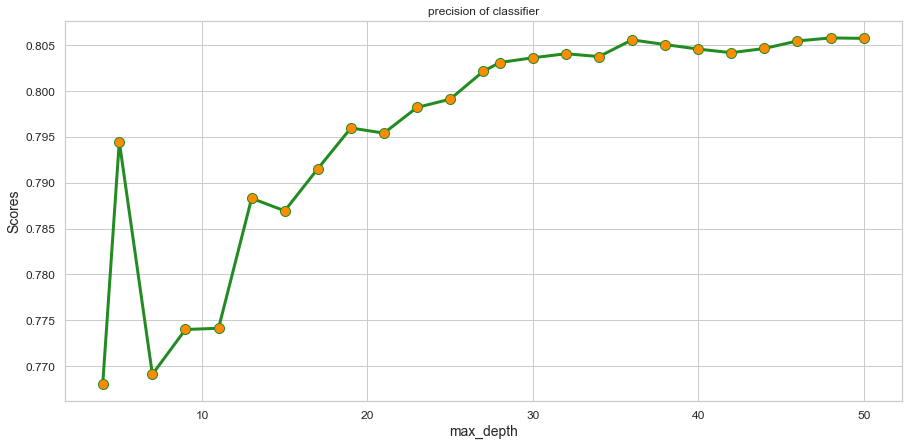

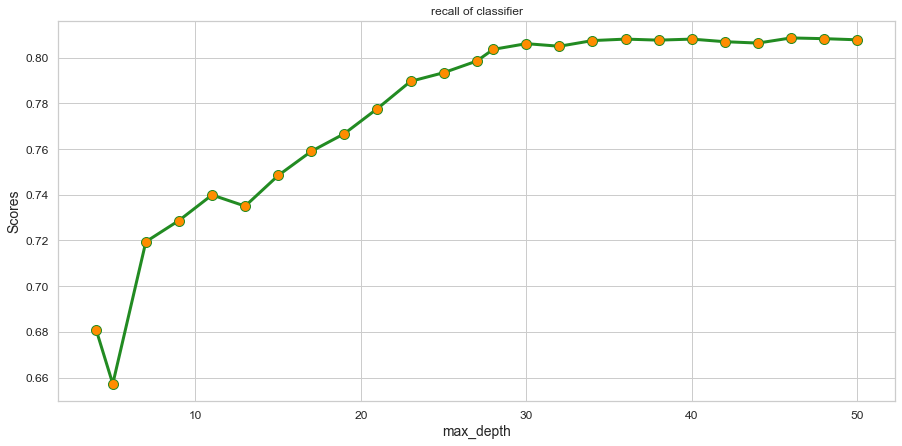

In [ ]:
max_depth_values = [int(x) for x in np.linspace(4, 50, num = 25)]

for fun in scoring_funs:
    plot_classifier_performance('max_depth', max_depth_values, DecisionTreeClassifier(random_state=42), X_train, y_train, fun)

Man mano che la profondità dell'albero aumenta possiamo notare un notevole aumento di prestazioni del modello; potremmo essere in presenza di un fenomeno di overfitting; bisogna scegliere cautamente il valore di max_depth.

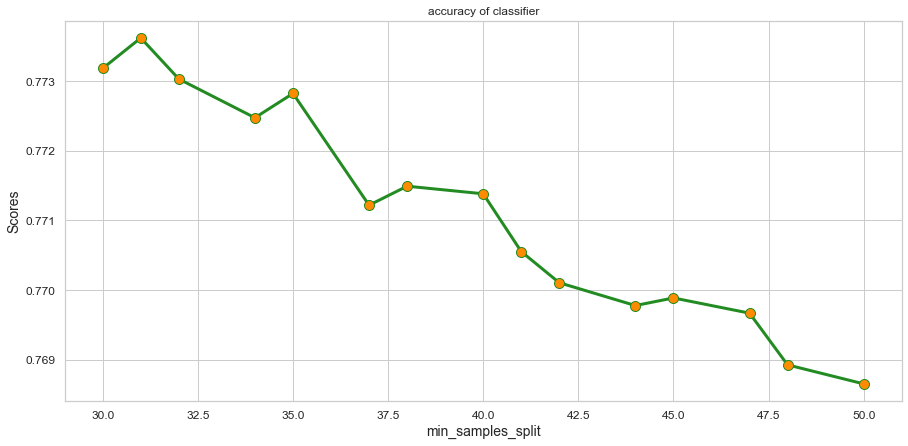

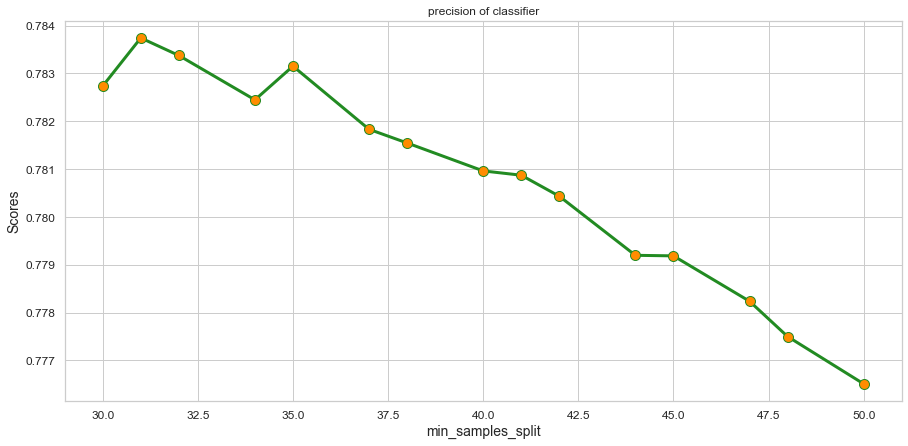

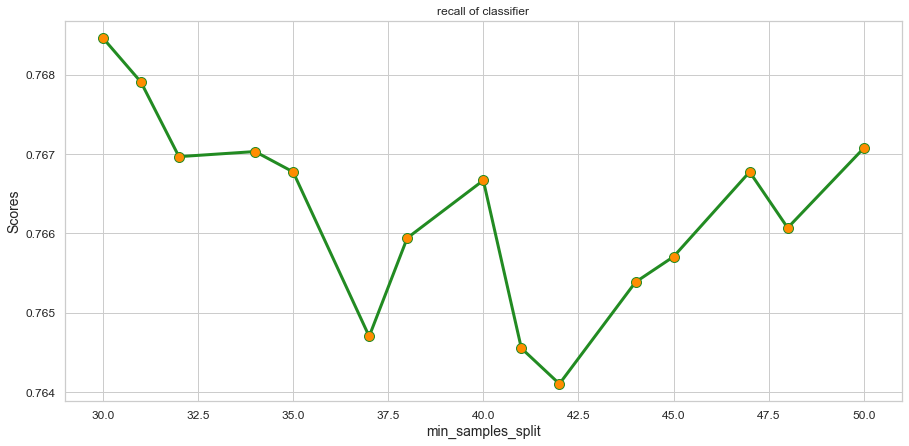

In [ ]:
min_samples_split_values = [int(x) for x in np.linspace(30, 50, num = 15)]

for fun in scoring_funs:
    plot_classifier_performance('min_samples_split', min_samples_split_values, DecisionTreeClassifier(random_state=42), X_train, y_train, fun)

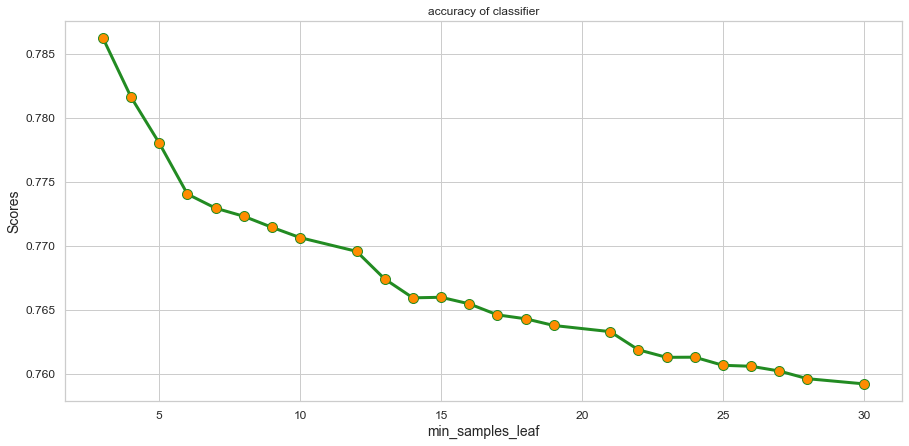

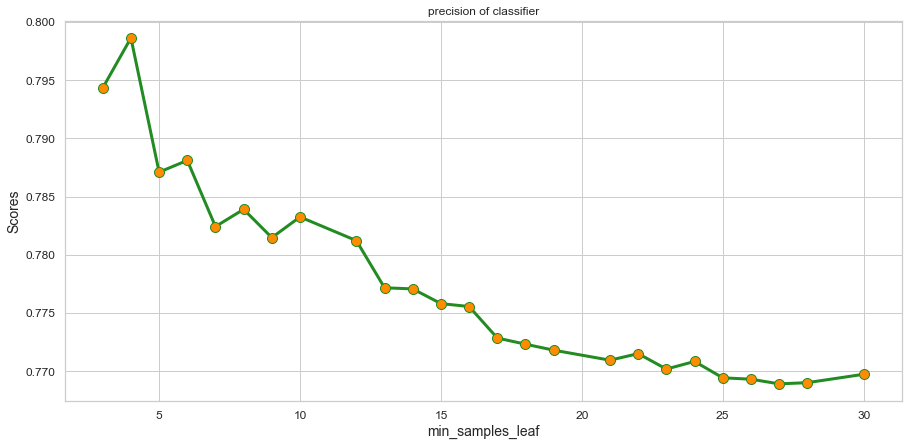

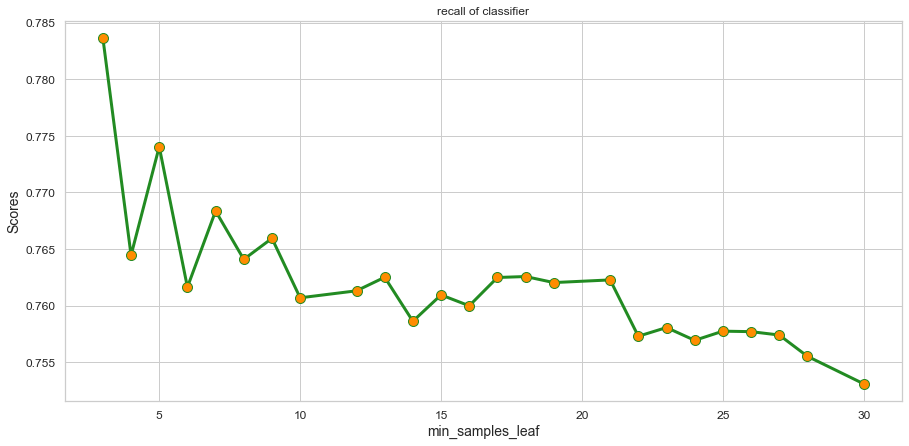

In [ ]:
min_samples_leaf_values = [int(x) for x in np.linspace(3, 30, num = 25)]

for fun in scoring_funs:
    plot_classifier_performance('min_samples_leaf', min_samples_leaf_values, DecisionTreeClassifier(random_state=42), X_train, y_train, fun)

Quest'ultima tripa di grafici consolida che le prestazioni non siano ottimali se comparati alla configurazione di partenza, ciò nonostante bisogna ricordare che il classificatore con i valori di base non è stato limitato nella crescita in profondità, lasciando spazio alla possibilità che si sia verificato overfitting. A giudicare dai grafici, probabilmente non otterremo risultati ottimali se partissimo con la ricerca degli iperparametri tramite gridsearch o randomsearch.  Proviamo a far crescere il classificatore in profondità senza limiti, effettuando in seguito del post pruning, selezionando di conseguenza un valore ideale dell'iperparametro ccp.

In [ ]:
dec_tree_class = DecisionTreeClassifier(random_state=42)
dec_tree_class.fit(X_train, y_train)

path = dec_tree_class.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = np.random.choice(ccp_alphas, size=250, replace=False)
ccp_alphas = np.sort(ccp_alphas)

classifiers = []
for i in range(len(ccp_alphas)):
    classifier = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[i])
    classifier.fit(X_train, y_train)
    classifiers.append(classifier)

In [ ]:
def find_best_model_based_on_ccp(ccp_alphas, scoring_fun, classifiers):
    train_scores = [0.0 for a in range(len(ccp_alphas))]
    best_train_score = 0
    best_class_index = 0

    for i in range(len(train_scores)):
        train_scores[i] = cross_val_score(classifiers[i], X_train, y_train, cv=4, scoring=scoring_fun).mean()
        if train_scores[i] > best_train_score:
            best_class_index = i
            best_train_score = train_scores[i]
    return classifiers[best_class_index], train_scores

In [ ]:
def plot_ccp_vs_score(ccp_alphas, train_scores, score_fun):
    plt.figure(figsize=(15,7))
    plt.title(score_fun +  " score vs alpha")
    plt.plot(ccp_alphas, train_scores, label="cross_val", color='darkcyan', linewidth = 3, marker='o', markerfacecolor='darkorange', markersize=7)
    plt.xlabel('alpha')
    plt.ylabel(score_fun)

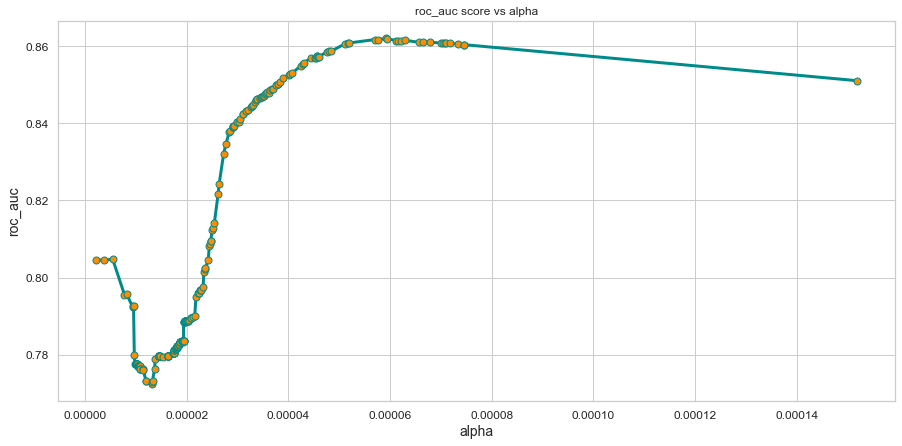

In [ ]:
classifier, train_scores = find_best_model_based_on_ccp(ccp_alphas, 'roc_auc', classifiers)
plot_ccp_vs_score(ccp_alphas, train_scores, 'roc_auc')

In [ ]:
compute_performance([classifier], X_train, y_train, scoring_funs=scoring_funs + ['roc_auc'])

mean 0.7823077115083217 of type accuracy is 0.0019970680789415255
mean 0.7891001037862184 of type precision is 0.005094683391495693
mean 0.7822165859053379 of type recall is 0.009373057210133305
mean 0.8653219696281225 of type roc_auc is 0.0017054522808940065


{'DecisionTreeClassifier': {'accuracy': 0.7823077115083217,
  'precision': 0.7891001037862184,
  'recall': 0.7822165859053379,
  'roc_auc': 0.8653219696281225}}

Se da un lato abbiamo guadagnato nella maggior quantità di area coperta dalla curva roc, dall'altro notiamo dei cali di performance per le restanti 3 misure.  Non avendo avuto fortuna con il roc_auc_score, proviamo a ripetere il ragionamento con gli score definiti in scoring_funs.

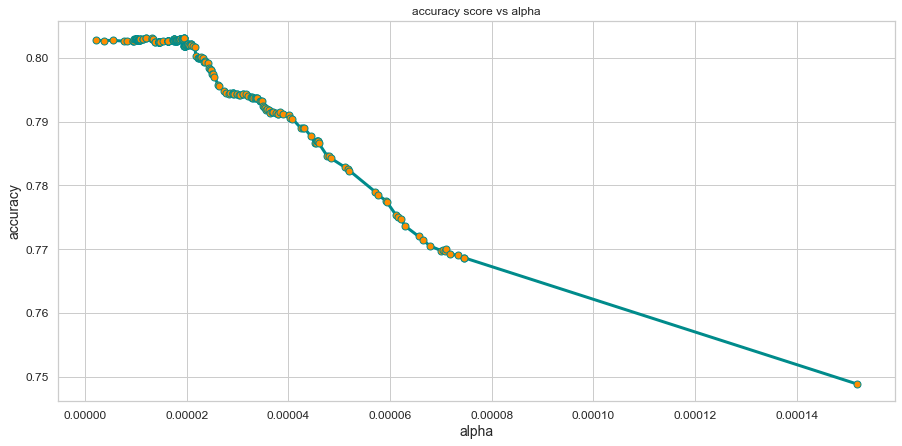

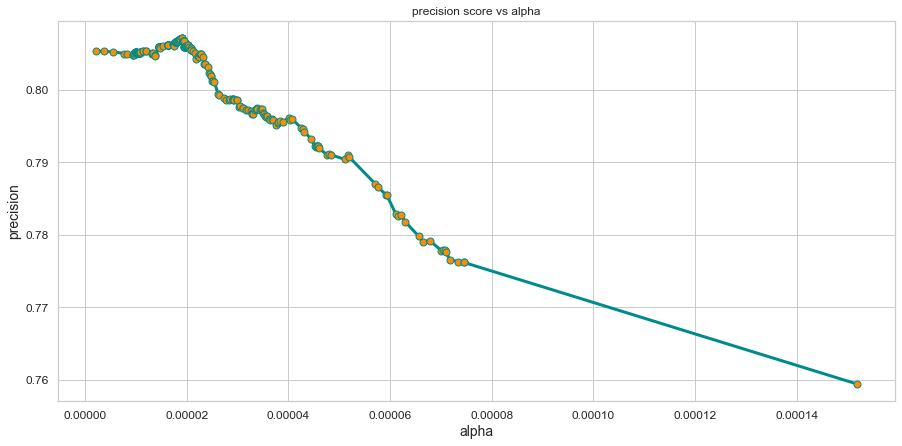

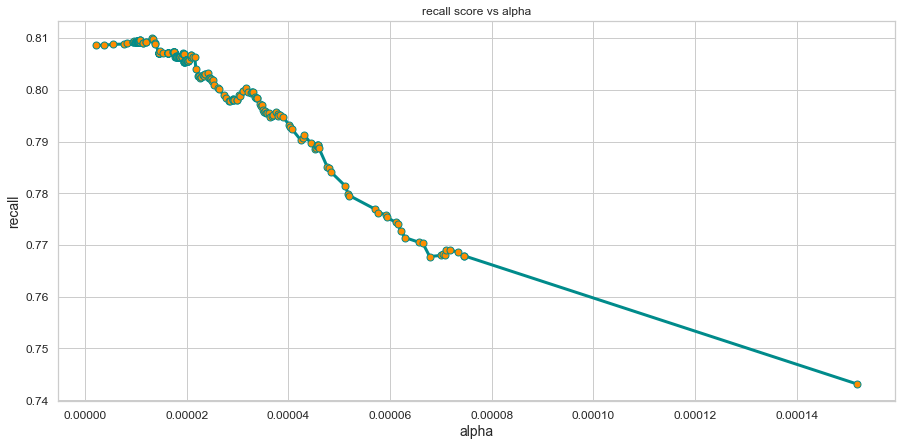

In [ ]:
best_classifiers = []
for i in range(len(scoring_funs)):
    classifer, train_scores = find_best_model_based_on_ccp(ccp_alphas, scoring_funs[i], classifiers)
    best_classifiers.append(classifier)
    plot_ccp_vs_score(ccp_alphas, train_scores, scoring_funs[i])

La strategia di post pruning si è rilevata insufficiente. Come ultimo tentativo, anche se e' chiaro che non si potrà ottenere di meglio delle performance del classificatore con i valori di base, adoperiamo random search al fine di individuare una combinazione ottimale degli iperparametri.

In [ ]:
decision_tree_grid_params = { 'min_samples_split': [int(x) for x in np.linspace(start = 20, stop = 40, num = 10)] ,
               'min_samples_leaf': [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)],
               'max_depth': [int(x) for x in np.linspace(start = 20, stop = 40, num = 10)],
               'max_features': ['sqrt','log2', None]
               }

Com'è possibile osservare il numero di modelli candidati ad essere valutati e' abbastanza elevato ($10 \cdot 10 \cdot 10 \cdot 3 = 3000$), considerando inoltre che ciascun modello verrà sottoposto a k-fold cross validation, il tutto va moltiplicato per k (nel nostro caso k =5) , ergo il training verra' eseguito 15.000 volte. Di fronte a questa cifra, utilizzare grid search sarebbe una follia, per questo si e' preferito random search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

decision_tree_class_1 = DecisionTreeClassifier(random_state=42)

grid_search_decision_tree = RandomizedSearchCV(estimator = decision_tree_class_1, param_distributions = decision_tree_grid_params, n_iter = 250, cv = 5, verbose=2, random_state=42, n_jobs = -1)
grid_search_decision_tree.fit(X_train,y_train)
grid_search_decision_tree.best_params_

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=2, min_samples_split=22; total time=   2.2s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=2, min_samples_split=22; total time=   2.2s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=2, min_samples_split=22; total time=   1.8s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=2, min_samples_split=22; total time=   2.3s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=2, min_samples_split=22; total time=   2.3s
[CV] END max_depth=26, max_features=None, min_samples_leaf=20, min_samples_split=20; total time=   2.4s
[CV] END max_depth=26, max_features=None, min_samples_leaf=20, min_samples_split=20; total time=   2.7s
[CV] END max_depth=26, max_features=None, min_samples_leaf=20, min_samples_split=20; total time=   2.7s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=4, min_samples_split=35; total time=   1.0s
[CV] E

{'min_samples_split': 22,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 40}

In [ ]:
decision_tree_best_params = {'min_samples_split': 22,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 40}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_class_optimized = DecisionTreeClassifier(random_state=42)
decision_tree_class_optimized.set_params(**decision_tree_best_params)
decision_tree_class_optimized.fit(X_train, y_train)
decision_tree_optimized_model_scores = compute_performance([decision_tree_class_optimized], X_train, y_train, scoring_funs)
decision_tree_optimized_model_scores

std of 0.7785786282978886 of type accuracy is 0.001580751578142394
std of 0.7925699304362881 of type precision is 0.002096575650643993
std of 0.7663060950238333 of type recall is 0.004147805112973715


{'DecisionTreeClassifier': {'accuracy': 0.7785786282978886,
  'precision': 0.7925699304362881,
  'recall': 0.7663060950238333}}

Com'era stato presupposto gli score sono peggiorati. 

## 3.6 Ensemble <a name="3.6"></a>

Il modello potrebbe essere costruito combinando i classificatori precedentemente addestrati, se non fosse per il fatto che l'eterogeneità del test set utilizzato da quest'ultimi renda inagevole la costruzione del modello, ovverossia, nel momento in cui l'ensemble dovrá  effettuare delle predizioni, a ciascun modello nell'ensemble dovra' essere associato il rispettivo test set, che sia quello normalizzato per k-neighbors, quello standardizzato per SGD, e quello normale per i rimanenti classificatori. Questo non e' possibile con gli strumenti messi a disposizione da scikit learn; le predizioni verrebbero fatte solo su una tipologia di test set. Come strada alternativa si potrebbe costruire un bagging con k-neighbors, essendo quello piu' promettente dai risultati precedenti; l'idea ha avuto breve vita in seguito alla considerazione dei tempi di addestramento dell'ipotetico modello; k-neighbors da solo esibisce dei tempi di apprendimento troppo elevati, la situazione non farebbe che peggiorare con l'addestramento di piu'k-neighbors in contemporanea. Effettuare il bagging sui restanti modelli, quali SGD e naive bayes, avrebbe poco senso essendo dei modelli relativamente stabili, cioe' costruendo modelli diversi, ma della stessa tipologia (naive bayes ad esempio), le predizioni sarebbe in gran parte uguali, ergo il voting non aiuterebbe. Se con il bagging non abbiamo avuto successo, potremmo provare con il boosting, in particolare effettuando il training del classificatore XGBoost.

XGBoost, che sta per Extreme Gradient Boosting, è una libreria di apprendimento automatico scalabile che fa uso di ensemble di alberi decisionali tramite la tecnica di boosting, alla quale viene applicata una altamente ottimizzata della discesa del gradiente. Prima di entrare nel dettaglio della tecnica di classificazione che verra' adoperata, e' necessario introdurre i due concetti fondamentali sui cui essa basa il proprio funzionamento, vale a dire la tecnica di boosting e gradient-boosting. Il boosting e' una tecnica di ensemble che mira a ridurre il bias e la varianza dei modelli, trasformando weak learners in strong learners, dove per weak learners si intendono dei modelli le cui performance in termini di accuratezza siano appena superiori a quelli di un classificatore che effettua delle predizioni in modo randomico. Il boosting procede in maniera sequenziale : ad ogni iterazione viene addestrato un modello su un insieme di dati; in seguito a ciascun elemento vengono associati dei pesi, prediligendo dei valori alti per le istanze non classificate correttamente,in modo che il classificatore successivo presti maggiore attenzione nella loro corretta classificazione. Il gradient boosting è un'estensione di questa tecnica, in cui il processo di generazione additiva di weak learners è formalizzato come un algoritmo di discesa del gradiente su una funzione obiettivo.


Terminata la breve introduzione alle tecnica, come di consueto, valutiamo le performance di base del classificatore. Una precisazione : anche sklearn mette a disposizione un XGBoostClassifier, tuttavia e' stato osservato che il classificatore della libreria xgboot e' decisamente piu' efficiente, in termini di tempo di esecuzione e memoria occupata; pertanto e' stato preferita questa libreria.

In [47]:
from xgboost import XGBClassifier
xgb_class = XGBClassifier(nthread=8)
xgb_class.fit(X_train,y_train)
xgb_model_scores = compute_performance([xgb_class], X_train, y_train, scoring_funs)

std of 0.8009203301511946 of type accuracy is 0.0023834239461665912
std of 0.8155473232048797 of type precision is 0.0031810459214210744
std of 0.7877337907161346 of type recall is 0.004082406542289643


In [ ]:
xgb_class.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

Il numero di parametri e' abbastanza sproporzionato se paragonato ai precedenti modelli. Gli autori di XGBoost hanno diviso queste insieme in 3 cateogrie, rispettivamente

1. Parametri generali : guidano il funzionamento generale
2. Parametri del booster : Guidano il booster (modello) ad ogni passo.
3. Parametri di apprendimento : guidano l'ottimizzazione eseguita. 

### 3.6.1 Parametri generali <a name="3.6.1"></a>

Di questa categoria fanno parte 

1. booster : indica il tipo di modello utilizzato ad ogni iterazione. Le opzioni sono due, rispettivamente gbtree e gblinear. gbtree costruisce un modello basato su alberi decisionali, mentre gblinear su modelli lineari. 
2. silent : stabilisce se effettuare la stampa a video durante l'esecuzione. 
3. nthread : specifica il nthread da utilizzare nell'esecuzione.

### 3.6.2 Parametri del booster <a name="3.6.2"></a>

Essendo elevato il numero di iperparametri, vi si concentrera' solo su quelli del modello che verra' scelto, i.e. gbtree. La scelta di quest'ultimo come modello rispetto a gblinear e' stata guidata da osservazioni sperimentali che dimostrano, nella maggior parte dei casi, come gbtree performi meglio rispetto ai modelli lineari.

1. eta : e' analogo al learning rate nei metodi che fanno uso del gradient boosting. 
2. min_child_weight : definisce la somma minima dei pesi di tutte le osservazioni richieste in un nodo foglia. E' usato per controllare l'overfitting. Valori più alti impediscono a un modello di apprendere relazioni che potrebbero essere altamente specifiche per il particolare campione selezionato per un albero (ergo impedisce l'overfitting).
3. max_depth : definisce la massima profondita' di un albero. Utilizzato per controllare l'overfitting poiché una maggiore profondità consentirà al modello di apprendere relazioni molto specifiche per un particolare campione.
4. max_leaf_nodes : definisce il massimo numero di nodi foglia in un albero. Se definito l'algoritmo ignorera' max_depth.
5. gamma :  Un nodo viene diviso solo quando la divisione risultante fornisce una riduzione positiva della loss function. Gamma specifica la riduzione minima della loss function richiesta per effettuare una divisione.
6. max_delta_step : consente di stimare il peso di ogni albero. Se il valore è impostato su 0, significa che non c'è alcun vincolo. Se è impostato su un valore positivo, può aiutare a rendere il passaggio di aggiornamento più conservativo. Di solito questo parametro non è necessario, ma può aiutare nella regressione logistica quando la classe è estremamente sbilanciata.
7. subsample : Indica la frazione di osservazioni da campionare casualmente per ogni albero. Valori più bassi rendono l'algoritmo più conservativo e prevengono l'overfitting, ma valori troppo piccoli potrebbero portare a un underfitting.
8. colsample_bytree :  Indica la frazione di colonne da campionare casualmente per ogni albero.
9. colsample_bylevel : Denota il rapporto sottocampione delle colonne per ogni divisione, in ogni livello.
10. lambda : Termine di regolarizzazione L2 sui pesi. E' utilizzato per gestire la parte di regolarizzazione di XGBoost. Sebbene molti data scientist non lo utilizzino spesso, dovrebbe essere esplorato per ridurre l'overfitting.
11. apha : Termine di regolarizzazione L1 sul peso. Può essere utilizzato in caso di dimensionalità molto elevata in modo che l'algoritmo funzioni più velocemente una volta implementato.
12. scale_pos : aiuta ad una convergenza piu' rapida dell'algoritmo in caso di dataset sbilanciato.

Applichiamo una fase di scrematura degli iperparametri : scale_pos in questo contesto puo' essere tralasciato poiche' il dataset non e' sbilanciato, lambda e' possibile tralasciarlo in quanto abbiamo altri parametri che permettono di controllare l'overfitting, max_delta step non e' utilizzato in generale, colsample_bylevel puo' essere tralasciato essendo sufficienti subsample e colsample_bytree, max_leaf_nodes non avrebbe senso utilizzarlo avendo gia' scelto max_depth (se specificassimo un valore di max_leaf_nodes, max_depth verrebbe ignorato). In sintesi, gli iperparametri che verranno ottimizzati saranno 

In [ ]:
booster_most_imp_params = {'learning_rate', 'min_child_weight', 'max_depth', 'max_depth', 'gamma', 'subsample', 'colsample_bytree'}

### 3.6.3 Parametri di learning <a name="3.6.3"></a>
Questi parametri vengono utilizzati per definire l'obiettivo di ottimizzazione della metrica da calcolare ad ogni passaggio.

1. objective : e' la funzione obiettivo che dovra' essere minimizzata. 
2. eval_metric : la metrica utilizzata per la validazione. 
3. seed : analogo a random_state in scikitlearn.

Il compito affrontato in questa sede e' quello della classificazione binaria, ergo per la funzione obiettivo verra' utilizzata la regressione logistica, mentre per la metrica di valutazione l'errore di classificazione binario.

### 3.6.4 Tuning <a name="3.6.4"></a>

Come di routine, preliminare alla fase di tuning, grafichiamo l'andamento delle performance del classificatore al variare di un iperparametro per cercare di inferire un range di variazione dell'iperparametro. Chiaramente, essendo molti gli iperparametri, verrano graficati solo quelli piu' influenti nelle performance.

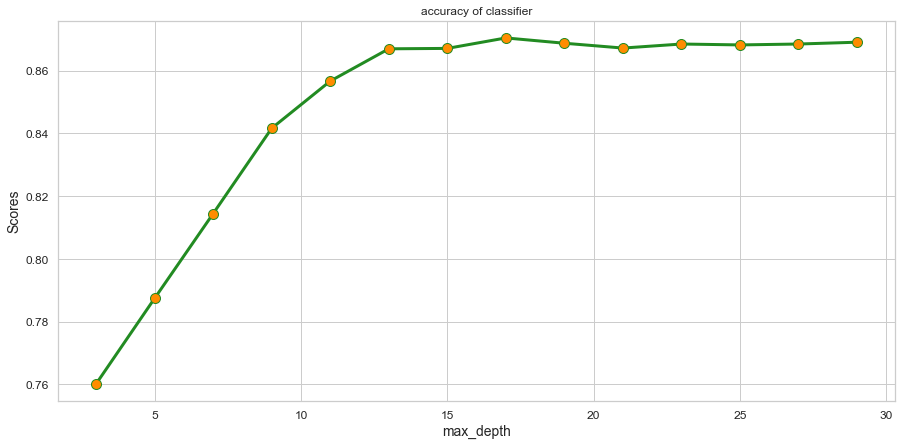

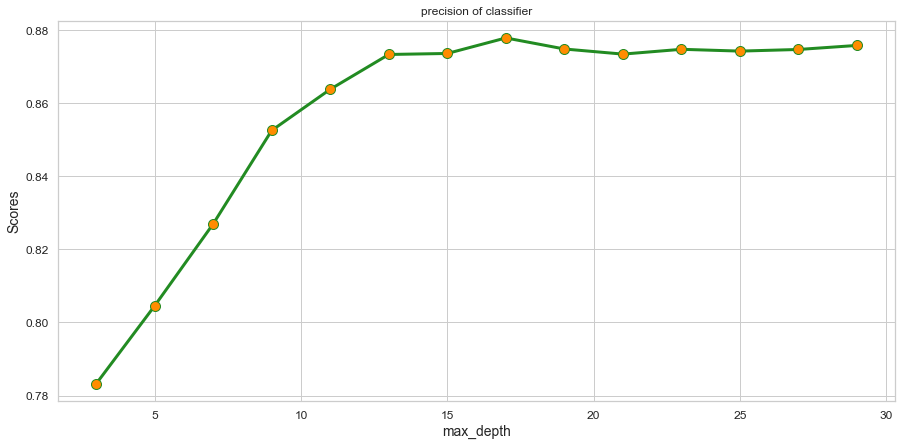

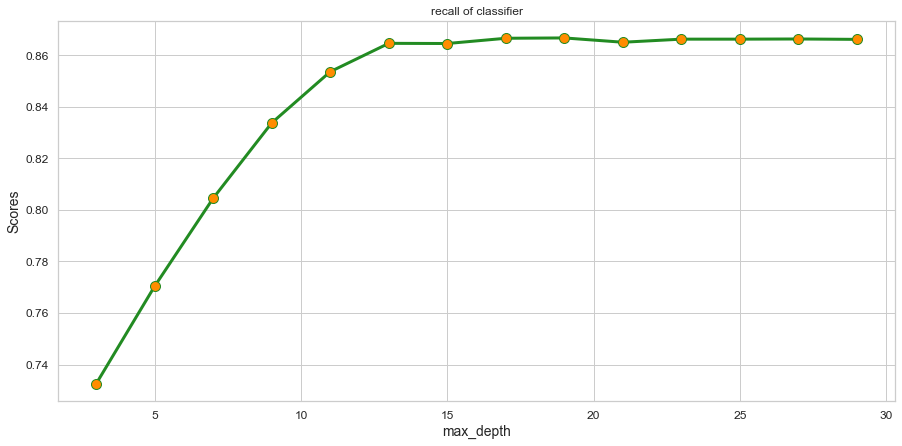

In [ ]:
max_depth_values = range(3,30,2)

for fun in scoring_funs:
    plot_classifier_performance('max_depth', max_depth_values, XGBClassifier(), X_train, y_train, fun)

Come ormai consolidato dai modelli tree based, far crescere gli alberi in profondita' non puo' fare che migliorare le performance dei classificatori (sebbene tale crescita debbe essere moderata). Per valori maggiori di 15 il grafico tende ad assestarsi. Un valore pari a 13 potrebbe essere sufficiente. 

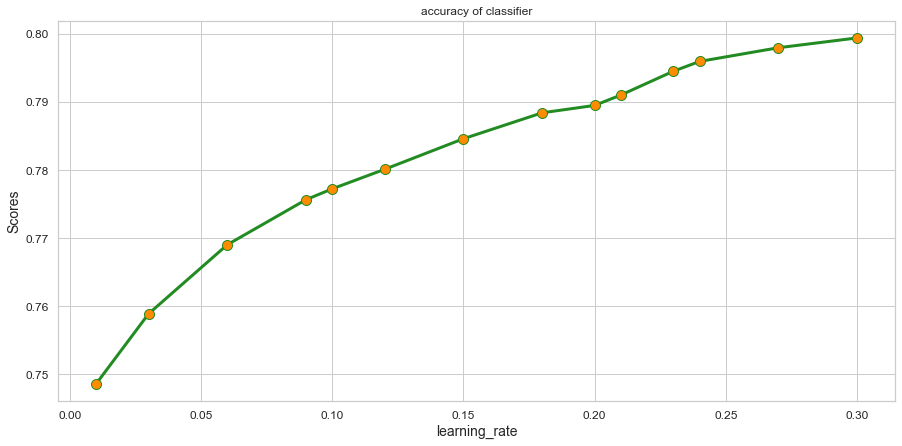

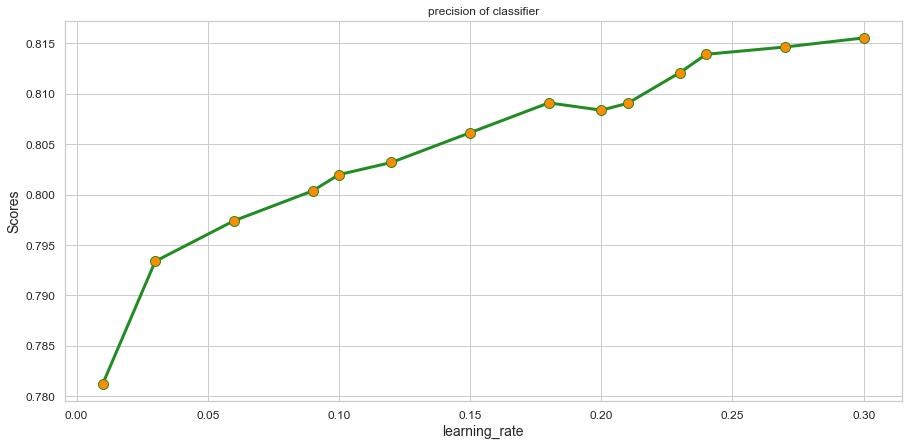

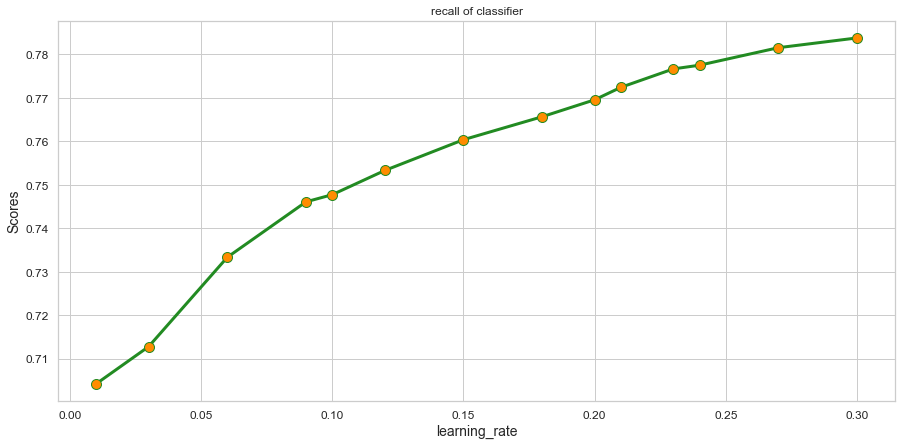

In [ ]:
learning_rate_values = [0.01, 0.03, 0.06, 0.09, 0.1, 0.12, 0.15, 0.18, 0.2, 0.21, 0.23, 0.24, 0.27, 0.3, 0.3]

for fun in scoring_funs:
    plot_classifier_performance('learning_rate', learning_rate_values, XGBClassifier(), X_train, y_train, fun)

L'andamento esibito dalla tripla di grafici e' approssimatamente lineare. Valori bassi non sembrano beneficiare il modello; non resta che scegliere come valore ottimale quello di default (che e' proprio 0.3). 

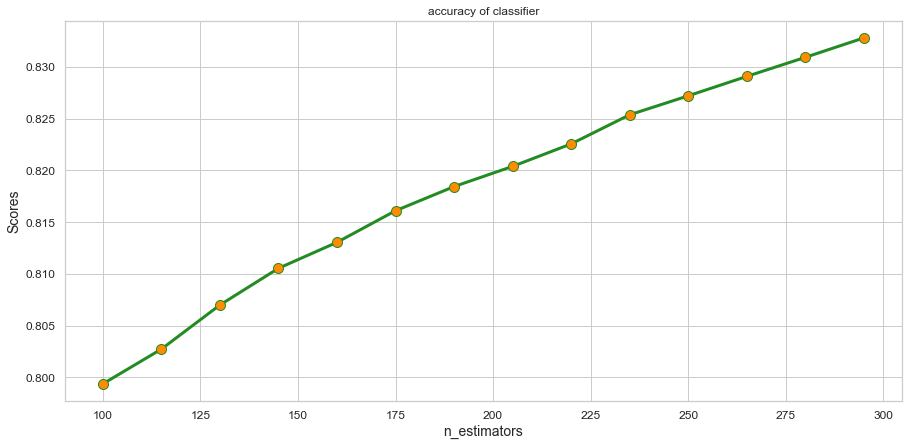

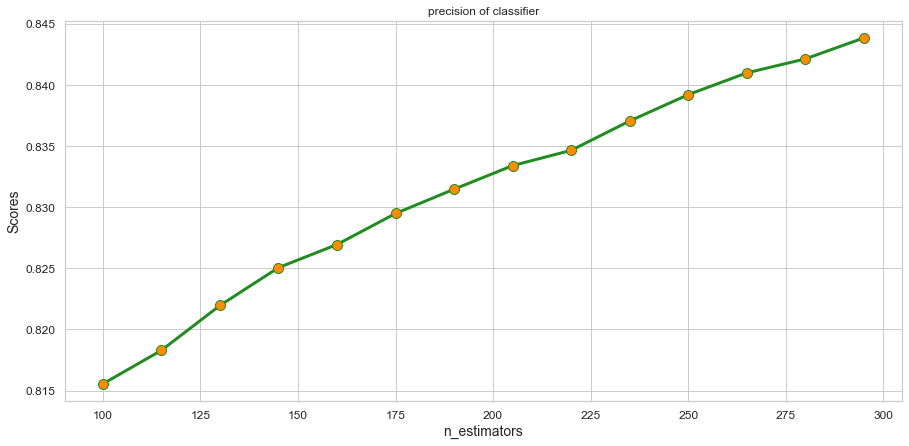

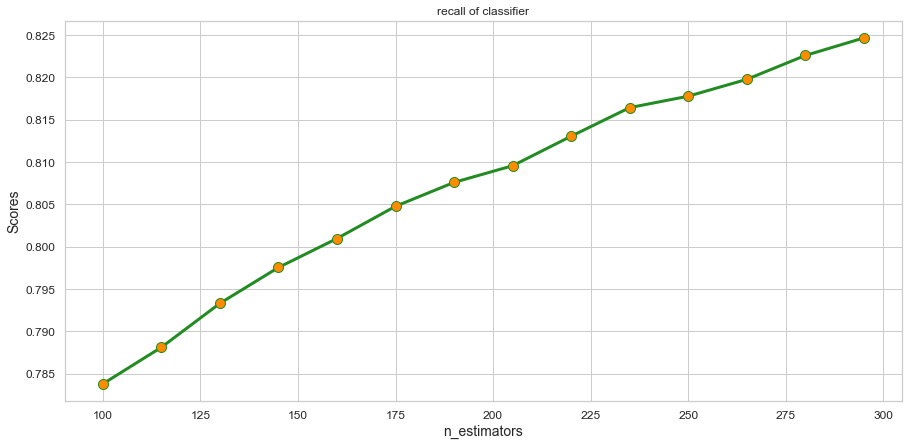

In [ ]:
n_estimators_values = range(100,300,15)

for fun in scoring_funs:
    plot_classifier_performance('n_estimators', n_estimators_values, XGBClassifier(), X_train, y_train, fun)

Analogo ai grafici precedenti, l'andamento lineare e' decisamente piu' accentuato. Se non per la limitatezza dell'hardware, il valore scelte sarebbe stato 300, tuttavia l'intensivo uso della CPU da parte dell'algoritmo (con le relative conseguenze) rende inattuabile la scelta di valori alti dell'iperparametro. Accettando dei compromessi, si potrebbe scegliere poco piu' del valore medio, ad esempio 200. 

Rispetto alla fase di tuning dei modelli precdenti, si e' deciso di adottare un altro approccio in seguito alla presa visione dell'utilizzo  sproporzionato di risorse dell'algoritmo (comparato ai modelli precedenti) che consiste nell'effettuare il tuning in piu' fasi, a ciascuna corrispondente un sottoinsieme degli iperparametri piu' importanti. In questa prima fase, tralasciando n_estimators, vengono presi in considerazione gli iperparametri che impatteranno maggioramente le performance del modello, rispettivamente max_depth e min_child_weight. Un notevole svantaggio di questo metodo e' la rinuncia a un massimo globale (in termini di performance) per un massimo locale : se avessimo considerato una griglia comprendente  tutti gli iperparametri sarebbe stato certamente possibile individuare la migliore combinazione, mentre con questo nuovo approccio i valori finali potrebbero non corrispondere alla combinazione ottimale. 

In [ ]:
xgb_class_grid_params_1 = {
    'n_estimators': 200,
    'max_depth': range(5,15,2),
    'min_child_weight':range(1,6,1)
}

max_depth potrebbe essere impostato a 13, come discusso precedentemente, tuttavia la presenza di min_child_weight potrebbe influenzare la scelta su max_depth, ergo potremmo avere max_depth piu' bassi in corrispondenza di un certo valore di min_child_weight che potrebbe risultare in score migliori; per tale motivo si e' preferito far variare max_depth in un range di valori.

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_class_1 = XGBClassifier()
grid_search_xgb_1 = GridSearchCV(xgb_class_1, xgb_class_grid_params_1, verbose=3)
grid_search_xgb_1.fit(X_train,y_train)
grid_search_xgb_1.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...max_depth=5, min_child_weight=1;, score=0.783 total time=   2.7s
[CV 2/5] END ...max_depth=5, min_child_weight=1;, score=0.785 total time=   2.7s
[CV 3/5] END ...max_depth=5, min_child_weight=1;, score=0.790 total time=   2.6s
[CV 4/5] END ...max_depth=5, min_child_weight=1;, score=0.786 total time=   2.7s
[CV 5/5] END ...max_depth=5, min_child_weight=1;, score=0.783 total time=   2.7s
[CV 1/5] END ...max_depth=5, min_child_weight=2;, score=0.780 total time=   2.6s
[CV 2/5] END ...max_depth=5, min_child_weight=2;, score=0.787 total time=   2.7s
[CV 3/5] END ...max_depth=5, min_child_weight=2;, score=0.792 total time=   2.7s
[CV 4/5] END ...max_depth=5, min_child_weight=2;, score=0.785 total time=   2.6s
[CV 5/5] END ...max_depth=5, min_child_weight=2;, score=0.785 total time=   2.7s
[CV 1/5] END ...max_depth=5, min_child_weight=3;, score=0.783 total time=   2.6s
[CV 2/5] END ...max_depth=5, min_child_weight=3

{'max_depth': 13, 'min_child_weight': 1}

In [48]:
xgb_best_params_1 = {'max_depth': 13, 'min_child_weight': 1}

In [49]:
xgb_class_optimized_1 = XGBClassifier()
xgb_class_optimized_1.set_params(**xgb_best_params_1)
xgb_class_optimized_1.fit(X_train, y_train)
xgb_class_optimized_1_model_scores = compute_performance([xgb_class_optimized_1], X_train, y_train, scoring_funs)
xgb_class_optimized_1_model_scores

std of 0.8718379840437777 of type accuracy is 0.0032432445205672423
std of 0.8783261959432238 of type precision is 0.0032467297053858347
std of 0.8690391490239724 of type recall is 0.005303533313993299


{'XGBClassifier': {'accuracy': 0.8718379840437777,
  'precision': 0.8783261959432238,
  'recall': 0.8690391490239724}}

Fortunamente le performance hanno gia' subito un incremento osservabile. Procediamo ora con la seconda fase di tuning, tenendo a mente i valori ottimali degli iperparametri appena ricavati.

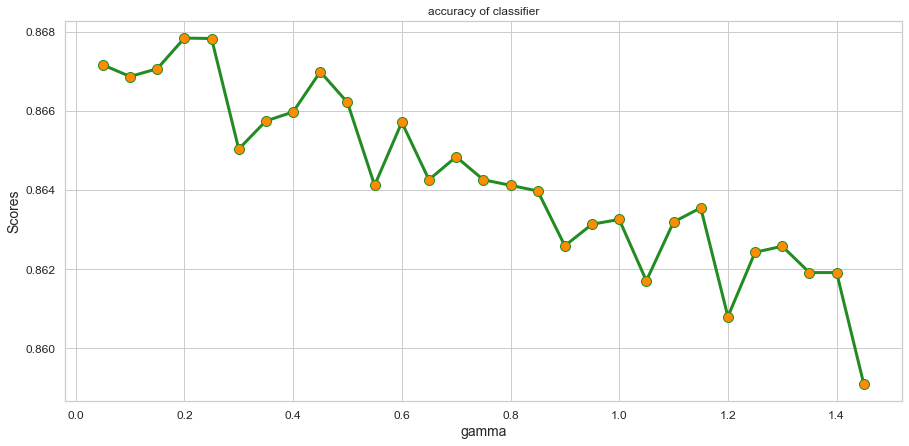

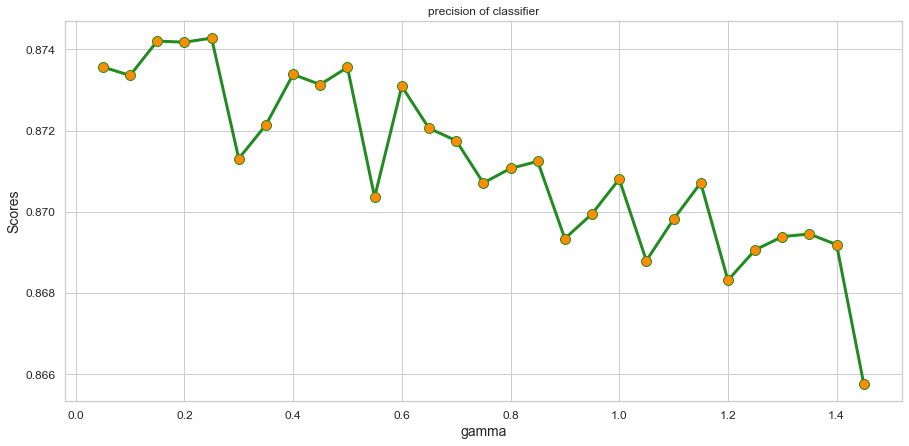

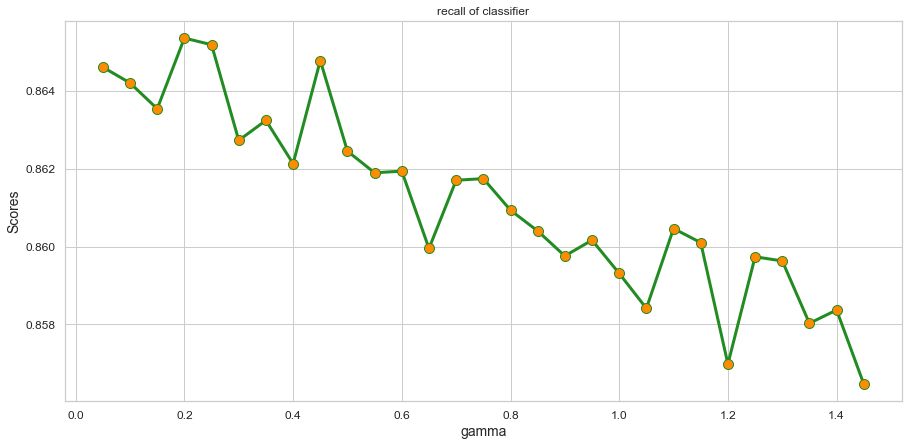

In [ ]:
gamma_values = [i/20.0 for i in range(1,30)]
for fun in scoring_funs:
    plot_classifier_performance('gamma', gamma_values, XGBClassifier(max_depth=13, min_child_weight=1), X_train, y_train, fun)

Variazione crescenti dell'iperapametro non favoriscono le performance del modello. Questo significa che il criterio di splitting di un nodo e' molto sensibile a piccole riduzioni della funzione obiettivo. Gamma = 0.2 e' il valore che verra' scelto.

Gli iperparametri protagonisti di questa seconda fase di tuning saranno subsample e colsample_bytree. Come specificato precedentemente sono utilizzati per ridurre l'overfitting, specialmente valori bassi. Empiricamente e' stato osservato che l'intervallo di variazione comune per ambedue gli iperparametri e' [0.5,1]. 

In [ ]:
xgb_class_grid_params_2 = {
    'subsample': [i/20.0 for i in range(10,20)],
    'colsample_bytree': [i/20.0 for i in range(10,20)],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgb_class_2 = XGBClassifier(max_depth=13, min_child_weight=1, gamma=0.2)
grid_search_xgb_2 = GridSearchCV(xgb_class_2, xgb_class_grid_params_2, verbose=3)
grid_search_xgb_2.fit(X_train,y_train)
grid_search_xgb_2.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END colsample_bytree=0.5, subsample=0.5;, score=0.843 total time=   6.6s
[CV 2/5] END colsample_bytree=0.5, subsample=0.5;, score=0.843 total time=   6.4s
[CV 3/5] END colsample_bytree=0.5, subsample=0.5;, score=0.853 total time=   6.4s
[CV 4/5] END colsample_bytree=0.5, subsample=0.5;, score=0.847 total time=   6.8s
[CV 5/5] END colsample_bytree=0.5, subsample=0.5;, score=0.849 total time=   6.8s
[CV 1/5] END colsample_bytree=0.5, subsample=0.55;, score=0.844 total time=   6.5s
[CV 2/5] END colsample_bytree=0.5, subsample=0.55;, score=0.847 total time=   6.5s
[CV 3/5] END colsample_bytree=0.5, subsample=0.55;, score=0.856 total time=   6.5s
[CV 4/5] END colsample_bytree=0.5, subsample=0.55;, score=0.855 total time=   6.5s
[CV 5/5] END colsample_bytree=0.5, subsample=0.55;, score=0.852 total time=   6.4s
[CV 1/5] END colsample_bytree=0.5, subsample=0.6;, score=0.852 total time=   6.5s
[CV 2/5] END colsample_bytree=

{'colsample_bytree': 0.85, 'subsample': 0.95}

In [50]:
xgb_best_params_2 = {'colsample_bytree': 0.85, 'subsample': 0.95}

In [51]:
xgb_class_optimized_2 = XGBClassifier(max_depth=13, min_child_weight=1, gamma=0.2)
xgb_class_optimized_2.set_params(**xgb_best_params_2)
xgb_class_optimized_2.fit(X_train, y_train)
xgb_class_optimized_2_model_scores = compute_performance([xgb_class_optimized_2], X_train, y_train, scoring_funs)
xgb_class_optimized_2_model_scores

std of 0.871543552201901 of type accuracy is 0.0014304526253521243
std of 0.8773322970284785 of type precision is 0.0029382446098105528
std of 0.869680601833403 of type recall is 0.0030863877294322814


{'XGBClassifier': {'accuracy': 0.871543552201901,
  'precision': 0.8773322970284785,
  'recall': 0.869680601833403}}

Sfortunatamente le performance sono rimaste inalterate. I valori degli ultimi due iperparaemtri verranno comunque utilizzati perche' rendono, seppur marginalmente, meno prono ad overfitting il modello rispetto ai valori di default (entrambi pari ad 1).

# 4. Prestazioni dei classificatori <a name="4."></a>

Effettuato il training e la validazione, è arrivato il momento di testare il comportamento dei modelli di fronte a scenari concreti tramite il test set.

In [91]:
names_of_classifiers = ['Random forest', 'K-neighbors', 'SGD', 'Decision tree', 'Naive bayes', 'XGBoost']
classifiers = [rnd_forest_class_optimized, knn_class_optimized, sgd_clf, decision_tree_class, mnb_class, xgb_class_optimized_2]
colors = ['darkorange', 'darkgreen', 'cornflowerblue', 'firebrick', 'darkgoldenrod', 'lightseagreen']

In [54]:
def get_test_set(classifier_name):
    return {
        'Naive bayes': discretized_X_test,
        'SGD': scaled_X_test,
        'K-neighbors': normalized_X_test,
    }.get(classifier_name, X_test)   

In [55]:
def get_score(y_class_test, y_class_pred, score_type):
    if score_type == 'accuracy':
        return accuracy_score(y_class_test, y_class_pred)
    elif score_type == 'precision':
        return precision_score(y_class_test, y_class_pred)
    else:
        return recall_score(y_class_test, y_class_pred)

In [56]:
def plot_bar(names_of_classifiers, test_scores, title, score_type, colors):
    plt.figure(figsize=(14, 7))
    plt.ylabel(score_type)
    plt.title(title)
    plt.bar(names_of_classifiers, test_scores, color=colors, width = 0.4, alpha=0.7)
    plt.show()

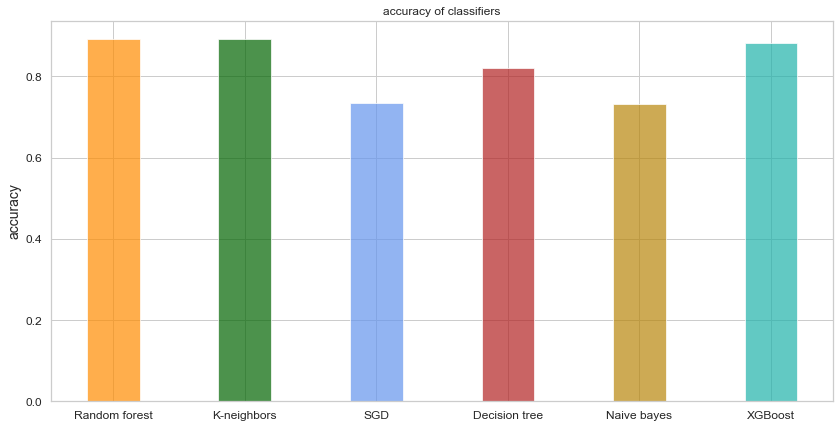

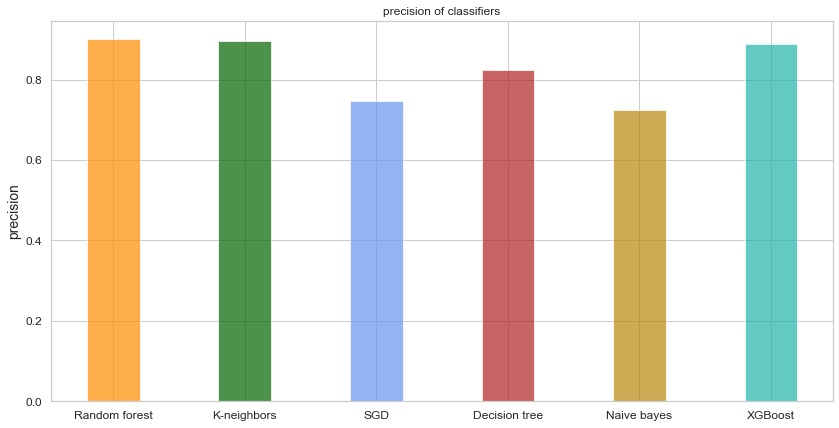

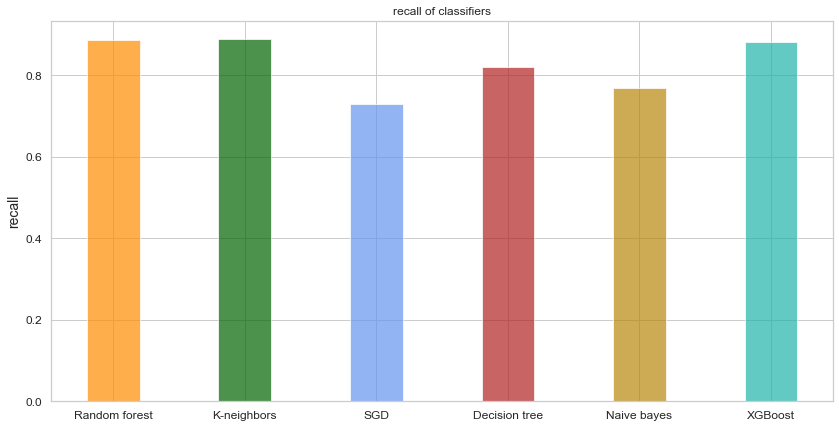

In [93]:
test_scores = np.empty(len(classifiers), dtype=float) 

for score_type in scoring_funs:
    for j in range(len(classifiers)):
        X_test_1 = get_test_set(names_of_classifiers[j])
        y_class_pred = classifiers[j].predict(X_test_1)
        test_scores[j] = get_score(y_test, y_class_pred, score_type)
    plot_bar(names_of_classifiers, test_scores, str(score_type) + ' of classifiers', score_type, colors)

Soprendentemente, k-nearest neighbors compete a pari passo dei i modelli ensemble, rispettivamente random forest e xgboost; considerando che è un singolo classificatore, i risultati sono più ottenuti  sono tali da cementarlo come un ottimo modello. L'eccellenza di random forest e xgboost e' ulteriormente confermata, come era stato suggerito dagli score nella validazione. Decision tree si posiziona in $4^o$ posto, non avendo le armi per competere con i gli ensemble e k-nearest neighbors. Sgd e naive bayes si collocano negli ultimi posti della classifica con degli score piuttosto discreti, nonostante operino in condizioni "approssimate".

Guardando solo ai grafici, risulta difficile capire quali siano i valori precisi delle 3 misure. Al fine di comparare i risultati visti nella fase precedente con quelli appena calcolati, rappresentiamo mediante una heatmap i classification report dei singoli classificatori

In [68]:
def plot_heatmap(classification_report, title):
    plt.figure(figsize=(8,5)) 
    temp = ps.DataFrame(classification_report).iloc[:-1, :].T
    temp.drop(['micro avg', 'macro avg', 'weighted avg'], axis=0, inplace=True)
    sns.heatmap(temp, annot=True)
    plt.title(title, fontsize = 16, fontname="Times New Roman Bold")

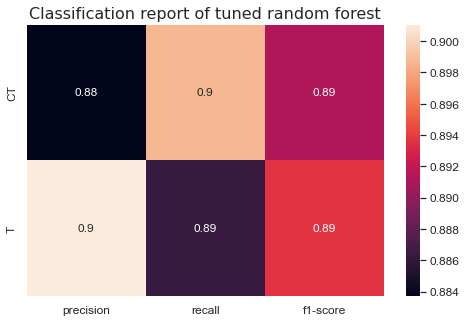

In [69]:
labels = np.arange(10)
names = ['CT', 'T']
axes = ['precision', 'recall', 'f1-score']

y_pred_random_forest_optimized = rnd_forest_class_optimized.predict(X_test)
random_forest_optimized_report = classification_report(y_test, y_pred_random_forest_optimized, labels=labels, target_names=names, output_dict=True)
plot_heatmap(random_forest_optimized_report, 'Classification report of tuned random forest')

Come asserito precedentemente, i risultati ottenuti ottenuti con il classificatore sono decisamente ottimali; sono addiritura marginalmente piu' alti di quanto osservato nella validazione. Confrontiamoli con il random forest aventi gli iperparametri di default.

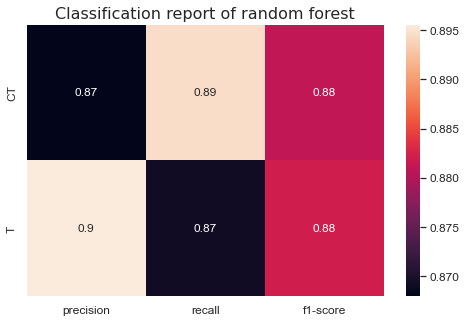

In [70]:
y_pred_random_forest = rnd_class.predict(X_test)
random_forest_report = classification_report(y_test, y_pred_random_forest, labels=labels, target_names=names, output_dict=True)
plot_heatmap(random_forest_report, 'Classification report of random forest')

Le differenze sono piuttosto marginali; d'altronde gli score di partenza erano gia' collocati nella fascia di ottimalita'. 

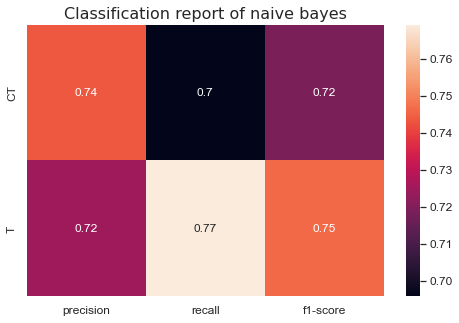

In [60]:
y_pred_naive_bayes =  mnb_class.predict(discretized_X_test)
naive_bayes_report = classification_report(y_test, y_pred_naive_bayes, labels=labels, target_names=names, output_dict=True)
plot_heatmap(naive_bayes_report, 'Classification report of naive bayes')

Vengono confermati i risultati discreti della validazione.

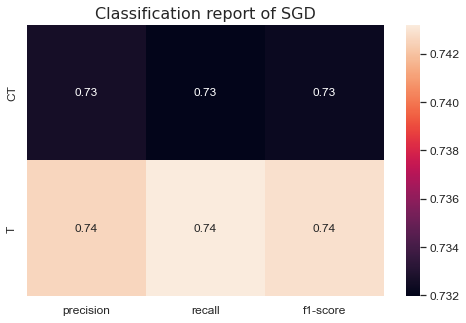

In [ ]:
y_pred_sgd =  sgd_clf.predict(scaled_X_test)
sgd_report = classification_report(y_test, y_pred_sgd, labels=labels, target_names=names, output_dict=True)
plot_heatmap(sgd_report, 'Classification report of SGD')

Rispetto al Naive bayes gli scomparano sono pressoche' comparabili. Prendendo  anche in considerazione il tempo impiegato da ambedue i modelli nella fase di learning, si potrebbe tendere a preferire per il naive bayes per i tempi di esecuzione sensibilmente piu' veloci dell'SGD, tuttavia bisogna tenere a mente che e performance di quest'ultimo potrebbero,probabilmente, migliorare con un tuning degli iperparametri piu' approfondito, cosa non possibile con naive bayes non avendo iperparametri da ottimizzare. 

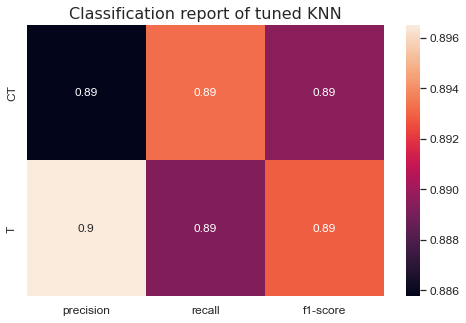

In [ ]:
y_pred_knn_optimized =  knn_class_optimized.predict(normalized_X_test)
knn_optimized_report = classification_report(y_test, y_pred_knn_optimized, labels=labels, target_names=names, output_dict=True)
plot_heatmap(knn_optimized_report, 'Classification report of tuned KNN')

Gli score sono pressoche' equivalenti a quelli di random forest. Anche in tal caso possiamo vedere come si discostino dal classificatore di base

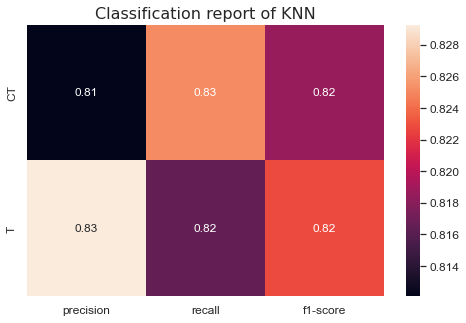

In [ ]:
y_pred_knn =  knn_class.predict(normalized_X_test)
knn_report = classification_report(y_test, y_pred_knn, labels=labels, target_names=names, output_dict=True)
plot_heatmap(knn_report, 'Classification report of KNN')

La differenza e' abbastanza pronunciata se comparato a quanto visto tra il random forest ottimizzato e di base. 

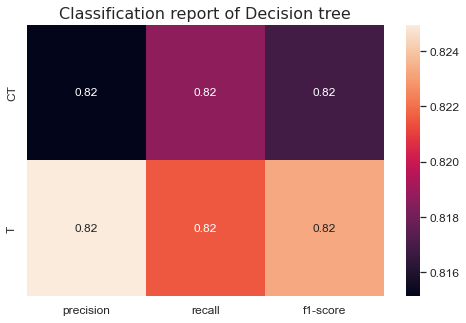

In [ ]:
y_pred_decision_tree =  decision_tree_class.predict(X_test)
decision_tree_report = classification_report(y_test, y_pred_decision_tree, labels=labels, target_names=names, output_dict=True)
plot_heatmap(decision_tree_report, 'Classification report of Decision tree')

Gli score sono tali da garantire al modello un posto nella fascia di ottimalita'.

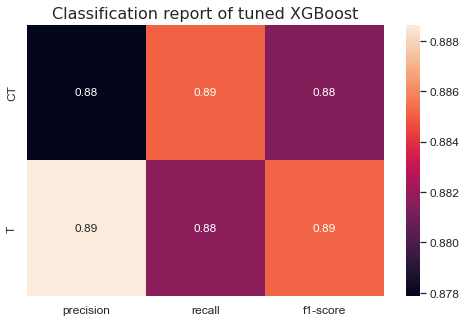

In [ ]:
y_pred_xgb_optimized_2 =  xgb_class_optimized_2.predict(X_test)
xgb_class_optimized_2_report = classification_report(y_test, y_pred_xgb_optimized_2, labels=labels, target_names=names, output_dict=True)
plot_heatmap(xgb_class_optimized_2_report, 'Classification report of tuned XGBoost')

Gli score sembrano leggermente piu' alti rispetto a quelli visti nella validazione (circa 0.01 in piu').

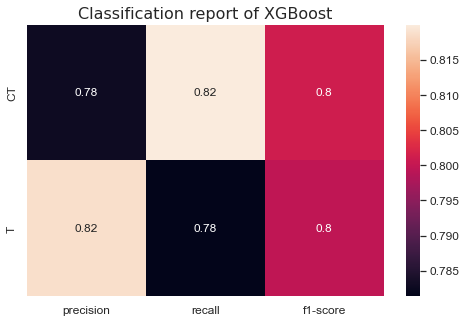

In [71]:
y_pred_xgb =  xgb_class.predict(X_test)
xgb_class_report = classification_report(y_test, y_pred_xgb, labels=labels, target_names=names, output_dict=True)
plot_heatmap(xgb_class_report, 'Classification report of XGBoost')

Il salto di prestazioni con la versione ottimizzata risulta abbastanza accentuato, sopratutto per la recall, che ha avuto un incremento del 10%.

In [72]:
def compute_fpr_tpr(classifiers, names_of_classifiers):
    classifiers_fpr = dict()
    classifiers_tpr = dict()
    for i in range(len(classifiers)):
        classifier_predict_probabilities = classifiers[i].predict_proba(get_test_set(names_of_classifiers[i]))[:,1]
        classifiers_fpr[i], classifiers_tpr[i], _ = roc_curve(y_test, classifier_predict_probabilities)
    return classifiers_fpr, classifiers_tpr

In [73]:
classifiers_fpr, classifiers_tpr = compute_fpr_tpr(classifiers, names_of_classifiers)

In [74]:
def set_plot_labels():
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [75]:
def plot_roc_auc(classifiers_fpr, classifiers_tpr, names_of_classifiers, colors):
    plt.figure(figsize=(16, 10))
    for i in range(len(names_of_classifiers)):
        plt.plot(classifiers_fpr[i], classifiers_tpr[i], color=colors[i],lw=2, 
        label= names_of_classifiers[i] + ' (area = %0.2f)' % auc(classifiers_fpr[i], classifiers_tpr[i]))   
    set_plot_labels()

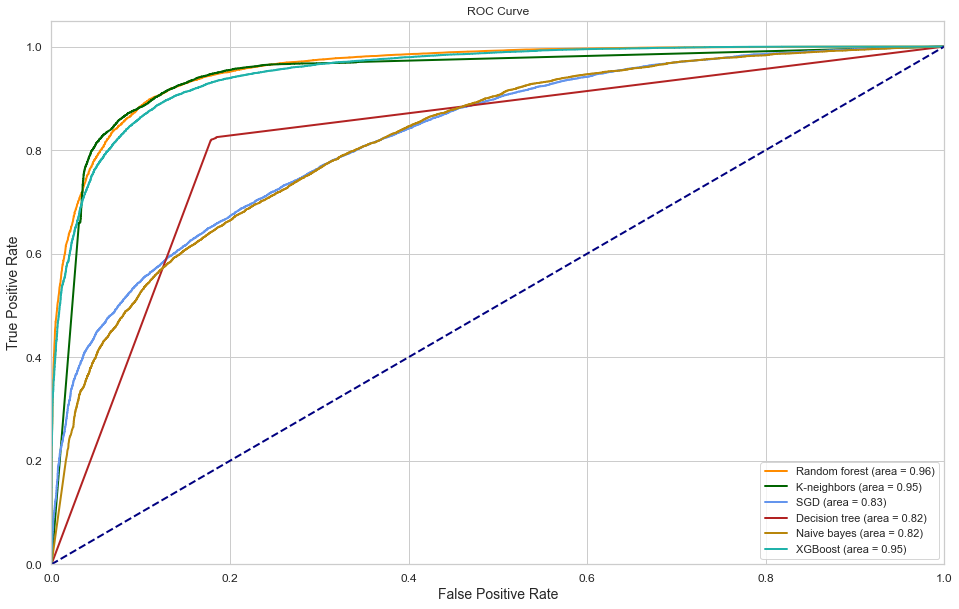

In [92]:
from sklearn.metrics import roc_curve, auc

plot_roc_auc(classifiers_fpr, classifiers_tpr, names_of_classifiers, colors)

Le curve roc non fanno che confermare quanto appena discusso con i grafici a barre. 

Se dovessimo prendere una decisione in merito a quale modello scegliere la risposta sarebbe tendente verso random forest dato che le performance sono le migliori registrate tra i modelli comparati, inoltre il processo di training risulta piu' rapido degli altri due modelli occupanti il podio (rispettivamente xgboost e kneighbors).

# 5. Rete neurale <a name="5."></a>

## 5.1 Introduzione <a name="5.1"></a>

Le reti neurali artificiali sono dei modelli computazionali composti da neuroni il cui comportamento è ispirato alle reti neurali biologiche. In pratica, una ANN è costituita da un grafo ove i nodi rappresentano i neuroni. Tale grafo è pesato sugli archi, l'obiettivo dell'algoritmo di apprendimento è quello di scegliere pesi e bias in modo tale da far sì che l'errore commesso dalla rete sia il più piccolo possibile. <br>
Le reti neurali trovano applicazioni in moltissimi ambiti come nell'automatica, nel machine e deep learning, ma anche nell'ambito dei task di classificazione. <br>


In [2]:
Image(url='https://www.researchgate.net/profile/Sandip-Lahiri/publication/26614896/figure/fig1/AS:310007494135809@1450922954279/A-schematic-diagram-of-artificial-neural-network-and-architecture-of-the-feed-forward.png',
    width=700,height=500)

Il funzionamento di un singolo nodo è abbastanza semplice, una volta che il neurone raccoglie gli input ($\vec{w} \cdot \vec{x}$) utilizza una funzione di attivazione; tale valore sarà l'output del neurone. In una rete composta da più neuroni, questi sono organizzati in layers, in modo tale che l'output di un livello diviene l'input del successivo.

Tra le forme più semplici di reti neurali vi sono le reti feedforward, in cui i segnali viaggiano in un'unica direzione. In queste tipologie di reti il training si compone di due fasi: 
- forward propagation: gli input sono dati in pasto alla rete, si ottiene così l'output
- backpropagation: sulla base del risultato della rete e di quello atteso si ottiene l'errore; in tal modo è possibile aggiornare i pesi in modo tale da ridurre il valore dell'errore.

Per poter aggiornare i pesi è necessario conoscere il learming rate $\lambda$ (scelto dall'utente) e la "dipendenza" dell'errore da ogni peso

$$ w_{ij}^{l}=w_{ij}^{l}-\lambda\frac{\partial E}{\partial w_{ij}^{l}} $$

Come si ottiene la derivata parziale? Utilizzando la chain rule si ricava.

$$ \frac{\partial E}{\partial w_{ij}^l}=\frac{\partial E}{\partial a_{i}^{l}}\frac{\partial a_{i}^{l}}{\partial z_{i}^{l}}\frac{\partial z_{i}^{l}}{\partial w_{ij}^{l}} $$

Dove $a_{i}^{l}$ è l'output del neurone i-esimo al livello $l$, $z_{i}^{l}$ è l'output del neurone i-esimo al livello $l$ a cui non è stata applicata la funzione di attivazione.
<br>
Il calcolo di questi valori dipende poi dalle caratteristiche della rete, in particolar modo, da quale funzione di attivazione viene utilizzata. Solitamente si preferiscono funzioni continue (come Sigmoid e tangente iperbolica) per rendere più semplice il calcolo della derivata.

## 5.2 Primo tentativo <a name="5.2"></a>

Si è quindi deciso di utilizzare una rete neurale per il nostro task di classificazione. A tal fine si devono importare le librerie di tensorflow e di keras che ci permetteranno di progettare, costruire, allenare e provare la rete.

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

Come prima cosa creiamo i set di nostro interesse, andando a effettuare lo scaling per aumentare le prestazioni.

In [ ]:
X_TMP, X_TEST, Y_TMP, Y_TEST= train_test_split(ds_x, ds_y, test_size=0.2, random_state=42,stratify=ds_y)

X_TRAIN, X_VAL, Y_TRAIN,Y_VAL = train_test_split(X_TMP, Y_TMP, test_size=0.25, random_state=42,stratify=Y_TMP)

In [ ]:
standard_scaler = StandardScaler()

scaled_X_TRAIN = DataFrame(standard_scaler.fit_transform(X_TRAIN))
scaled_X_TEST = DataFrame(standard_scaler.fit_transform(X_TEST))
scaled_X_VAL=DataFrame(standard_scaler.fit_transform(X_VAL)) 

La prima versione della rete che andremo a creare è abbastanza semplice, e si basa su un approccio naive, ove andiamo a scegliere a "occhio" quali potranno essere i migliori parametri da utilizzare.<br>
In particolar modo, keras ci permette di specificare quanti layer inserire, e, per ognuno di essi il numero di neuroni e la funzione di attivazione da utilizzare. La descrizione della rete è quindi riportata di sotto. <br>
Per il traing si è deciso di considerare 200 epoche e un batch size di 1024, dove:
- batch size: permetted di definire quante tuple del dataset vengono prese alla volta per ogni allenamento della rete
- epochs: definisce quante volte il dataset dovrà essere utilizzato per allenare la rete, ovvero, definisce il numero di iterazioni

Questi valori sono stati scelti per evitare un eccessivo tempo di esecuzione, soprattutto per ciò che concerne il batch size, una grana troppo fine avrebbe richiesto troppo tempo per effettuare il training (in generale, le ANN presentano dei tempi per il training molto elevati. Inoltre, il dataset in questione, presentava un'elevata cardinalità). Per permettere di valutare la bontà del risultato si è deciso di usare il validation set. <br>
Per quanto invece concerne la funzione di attivazione, si è scelta la relu per i primi due livelli.


$$ ReLU(x) = \left\{\begin{matrix} x & if \; x>0 \\ 0 &  otherwise  \end{matrix}\right.$$

E la sigmoid per l'ultimo

$$ sigmoid(x)=\frac{1}{1+e^{-x}} $$

Tale scelta deriva dal fatto che l'uso della relu permette di risolvere il problema della scomparsa del gradiente
(ciò porta le reti ad apprendere troppo lentamente o a non apprendere del tutto.  Per i nodi che presentano la sigmoide il massimo valore della derivata è 0.25; 
$$ \sigma^{'}(x)=\sigma(x)(1-\sigma(x))$$




In [ ]:
Image(url='https://www.kdnuggets.com/wp-content/uploads/jacob-vanishing-gradient-2.jpg')

quando vi sono più livelli nella rete, il valore del prodotto delle derivate diminuisce fino al punto che le la derivata parziale della loss functuion si avvicina a 0, la derivata parziale svanisce),
 evitando i neuroni inattivi. La sigmoide viene solitamente usata nell'ultimo livello per i problemi di classificazione binaria (mentra la softmax è solitamente indicata per task di multi-classification). <br>
 Per la valutazione delle performance, oltre a usare il validation set, si è considerata l'accuracy come metrica di riferimento.

In [ ]:
model = Sequential()
model.add(Dense(42, activation='relu',input_dim=42))
model.add(Dense(84, activation='relu'))
model.add(Dense(1, activation='sigmoid',kernel_initializer="normal"))
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
history=model.fit(scaled_X_TRAIN, Y_TRAIN,validation_data=(scaled_X_VAL,Y_VAL) ,epochs=200, batch_size=1024, verbose=1)

Epoch 1/200
72/72 [==============================] - 6s 70ms/step - loss: 0.6910 - accuracy: 0.5335 - val_loss: 0.6864 - val_accuracy: 0.5728
Epoch 2/200
72/72 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.6096 - val_loss: 0.6781 - val_accuracy: 0.6255
Epoch 3/200
72/72 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.6483 - val_loss: 0.6695 - val_accuracy: 0.6523
Epoch 4/200
72/72 [==============================] - 0s 5ms/step - loss: 0.6643 - accuracy: 0.6687 - val_loss: 0.6601 - val_accuracy: 0.6696
Epoch 5/200
72/72 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6817 - val_loss: 0.6496 - val_accuracy: 0.6827
Epoch 6/200
72/72 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.6898 - val_loss: 0.6378 - val_accuracy: 0.6900
Epoch 7/200
72/72 [==============================] - 0s 4ms/step - loss: 0.6307 - accuracy: 0.6969 - val_loss: 0.6249 - val_accuracy: 0.6967
Epoch 8/200


Una volta che la rete è stata allenata, è possibile valutare l'errore sul test set. Come è possibile osservare, le prestazioni sono soddisfacenti. Non si nota, inoltre overfitting rispetto al training set.

In [ ]:
_,accuracy=model.evaluate(scaled_X_TEST,Y_TEST)

765/765 [==============================] - 1s 2ms/step - loss: 0.4695 - accuracy: 0.7441


Possiamo anche dare uno sguardo all'andamento della loss function e dell'accuracy durante l'allenamento della rete.

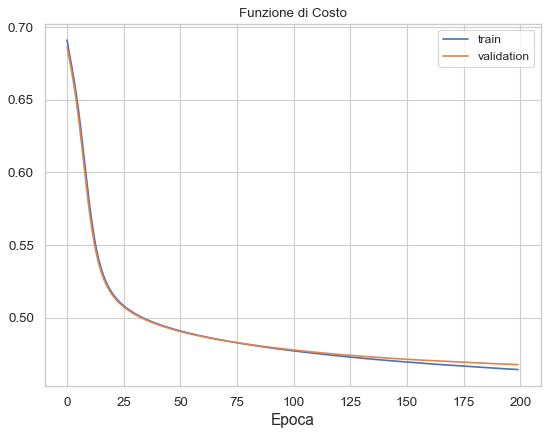

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Funzione di Costo')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoca')
plt.legend()
plt.show()

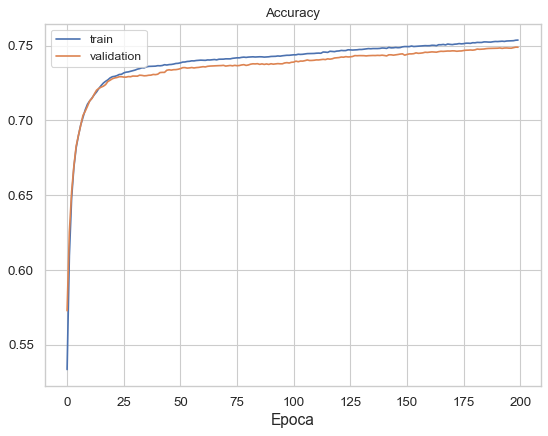

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoca')
plt.legend()
plt.show()

Anche tramite questi grafici possiamo dedurre che il modello non va in overfitting.
<br>
Naturalmente, la scelta degli iperparametri è stata effettuata senza un criterio preciso. Andremo quindi adesso ad effettuare uno studio più approfondito.

## 5.3 Tuning della ANN <a name="5.3"></a>

In [ ]:
from keras_tuner import RandomSearch

Keras mette a disposizione il framework keras-tuner per il tuning degli iperparametri delle ANN. Come prima cosa andremo a creare una funzione che riceve in ingresso gli iperparamtri; nel corpo verrà definita la struttura della rete, in corrispondenza dei punti di scelta verrà usato l'oggetto hp.
<br>
I punti critici corrispondono al numero di neuroni per livello (si è considerao un intervallo [6,256]), il numero di layer ([1,4]) e la funzione di attivazione per livello.

In [ ]:
def build_model(hp):        
    model=Sequential()
    model.add(Dense(hp.Int("input_units",min_value=6,max_value=256,step=32), activation=hp.Choice('activation_input',values=['relu','sigmoid']),input_dim=42))
  

    for i in range(hp.Int("n_layers",1,5)):
      model.add(Dense(hp.Int(f"conv_{i}_units",min_value=6,max_value=256,step=32),activation=hp.Choice(f"activation_{i}",values=['relu','sigmoid'])))

    model.add(Dense(1, activation=hp.Choice('activation_output',values=['relu','sigmoid','softmax'])))
  
    model.compile(loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])
    return model

Per la ricerca degli iperparametri migliori si è fatto uso di RandomSearch (lo spazio di ricerca è estremamente elevato, sarebbe impossibile quindi, provare tutte le possibili combinazioni). La funzione da ottimizzare è l'accuratezza del validation set. Il numero di prove è impostato a 50 e le esecuzioni per prova a 1.

In [ ]:
tuner=RandomSearch(build_model,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=1,
    directory='tuner1')

Il tuning viene ovviamente effettuato sul training set e sul validation, considerando 100 epoche e un batch size pari a 1024.

In [ ]:
tuner.search( 
    x=scaled_X_TRAIN,
    y=Y_TRAIN,
    epochs=100,
    batch_size=1024,
    validation_data=(scaled_X_VAL,Y_VAL))

Trial 50 Complete [00h 01m 36s]
val_accuracy: 0.7384389042854309

Best val_accuracy So Far: 0.7624402046203613
Total elapsed time: 01h 33m 56s
INFO:tensorflow:Oracle triggered exit


Una volta terminato il tuning si procede ad estrarre gli iperparametri della soluzione migliore.

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'activation_0': 'relu',
 'activation_1': 'relu',
 'activation_2': 'relu',
 'activation_3': 'relu',
 'activation_input': 'relu',
 'activation_output': 'relu',
 'conv_0_units': 230,
 'conv_1_units': 6,
 'conv_2_units': 6,
 'conv_3_units': 6,
 'input_units': 230,
 'n_layers': 4}

Tramite results_summary() siamo in grado di visualizzare il resoconto completo del tuner.

In [ ]:
tuner.results_summary()

Results summary
Results in tuner1/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_units: 230
activation_input: relu
n_layers: 4
conv_0_units: 230
activation_0: relu
activation_output: relu
conv_1_units: 6
activation_1: relu
conv_2_units: 6
activation_2: relu
conv_3_units: 6
activation_3: relu
Score: 0.7624402046203613
Trial summary
Hyperparameters:
input_units: 198
activation_input: relu
n_layers: 1
conv_0_units: 38
activation_0: relu
activation_output: sigmoid
conv_1_units: 6
activation_1: relu
conv_2_units: 134
activation_2: relu
conv_3_units: 70
activation_3: relu
conv_4_units: 230
activation_4: sigmoid
Score: 0.7533630728721619
Trial summary
Hyperparameters:
input_units: 166
activation_input: relu
n_layers: 2
conv_0_units: 38
activation_0: relu
activation_output: sigmoid
conv_1_units: 230
activation_1: relu
conv_2_units: 38
activation_2: relu
conv_3_units: 6
activation_3: relu
conv_4_units: 38
activation_4: sigmoid
Score: 0.7509506344795227
Trial summar

E' quindi possibile prendere gli iperparametri scelti e creare una rete con essi.

In [ ]:
model = Sequential()
model.add(Dense(230, activation='relu',input_dim=42))

model.add(Dense(230, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
history=model.fit(scaled_X_TRAIN, Y_TRAIN,validation_data=(scaled_X_VAL,Y_VAL) ,epochs=120, batch_size=1024, verbose=1)

Epoch 1/120
72/72 [==============================] - 6s 78ms/step - loss: 0.6936 - accuracy: 0.5095 - val_loss: 0.6922 - val_accuracy: 0.5144
Epoch 2/120
72/72 [==============================] - 1s 13ms/step - loss: 0.6907 - accuracy: 0.5208 - val_loss: 0.6892 - val_accuracy: 0.5259
Epoch 3/120
72/72 [==============================] - 1s 13ms/step - loss: 0.6873 - accuracy: 0.5364 - val_loss: 0.6853 - val_accuracy: 0.5499
Epoch 4/120
72/72 [==============================] - 1s 13ms/step - loss: 0.6829 - accuracy: 0.5585 - val_loss: 0.6804 - val_accuracy: 0.5688
Epoch 5/120
72/72 [==============================] - 1s 13ms/step - loss: 0.6775 - accuracy: 0.5777 - val_loss: 0.6742 - val_accuracy: 0.5871
Epoch 6/120
72/72 [==============================] - 1s 13ms/step - loss: 0.6706 - accuracy: 0.5984 - val_loss: 0.6665 - val_accuracy: 0.6073
Epoch 7/120
72/72 [==============================] - 1s 13ms/step - loss: 0.6620 - accuracy: 0.6180 - val_loss: 0.6569 - val_accuracy: 0.6278
Epoch 

Valutiamo perciò i risultati.

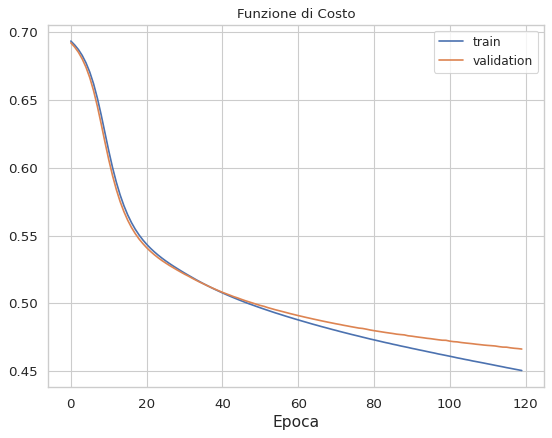

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Funzione di Costo')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoca')
plt.legend()
plt.show()

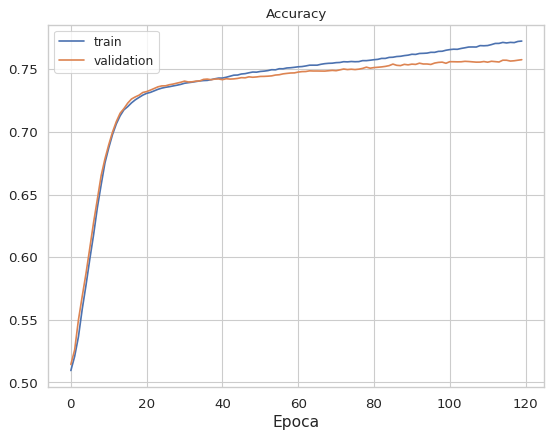

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoca')
plt.legend()
plt.show()

E' evidente un leggero miglioramento, si passa da circa 0.74 a quasi 0.76, inoltre, la rete riesce a completare la fase di training molto più velocemente, sono bastate infatti soltanto 120 epoche. Tuttavia, per periodi più lunghi si potrebbe incorrere in overfitting.

Valutiamo infine il risultato della rete sul test set.

In [ ]:
_,accuracy=model.evaluate(scaled_X_TEST,Y_TEST)

765/765 [==============================] - 1s 1ms/step - loss: 0.4688 - accuracy: 0.7548


Anche in questo caso le prestazioni sono migliorate. L'assenza di overfitting è anche qui evidente, le prestazioni sul validation set si mantengono, il modello è in grado di generalizzare bene sui dati.

# 6. Conclusioni <a name="6."></a>
Il capitolo sulle reti neurali conclude il presente progetto. Lo scopo del presente lavoro consisteva principalmente nell'utilizzo delle librerie Python per l'implementazione delle tecniche di Data Mining. Al tal fine è stato scelto un dataset su Kaggle, relativo a degli snapshot dei round di alcune partite di CS:GO. Il task di riferimento era di classificazione binaria: sulla base degli altri attributi delle tuple bisognava determinare il valore del round_winner, i.e. quale tra le due squadre avesse vinto.


In [ ]:
Image(url="https://www.researchgate.net/profile/Karel-Janecka/publication/295858646/figure/fig3/AS:667788658089996@1536224631611/The-current-process-model-for-data-mining-provides-an-overview-of-the-life-cycle-of-a.ppm")

Il primo passo è stato la visualizzazione dei dati, nella quale si sono visualizzate le distribuzioni, si è indagato su alcune caratteristiche del dataset, si è provveduto ad arricchirlo (e.g. inserendo il costo totale dell'equipaggiamento delle squadre) ecc... In sintesi, si è fatto tutto il necessario per comprendere appieno la forma e la natura dei dati, raccogliendo informazioni utili per le fasi successive del progetto. <br>
Successivamente, si è provveduto alla fase di preprocessing, ove i dati sono stati ripuliti di eventuali null values, outliers e rumore, sono stati codificati gli attributi categorici, eliminate le features eccessivamente correlate e quelle non importanti. In questa fase, si è cercato di migliorare quanto più possibile la qualità dei dati a nostra disposizione, al fine di migliorare le prestazioni dei classificatori.
I dati pre-processati sono stati perciò utilizzati con diversi classificatori, in particolare:
- Random forest
- K-neighbors
- SGD 
- Naive Bayes
- Decision Tree
- XGBOOST (ensemble)

Per ognuno di questi si è partiti da una versione base, senza particolare attenzione verso gli iperparametri; successivamente, nella fase di tuning, si sono analizzati tali parametri in dettaglio, sia per quanto riguarda il lato tecnico-descrittivo, sia per quanto concerne quello pratico: sono state graficate le prestazioni dei classificatori in base alla variazione dei parametri al fine di identificare, nei grafici, dei ginocchi, da usare poi nel grid-search per definire un range di valori dove focalizzare la ricerca (l'utilizzo del grid-search su uno spazio di ricerca troppo ampio avrebbe richiesto troppo tempo per le nostre risorse computazionali). In alcuni casi sono state osservati interessanti miglioramenti (e.g. K-neighbors), in altri casi i risultati non sono stati così netti, in alcuni casi si è notato persino un peggioramento (e.g. SGD). <br>
Dopo aver costruito e ottimizzato i classificatori, si è provveduto all'analisi delle performance (valutate sul test set). Le metriche usate sono state accuracy, recall, precision, f1-score; sono state graficate anche le ROC curve per una più completa dimostrazione del comportamento dei vari classificatori. 

$$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$ <br>
$$ Precision = \frac{TP}{TP+FP}$$ <br>
$$ Recall = \frac{TP}{TP+FN}$$ <br>
$$ F1-measure= \frac{2}{\frac{1}{P}+\frac{1}{R}}$$


Nell'ultimo capitolo è stato usato invece il framework Keras per la realizzazione di una rete neurale (utilizzata sempre nel contesto del task di classificazione binaria presentato prima). Come prima cosa, si è creata una prima versione della rete, cercando di settare la topologia della rete nel modo migliore, senza tuttavia un criterio particolare a cui affidarsi. Successivamente, tramite Keras-tuner, si è provveduto ad eseguire il tuning della rete, ricercando tra vari livelli, numero di neuroni per livello, funzioni di attivazione ec... Si è quindi provveduto a testare la versione ottimizzata, che ha presentato dei leggeri miglioramenti. <br> <br>

Le sfide affrontate nella realizzazione del presente progetto sono state molte, tutte, però, estremamente utili per una comprensione più completa della disciplina: dalla scelta del dataset (compresi primi tentativi conclusisi in un fallimento a causa dei dati scadenti), l'incontro con framework da dover padroneggiare, la scelta dei classificatori e la loro ottimizzazione, lo studio per riuscire a ottenre le performance migliori ecc... <br>